In [1]:
%matplotlib inline
from pylab import *
import numpy as np
from craco.search_pipeline import location2pix, get_grid_lut_from_plan, grid_candidates,wait_for_starts,waitall,print_candidates
from craco.search_pipeline import NBINARY_POINT_FDMTIN 
import craco
import craco.search_pipeline
from craco.pyxrtutil import *
import craft.craco_plan

from craft import uvfits

from craft.craco_plan import PipelinePlan
from craft.craco import printstats
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")
import time


INFO:root:test


In [2]:
fits='/data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits'
xclbin='/data/craco/ban115/builds/binary_container_1_10688715.xclbin'
#xclbin='/data/craco/ban115/builds/binary_container_01482863.xclbin'
alloc_device_only=True

In [3]:
values = craco.search_pipeline.get_parser().parse_args([])
print(values)

Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=7, input_scale=1.0, max_ndm=1024, nblocks=1, nbox=8, ncin=32, ndm=2, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=True, run_image=True, show=False, show_candidate_grid=None, threshold=10.0, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


In [4]:
device = pyxrt.device(1)
xbin = pyxrt.xclbin(xclbin)
uuid = device.load_xclbin(xbin)


In [5]:
f = uvfits.open(fits)
plan = PipelinePlan(f, "--ndm 512 --ndout 186")

INFO:root:Opening file /data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits
INFO:root:making Plan values=Namespace(boxcar_weight='sum', cell=None, fdmt_scale=1.0, fft_scale=10.0, max_ndm=1024, nbox=8, ncin=32, ndm=512, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', pickle_fname='pipeline.pickle', save=False, show=False, show_fdmt=False, show_image=False, threshold=3, uv='uv_data', verbose=False)
INFO:root:Nbl=190 Fch1=735499993.944000 foff=1000000.047500 nchan=256 lambdamin=0.302877 uvmax=(2914.412072271962, 3548.709136210335) max baseline=(0.882709355209954, 1.0748235581559127) resolution=[70.77407077 58.12389754]arcsec uvcell=[33.70193846 27.67804645] arcsec uvcell= (23.90728653035594, 29.110504632975406) lambda FoV=[2.39658229 1.96821664] deg oversampled=(2.1, 2.1)


parsing values --ndm 512 --ndout 186


INFO:root:Got Ncells=3838 uvcells
INFO:root:FDMT plan has ntotal=5272 of 659 runs with packing efficiency 0.727997. Grid read requires efficiency of > 0.643555 of NUV=8192. History size square=753094656 minimal=163316296 =2 256MB HBM banks
INFO:root:FDMT zero cell is (658, 2)=5266
INFO:root:Saving uvgrid.split shape=(5245, 14) type=float64 to uv_data.uvgrid.split.txt header=ant1, ant2, u(pix), v(pix), chan1, chan2, irun, icell, total_overlap, max_idm, max_offset, offset_cff, idm_cff, fch1
INFO:root:Got 3388 unique UV coords. Upper=True
INFO:root:Need to write 212 groups of 16 register to pad function
INFO:root:Got 3367 unique UV coords. Upper=False
INFO:root:Need to write 211 groups of 16 register to pad function
INFO:root:Got 5362 upper grid instructions
INFO:root:Saving gridlut.upper shape=(5362, 5) type=int32 to uv_data.gridlut.upper.txt header=target_slot, uvidx, shift_flag, upix, vpix
INFO:root:Got 5324 lower grid instructions
INFO:root:Saving gridlut.lower shape=(5324, 5) type=in

In [6]:
print(plan.ndout)

186


In [7]:
p = craco.search_pipeline.Pipeline(device, xbin, plan, alloc_device_only)

INFO:craco.search_pipeline:2636 2681 2662
INFO:craco.search_pipeline:(180214,)


Kernel krnl_ddgrid_reader_4cu:krnl_ddgrid_reader_4cu_1 has groups
GID=0=32
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=15
Kernel krnl_grid_4cu:krnl_grid_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=6
Kernel krnl_grid_4cu:krnl_grid_4cu_2 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=7
Kernel krnl_grid_4cu:krnl_grid_4cu_3 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=20
Kernel krnl_grid_4cu:krnl_grid_4cu_4 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=21
Kernel fft2d:fft2d_1 has groups
Kernel fft2d:fft2d_2 has groups
Kernel fft2d:fft2d_3 has groups
Kernel fft2d:fft2d_4 has groups
Kernel krnl_boxc_4cu:krnl_boxc_4cu_1 has groups

INFO:craco.search_pipeline:lut.shape (180214,)
INFO:craco.search_pipeline:nuv 5272
INFO:craco.search_pipeline:Allocating grid LUTs
INFO:craco.search_pipeline:Allocating FDMT Input
INFO:craco.search_pipeline:5272
INFO:craco.search_pipeline:256
INFO:craco.search_pipeline:32
INFO:craco.search_pipeline:8
INFO:craco.search_pipeline:659
INFO:craco.search_pipeline:186
INFO:craco.search_pipeline:FDMT input buffer size 164.75 MB
INFO:craco.search_pipeline:Allocating FDMT history



GID=0=-1
GID=1=-1
GID=2=-1
GID=3=54
GID=4=54
GID=5=4
Kernel fdmt_tunable_c32:fdmt_tunable_c32_1 has groups
GID=0=52
GID=1=32
GID=2=53
GID=3=53
GID=4=14
Allocated 360428 bytes flags=flags.normal groupid=6 address=0x60000000
Allocated 360428 bytes flags=flags.normal groupid=7 address=0x70000000
Allocated 360428 bytes flags=flags.normal groupid=20 address=0x140000000
Allocated 360428 bytes flags=flags.normal groupid=21 address=0x150000000
Allocated 172752896 bytes flags=flags.normal groupid=52 address=0x90000000
Allocated 268435456 bytes flags=flags.normal groupid=53 address=0xa0000000


INFO:craco.search_pipeline:Allocating mainbuf
INFO:craco.search_pipeline:FDMT output buffer size 10.286819458007812 GB
INFO:root:Mainbuf shape is (659, 186, 11, 256, 8, 2) breaking into 8 buffers of [83, 186, 11, 256, 8, 2]


Allocated 653728 bytes flags=flags.normal groupid=14 address=0xe0000000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x4000000000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x4052eb4000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x40a5d68000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x40f8c1c000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x414bad0000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x419e984000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x41f1838000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x42446ec000


INFO:craco.search_pipeline:Allocating ddreader_lut
INFO:craco.search_pipeline:Allocating boxcar_history


Allocated 8192 bytes flags=flags.normal groupid=15 address=0xf0000000
Allocated 1073741824 bytes flags=flags.normal groupid=54 address=0x0


INFO:craco.search_pipeline:Allocating candidates


Boxcar history (1024, 8, 256, 256) 1073741824 2
Allocated 1048576 bytes flags=flags.normal groupid=4 address=0x40000000


In [8]:
p.fdmtcu.krnl.read_register(0x00)

4

In [9]:
# check clearing buffers a lot doesn't lockup
print(values)
for i in range(100):
    print('Clearing', i)
#    p.clear_buffers(values)
    p.run(i % 11, values).wait()
    #time.sleep(0.1)
    

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=7, input_scale=1.0, max_ndm=1024, nblocks=1, nbox=8, ncin=32, ndm=2, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=True, run_image=True, show=False, show_candidate_grid=None, threshold=10.0, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')
Clearing 0


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 1



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 2


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 3


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 4


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 5


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 6


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 7



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 8


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 9


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 10



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 11



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 12



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 13



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 14


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 15


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 16


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 17


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 18


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 19


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 20



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 21


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 22


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 23


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 24


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 25


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 26


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 27


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 28


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 29


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 30


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 31



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 32


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 33


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 34


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 35


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 36



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 37



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 38


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 39


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 40


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 41



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 42


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 43



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 44


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 45


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 46


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 47


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 48


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 49


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 50



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 51


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 52


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 53


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 54


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 55


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 56


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 57


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 58



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 59


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 60


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 61


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 62


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 63



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 64


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 65


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 66


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 67



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 68


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 69


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 70


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 71



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt


Clearing 72


INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt


Clearing 73


INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 74



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 75


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 76


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 77



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 78


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 79



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 80


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 81


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 82


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 83



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 84


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 85



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 86


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 87


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 88


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 89


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 90


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=3 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 91


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=4 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 92


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=5 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 93


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=6 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 94


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=7 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 95


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=8 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 96



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=9 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 97


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=10 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete

Clearing 98



INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


Clearing 99


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


In [10]:
p.clear_buffers(values)
# dmamp = 32 gives SNR=14.2
dmamp = 32
t0 = 0

# put in a value for a single time and DM
for b in p.all_mainbufs:
    print(b.shape)
    #b.nparr[:] = dmamp #np.random.randn(*b.nparr.shape)
    #b.nparr[:] = dmamp
    b.nparr[:,:,:,t0,:,0] = dmamp
    b.copy_to_device() 

INFO:root:Clearing mainbuf data NBLK=11
INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=65

[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]


In [11]:
mainbuf = p.copy_mainbuf()

(664, 186, 11, 256, 8, 2)
347787264


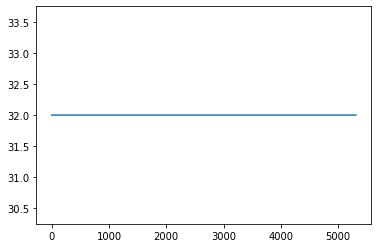

In [12]:
print(mainbuf.shape)
plot(mainbuf[:,0,0,t0,:,0].flat)
assert np.all(mainbuf[:,0,0,t0,:,0] == dmamp)
assert np.all(mainbuf[:,1:,1:,:t0,:,1] == 0)
assert np.all(mainbuf[:,1:,1:,:t0+1,:,1] == 0)
print(mainbuf.sum())

In [13]:
values.run_fdmt = False
values.run_image = True
values.threshold = 3
print(values)
p.run(0, values).wait()

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=192 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running


Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=7, input_scale=1.0, max_ndm=1024, nblocks=1, nbox=8, ncin=32, ndm=2, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=False, run_image=True, show=False, show_candidate_grid=None, threshold=3, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


INFO:craco.search_pipeline:Waiting for 10 starts


In [14]:
cands = p.get_candidates()
print(f'Got {len(cands)} candidates')
if len(cands) == 0: # are you sure?
    p.candidates.copy_from_device()
    print(p.candidates.nparr)
    
print_candidates(cands, 256, 0)

Got 8192 candidates
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		0	0	0
16.4	127	128	0		1	0	0
11.5	129	129	1		1	0	0
3.0	162	129	0		1	0	0
34.9	127	129	0		0	0	0
5.6	138	130	0		0	0	0
5.2	122	130	0		0	0	0
8.0	135	131	0		1	0	0
3.3	105	131	0		0	0	0
5.0	120	131	0		1	0	0
5.2	134	132	1		1	0	0
7.9	124	132	0		0	0	0
8.0	133	133	0		0	0	0
3.5	102	133	0		1	0	0
4.5	123	133	0		0	0	0
6.8	134	134	0		0	0	0
5.2	117	134	0		1	0	0
8.0	131	135	0		1	0	0
3.6	147	135	0		0	0	0
5.6	116	135	0		1	0	0
6.5	136	136	1		1	0	0
3.9	110	136	0		0	0	0
5.2	126	136	1		1	0	0
5.0	131	137	0		0	0	0
3.4	179	137	0		0	0	0
3.3	111	137	1		1	0	0
4.5	118	137	0		1	0	0
5.6	130	138	0		0	0	0
3.4	178	138	1		1	0	0
3.9	108	138	1		1	0	0
4.8	117	138	0		1	0	0
4.5	131	139	0		0	0	0
3.5	181	139	0		1	0	0
3.8	107	139	0		1	0	0
4.6	121	139	0		0	0	0
4.4	122	140	1		1	0	0
3.4	101	141	0		0	0	0
6.1	121	141	1		1	0	0
4.3	100	142	0		0	0	0
6.6	120	142	1		1	0	0
3.7	99	143	1		1	0	0
3.9	119	143	0		0	0	0
3.8	96	144	0		0	0	0
3.1	71	145	0		0	0	0
4.7	95	145	1		

3.6	147	135	0		0	10	0
5.6	116	135	0		1	10	0
6.5	136	136	1		1	10	0
3.9	110	136	0		0	10	0
5.2	126	136	1		1	10	0
5.0	131	137	0		0	10	0
3.4	179	137	0		0	10	0
3.3	111	137	1		1	10	0
4.5	118	137	0		1	10	0
5.6	130	138	0		0	10	0
3.4	178	138	1		1	10	0
3.9	108	138	1		1	10	0
4.8	117	138	0		1	10	0
4.5	131	139	0		0	10	0
3.5	181	139	0		1	10	0
3.8	107	139	0		1	10	0
4.6	121	139	0		0	10	0
4.4	122	140	1		1	10	0
3.4	101	141	0		0	10	0
6.1	121	141	1		1	10	0
4.3	100	142	0		0	10	0
6.6	120	142	1		1	10	0
3.7	99	143	1		1	10	0
3.9	119	143	0		0	10	0
3.8	96	144	0		0	10	0
3.1	71	145	0		0	10	0
4.7	95	145	1		1	10	0
3.5	103	145	1		1	10	0
3.7	94	146	1		1	10	0
4.0	120	146	0		0	10	0
3.8	135	147	0		0	10	0
3.2	93	147	0		1	10	0
3.2	119	147	0		0	10	0
3.6	117	148	0		1	10	0
3.2	96	149	0		1	10	0
3.4	95	150	0		1	10	0
3.3	94	151	0		1	10	0
3.3	125	151	0		0	10	0
3.4	97	155	0		0	10	0
3.4	115	155	0		0	10	0
3.7	96	156	0		0	10	0
4.5	114	156	0		0	10	0
3.8	95	157	0		0	10	0
3.6	113	157	0		0	10	0
3.4	94	158	0		0	10	0
3.4	101	159	0		0	10	0
3

5.6	130	138	0		0	18	0
3.4	178	138	1		1	18	0
3.9	108	138	1		1	18	0
4.8	117	138	0		1	18	0
4.5	131	139	0		0	18	0
3.5	181	139	0		1	18	0
3.8	107	139	0		1	18	0
4.6	121	139	0		0	18	0
4.4	122	140	1		1	18	0
3.4	101	141	0		0	18	0
6.1	121	141	1		1	18	0
4.3	100	142	0		0	18	0
6.6	120	142	1		1	18	0
3.7	99	143	1		1	18	0
3.9	119	143	0		0	18	0
3.8	96	144	0		0	18	0
3.1	71	145	0		0	18	0
4.7	95	145	1		1	18	0
3.5	103	145	1		1	18	0
3.7	94	146	1		1	18	0
4.0	120	146	0		0	18	0
3.8	135	147	0		0	18	0
3.2	93	147	0		1	18	0
3.2	119	147	0		0	18	0
3.6	117	148	0		1	18	0
3.2	96	149	0		1	18	0
3.4	95	150	0		1	18	0
3.3	94	151	0		1	18	0
3.3	125	151	0		0	18	0
3.4	97	155	0		0	18	0
3.4	115	155	0		0	18	0
3.7	96	156	0		0	18	0
4.5	114	156	0		0	18	0
3.8	95	157	0		0	18	0
3.6	113	157	0		0	18	0
3.4	94	158	0		0	18	0
3.4	101	159	0		0	18	0
3.7	100	160	0		0	18	0
3.7	112	160	0		0	18	0
4.5	111	161	0		0	18	0
3.3	98	162	0		0	18	0
3.3	108	165	0		1	18	0
3.4	138	178	1		1	18	0
3.4	137	179	0		0	18	0
3.1	138	180	1		1	18	0
3.4	139	181	0		1	18	0
3.

3.6	117	148	0		1	25	0
3.2	96	149	0		1	25	0
3.4	95	150	0		1	25	0
3.3	94	151	0		1	25	0
3.3	125	151	0		0	25	0
3.4	97	155	0		0	25	0
3.4	115	155	0		0	25	0
3.7	96	156	0		0	25	0
4.5	114	156	0		0	25	0
3.8	95	157	0		0	25	0
3.6	113	157	0		0	25	0
3.4	94	158	0		0	25	0
3.4	101	159	0		0	25	0
3.7	100	160	0		0	25	0
3.7	112	160	0		0	25	0
4.5	111	161	0		0	25	0
3.3	98	162	0		0	25	0
3.3	108	165	0		1	25	0
3.4	138	178	1		1	25	0
3.4	137	179	0		0	25	0
3.1	138	180	1		1	25	0
3.4	139	181	0		1	25	0
3.0	111	185	0		0	25	0
3.0	145	71	0		0	25	0
3.5	117	74	0		1	25	0
3.4	119	77	0		0	25	0
3.2	110	89	0		1	25	0
3.2	147	93	0		1	25	0
3.7	146	94	1		1	25	0
4.6	145	95	1		1	25	0
3.7	144	96	0		0	25	0
3.4	155	97	0		0	25	0
3.1	144	98	1		1	25	0
3.4	162	98	0		0	25	0
4.0	143	99	1		1	25	0
3.8	161	99	0		0	25	0
4.5	142	100	0		0	25	0
3.7	160	100	0		0	25	0
3.4	141	101	0		0	25	0
3.4	159	101	0		0	25	0
3.3	133	102	0		1	25	0
3.4	145	103	1		1	25	0
3.3	131	105	0		0	25	0
3.5	139	107	0		1	25	0
3.9	138	108	1		1	25	0
3.2	165	108	0		1	25	0
3.0	125	1

3.4	139	181	0		1	32	0
3.0	111	185	0		0	32	0
3.0	145	71	0		0	32	0
3.5	117	74	0		1	32	0
3.4	119	77	0		0	32	0
3.2	110	89	0		1	32	0
3.2	147	93	0		1	32	0
3.7	146	94	1		1	32	0
4.6	145	95	1		1	32	0
3.7	144	96	0		0	32	0
3.4	155	97	0		0	32	0
3.1	144	98	1		1	32	0
3.4	162	98	0		0	32	0
4.0	143	99	1		1	32	0
3.8	161	99	0		0	32	0
4.5	142	100	0		0	32	0
3.7	160	100	0		0	32	0
3.4	141	101	0		0	32	0
3.4	159	101	0		0	32	0
3.3	133	102	0		1	32	0
3.4	145	103	1		1	32	0
3.3	131	105	0		0	32	0
3.5	139	107	0		1	32	0
3.9	138	108	1		1	32	0
3.2	165	108	0		1	32	0
3.0	125	108	1		1	32	0
3.2	137	109	0		0	32	0
3.8	121	109	0		0	32	0
4.0	136	110	0		0	32	0
3.2	89	110	0		1	32	0
3.4	137	111	1		1	32	0
4.6	161	111	0		0	32	0
3.1	185	111	0		0	32	0
3.8	136	112	1		1	32	0
3.8	160	112	0		0	32	0
3.9	137	113	0		0	32	0
3.3	157	113	0		0	32	0
4.4	136	114	0		0	32	0
4.3	156	114	0		0	32	0
3.6	140	115	0		1	32	0
3.4	155	115	0		0	32	0
5.6	135	116	0		1	32	0
5.3	134	117	0		1	32	0
3.7	148	117	0		1	32	0
3.5	74	117	0		1	32	0
4.5	125	117	0		0	32	0
4.8

6.7	142	120	1		1	42	0
3.9	146	120	0		0	42	0
6.0	120	120	0		0	42	0
6.2	141	121	1		1	42	0
3.5	109	121	0		0	42	0
8.0	124	121	0		1	42	0
5.1	130	122	0		0	42	0
6.8	122	122	0		0	42	0
4.5	133	123	0		0	42	0
3.2	145	123	0		1	42	0
8.0	123	123	0		0	42	0
7.9	132	124	0		0	42	0
8.2	121	124	0		1	42	0
4.7	131	125	0		0	42	0
3.3	151	125	0		0	42	0
4.9	119	125	0		0	42	0
5.2	134	126	0		0	42	0
3.1	148	126	1		1	42	0
5.6	118	126	0		0	42	0
34.9	129	127	0		0	42	0
7.2	127	127	0		0	42	0
5.6	127	128	7		8	42	0
3.1	129	129	7		8	42	0
5.6	128	127	7		8	42	0
83.5	128	128	0		0	43	0
16.4	127	128	0		1	43	0
11.5	129	129	1		1	43	0
3.0	162	129	0		1	43	0
34.9	127	129	0		0	43	0
5.6	138	130	0		0	43	0
5.2	122	130	0		0	43	0
8.0	135	131	0		1	43	0
3.3	105	131	0		0	43	0
5.0	120	131	0		1	43	0
5.2	134	132	1		1	43	0
7.9	124	132	0		0	43	0
8.0	133	133	0		0	43	0
3.5	102	133	0		1	43	0
4.5	123	133	0		0	43	0
6.8	134	134	0		0	43	0
5.2	117	134	0		1	43	0
8.0	131	135	0		1	43	0
3.6	147	135	0		0	43	0
5.6	116	135	0		1	43	0
6.5	136	136	1		1	43	0
3.9	1

3.8	107	139	0		1	53	0
4.6	121	139	0		0	53	0
4.4	122	140	1		1	53	0
3.4	101	141	0		0	53	0
6.1	121	141	1		1	53	0
4.3	100	142	0		0	53	0
6.6	120	142	1		1	53	0
3.7	99	143	1		1	53	0
3.9	119	143	0		0	53	0
3.8	96	144	0		0	53	0
3.1	71	145	0		0	53	0
4.7	95	145	1		1	53	0
3.5	103	145	1		1	53	0
3.7	94	146	1		1	53	0
4.0	120	146	0		0	53	0
3.8	135	147	0		0	53	0
3.2	93	147	0		1	53	0
3.2	119	147	0		0	53	0
3.6	117	148	0		1	53	0
3.2	96	149	0		1	53	0
3.4	95	150	0		1	53	0
3.3	94	151	0		1	53	0
3.3	125	151	0		0	53	0
3.4	97	155	0		0	53	0
3.4	115	155	0		0	53	0
3.7	96	156	0		0	53	0
4.5	114	156	0		0	53	0
3.8	95	157	0		0	53	0
3.6	113	157	0		0	53	0
3.4	94	158	0		0	53	0
3.4	101	159	0		0	53	0
3.7	100	160	0		0	53	0
3.7	112	160	0		0	53	0
4.5	111	161	0		0	53	0
3.3	98	162	0		0	53	0
3.3	108	165	0		1	53	0
3.4	138	178	1		1	53	0
3.4	137	179	0		0	53	0
3.1	138	180	1		1	53	0
3.4	139	181	0		1	53	0
3.0	111	185	0		0	53	0
3.0	145	71	0		0	53	0
3.5	117	74	0		1	53	0
3.4	119	77	0		0	53	0
3.2	110	89	0		1	53	0
3.2	147	93	0		1	53	0
3.7	146

In [15]:
print(cands)
cands = cands[cands['dm'] == 0] # DM 0 adn 1 are repeated, I think.

[(5342,     0, 0, 0,  0) (1052,   255, 0, 1,  0) ( 734,   257, 1, 1,  0)
 ... ( 356, 65270, 0, 0, 54) (2236, 65281, 0, 0, 54)
 ( 460, 65535, 0, 0, 54)]


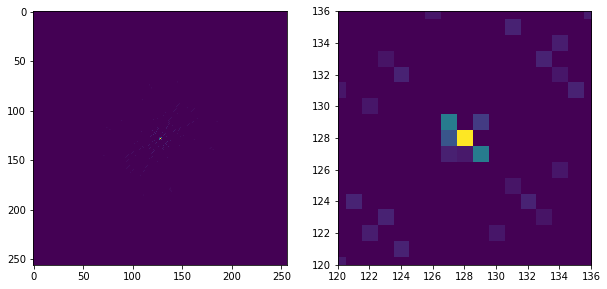

In [16]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

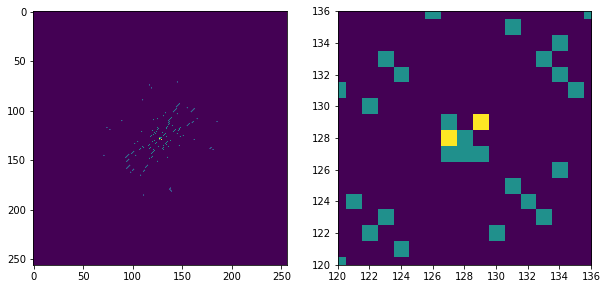

In [17]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

# Check DM0 for trange makes sense

In [18]:
all_cands = []
for t0 in range(16):
    p.clear_buffers(values)
    # dmamp = 32 gives SNR=14.2
    dmamp = 32
    print('t0', t0)

    # put in a value for a single time and DM
    for b in p.all_mainbufs:
        b.nparr[:] = 0
        b.nparr[:,:,:,t0,:,0] = dmamp
        b.copy_to_device()

    values.run_fdmt = False
    values.run_image = True
    values.threshold = 10
    p.run(0, values).wait()
    cands = p.get_candidates().copy()
    all_cands.append(cands)
    c0 = cands[0]
    print(c0)
    #assert c0['upix'] == 128
    #assert c0['vpix'] == 128
    #assert c0['boxc_width'] == 0
    #assert c0['time'] == t0
    #assert c0['dm'] == 0
    print_candidates(cands, 256, 0)

    

INFO:root:Clearing mainbuf data NBLK=11
INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=192 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=192 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=192 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candida

t0 0


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 0, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		0	0	0
16.4	127	128	0		1	0	0
11.5	129	129	1		1	0	0
34.9	127	129	0		0	0	0
34.9	129	127	0		0	0	0
83.5	128	128	0		0	1	0
16.4	127	128	0		1	1	0
11.5	129	129	1		1	1	0
34.9	127	129	0		0	1	0
34.9	129	127	0		0	1	0
83.5	128	128	0		0	2	0
16.4	127	128	0		1	2	0
11.5	129	129	1		1	2	0
34.9	127	129	0		0	2	0
34.9	129	127	0		0	2	0
83.5	128	128	0		0	3	0
16.4	127	128	0		1	3	0
11.5	129	129	1		1	3	0
34.9	127	129	0		0	3	0
34.9	129	127	0		0	3	0
83.5	128	128	0		0	4	0
16.4	127	128	0		1	4	0
11.5	129	129	1		1	4	0
34.9	127	129	0		0	4	0
34.9	129	127	0		0	4	0
83.5	128	128	0		0	5	0
16.4	127	128	0		1	5	0
11.5	129	129	1		1	5	0
34.9	127	129	0		0	5	0
34.9	129	127	0		0	5	0
83.5	128	128	0		0	6	0
16.4	127	128	0		1	6	0
11.5	129	129	1		1	6	0
34.9	127	129	0		0	6	0
34.9	129	127	0		0	6	0
83.5	128	128	0		0	7	0
16.4	127	128	0		1	7	0
11.5	129	129	1		1	7	0
34.9	127	129	0		0	7	0
34.9	129	127	0		0	7	0
83.5	128	128	0		0	8	0
16.4	127	128	0		1	8	0
11.5	129	129	1		

11.5	129	129	1		1	241	0
34.9	127	129	0		0	241	0
34.9	129	127	0		0	241	0
83.5	128	128	0		0	242	0
16.4	127	128	0		1	242	0
11.5	129	129	1		1	242	0
34.9	127	129	0		0	242	0
34.9	129	127	0		0	242	0
83.5	128	128	0		0	243	0
16.4	127	128	0		1	243	0
11.5	129	129	1		1	243	0
34.9	127	129	0		0	243	0
34.9	129	127	0		0	243	0
83.5	128	128	0		0	244	0
16.4	127	128	0		1	244	0
11.5	129	129	1		1	244	0
34.9	127	129	0		0	244	0
34.9	129	127	0		0	244	0
83.5	128	128	0		0	245	0
16.4	127	128	0		1	245	0
11.5	129	129	1		1	245	0
34.9	127	129	0		0	245	0
34.9	129	127	0		0	245	0
83.5	128	128	0		0	246	0
16.4	127	128	0		1	246	0
11.5	129	129	1		1	246	0
34.9	127	129	0		0	246	0
34.9	129	127	0		0	246	0
83.5	128	128	0		0	247	0
16.4	127	128	0		1	247	0
11.5	129	129	1		1	247	0
34.9	127	129	0		0	247	0
34.9	129	127	0		0	247	0
83.5	128	128	0		0	248	0
16.4	127	128	0		1	248	0
11.5	129	129	1		1	248	0
34.9	127	129	0		0	248	0
34.9	129	127	0		0	248	0
83.5	128	128	0		0	249	0
16.4	127	128	0		1	249	0
11.5	129	129	1		1	249	0
34.9	127	129	0		

INFO:root:Clearing mainbuf data NBLK=11


34.9	129	127	0		0	441	0
83.5	128	128	0		0	442	0
16.4	127	128	0		1	442	0
11.5	129	129	1		1	442	0
34.9	127	129	0		0	442	0
34.9	129	127	0		0	442	0
83.5	128	128	0		0	443	0
16.4	127	128	0		1	443	0
11.5	129	129	1		1	443	0
34.9	127	129	0		0	443	0
34.9	129	127	0		0	443	0
83.5	128	128	0		0	444	0
16.4	127	128	0		1	444	0
11.5	129	129	1		1	444	0
34.9	127	129	0		0	444	0
34.9	129	127	0		0	444	0
83.5	128	128	0		0	445	0
16.4	127	128	0		1	445	0
11.5	129	129	1		1	445	0
34.9	127	129	0		0	445	0
34.9	129	127	0		0	445	0
83.5	128	128	0		0	446	0
16.4	127	128	0		1	446	0
11.5	129	129	1		1	446	0
34.9	127	129	0		0	446	0
34.9	129	127	0		0	446	0
83.5	128	128	0		0	447	0
16.4	127	128	0		1	447	0
11.5	129	129	1		1	447	0
34.9	127	129	0		0	447	0
34.9	129	127	0		0	447	0
83.5	128	128	0		0	448	0
16.4	127	128	0		1	448	0
11.5	129	129	1		1	448	0
34.9	127	129	0		0	448	0
34.9	129	127	0		0	448	0
83.5	128	128	0		0	449	0
16.4	127	128	0		1	449	0
11.5	129	129	1		1	449	0
34.9	127	129	0		0	449	0
34.9	129	127	0		0	449	0
83.5	128	128	0		

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 1


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 1, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		1	0	0
16.4	128	129	0		0	0	0
34.9	127	129	0		1	0	0
34.9	129	127	0		1	0	0
11.5	127	127	1		1	0	0
28.7	128	128	7		8	0	0
12.0	127	129	7		8	0	0
12.0	129	127	7		8	0	0
83.5	128	128	0		1	1	0
16.4	128	129	0		0	1	0
34.9	127	129	0		1	1	0
34.9	129	127	0		1	1	0
11.5	127	127	1		1	1	0
28.7	128	128	7		8	1	0
12.0	127	129	7		8	1	0
12.0	129	127	7		8	1	0
83.5	128	128	0		1	2	0
16.4	128	129	0		0	2	0
34.9	127	129	0		1	2	0
34.9	129	127	0		1	2	0
11.5	127	127	1		1	2	0
28.7	128	128	7		8	2	0
12.0	127	129	7		8	2	0
12.0	129	127	7		8	2	0
83.5	128	128	0		1	3	0
16.4	128	129	0		0	3	0
34.9	127	129	0		1	3	0
34.9	129	127	0		1	3	0
11.5	127	127	1		1	3	0
28.7	128	128	7		8	3	0
12.0	127	129	7		8	3	0
12.0	129	127	7		8	3	0
83.5	128	128	0		1	4	0
16.4	128	129	0		0	4	0
34.9	127	129	0		1	4	0
34.9	129	127	0		1	4	0
11.5	127	127	1		1	4	0
28.7	128	128	7		8	4	0
12.0	127	129	7		8	4	0
12.0	129	127	7		8	4	0
83.5	128	128	0		1	5	0
16.4	128	129	0		0	5	0
34.9	127	129	0		

12.0	127	129	7		8	170	0
12.0	129	127	7		8	170	0
83.5	128	128	0		1	171	0
16.4	128	129	0		0	171	0
34.9	127	129	0		1	171	0
34.9	129	127	0		1	171	0
11.5	127	127	1		1	171	0
28.7	128	128	7		8	171	0
12.0	127	129	7		8	171	0
12.0	129	127	7		8	171	0
83.5	128	128	0		1	172	0
16.4	128	129	0		0	172	0
34.9	127	129	0		1	172	0
34.9	129	127	0		1	172	0
11.5	127	127	1		1	172	0
28.7	128	128	7		8	172	0
12.0	127	129	7		8	172	0
12.0	129	127	7		8	172	0
83.5	128	128	0		1	173	0
16.4	128	129	0		0	173	0
34.9	127	129	0		1	173	0
34.9	129	127	0		1	173	0
11.5	127	127	1		1	173	0
28.7	128	128	7		8	173	0
12.0	127	129	7		8	173	0
12.0	129	127	7		8	173	0
83.5	128	128	0		1	174	0
16.4	128	129	0		0	174	0
34.9	127	129	0		1	174	0
34.9	129	127	0		1	174	0
11.5	127	127	1		1	174	0
28.7	128	128	7		8	174	0
12.0	127	129	7		8	174	0
12.0	129	127	7		8	174	0
83.5	128	128	0		1	175	0
16.4	128	129	0		0	175	0
34.9	127	129	0		1	175	0
34.9	129	127	0		1	175	0
11.5	127	127	1		1	175	0
28.7	128	128	7		8	175	0
12.0	127	129	7		8	175	0
12.0	129	127	7		

INFO:root:Clearing mainbuf data NBLK=11



83.5	128	128	0		1	336	0
16.4	128	129	0		0	336	0
34.9	127	129	0		1	336	0
34.9	129	127	0		1	336	0
11.5	127	127	1		1	336	0
28.7	128	128	7		8	336	0
12.0	127	129	7		8	336	0
12.0	129	127	7		8	336	0
83.5	128	128	0		1	337	0
16.4	128	129	0		0	337	0
34.9	127	129	0		1	337	0
34.9	129	127	0		1	337	0
11.5	127	127	1		1	337	0
28.7	128	128	7		8	337	0
12.0	127	129	7		8	337	0
12.0	129	127	7		8	337	0
83.5	128	128	0		1	338	0
16.4	128	129	0		0	338	0
34.9	127	129	0		1	338	0
34.9	129	127	0		1	338	0
11.5	127	127	1		1	338	0
28.7	128	128	7		8	338	0
12.0	127	129	7		8	338	0
12.0	129	127	7		8	338	0
83.5	128	128	0		1	339	0
16.4	128	129	0		0	339	0
34.9	127	129	0		1	339	0
34.9	129	127	0		1	339	0
11.5	127	127	1		1	339	0
28.7	128	128	7		8	339	0
12.0	127	129	7		8	339	0
12.0	129	127	7		8	339	0
83.5	128	128	0		1	340	0
16.4	128	129	0		0	340	0
34.9	127	129	0		1	340	0
34.9	129	127	0		1	340	0
11.5	127	127	1		1	340	0
28.7	128	128	7		8	340	0
12.0	127	129	7		8	340	0
12.0	129	127	7		8	340	0
83.5	128	128	0		1	341	0
16.4	128	129	0	

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 2


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 2, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		2	0	0
16.4	127	128	0		3	0	0
11.5	129	129	1		3	0	0
34.9	127	129	0		2	0	0
34.9	129	127	0		2	0	0
31.3	128	128	6		8	0	0
13.1	127	129	6		8	0	0
13.1	129	127	6		8	0	0
83.5	128	128	0		2	1	0
16.4	127	128	0		3	1	0
11.5	129	129	1		3	1	0
34.9	127	129	0		2	1	0
34.9	129	127	0		2	1	0
31.3	128	128	6		8	1	0
13.1	127	129	6		8	1	0
13.1	129	127	6		8	1	0
83.5	128	128	0		2	2	0
16.4	127	128	0		3	2	0
11.5	129	129	1		3	2	0
34.9	127	129	0		2	2	0
34.9	129	127	0		2	2	0
31.3	128	128	6		8	2	0
13.1	127	129	6		8	2	0
13.1	129	127	6		8	2	0
83.5	128	128	0		2	3	0
16.4	127	128	0		3	3	0
11.5	129	129	1		3	3	0
34.9	127	129	0		2	3	0
34.9	129	127	0		2	3	0
31.3	128	128	6		8	3	0
13.1	127	129	6		8	3	0
13.1	129	127	6		8	3	0
83.5	128	128	0		2	4	0
16.4	127	128	0		3	4	0
11.5	129	129	1		3	4	0
34.9	127	129	0		2	4	0
34.9	129	127	0		2	4	0
31.3	128	128	6		8	4	0
13.1	127	129	6		8	4	0
13.1	129	127	6		8	4	0
83.5	128	128	0		2	5	0
16.4	127	128	0		3	5	0
11.5	129	129	1		

34.9	127	129	0		2	221	0
34.9	129	127	0		2	221	0
31.3	128	128	6		8	221	0
13.1	127	129	6		8	221	0
13.1	129	127	6		8	221	0
83.5	128	128	0		2	222	0
16.4	127	128	0		3	222	0
11.5	129	129	1		3	222	0
34.9	127	129	0		2	222	0
34.9	129	127	0		2	222	0
31.3	128	128	6		8	222	0
13.1	127	129	6		8	222	0
13.1	129	127	6		8	222	0
83.5	128	128	0		2	223	0
16.4	127	128	0		3	223	0
11.5	129	129	1		3	223	0
34.9	127	129	0		2	223	0
34.9	129	127	0		2	223	0
31.3	128	128	6		8	223	0
13.1	127	129	6		8	223	0
13.1	129	127	6		8	223	0
83.5	128	128	0		2	224	0
16.4	127	128	0		3	224	0
11.5	129	129	1		3	224	0
34.9	127	129	0		2	224	0
34.9	129	127	0		2	224	0
31.3	128	128	6		8	224	0
13.1	127	129	6		8	224	0
13.1	129	127	6		8	224	0
83.5	128	128	0		2	225	0
16.4	127	128	0		3	225	0
11.5	129	129	1		3	225	0
34.9	127	129	0		2	225	0
34.9	129	127	0		2	225	0
31.3	128	128	6		8	225	0
13.1	127	129	6		8	225	0
13.1	129	127	6		8	225	0
83.5	128	128	0		2	226	0
16.4	127	128	0		3	226	0
11.5	129	129	1		3	226	0
34.9	127	129	0		2	226	0
34.9	129	127	0		

INFO:root:Clearing mainbuf data NBLK=11


83.5	128	128	0		2	356	0
16.4	127	128	0		3	356	0
11.5	129	129	1		3	356	0
34.9	127	129	0		2	356	0
34.9	129	127	0		2	356	0
31.3	128	128	6		8	356	0
13.1	127	129	6		8	356	0
13.1	129	127	6		8	356	0
83.5	128	128	0		2	357	0
16.4	127	128	0		3	357	0
11.5	129	129	1		3	357	0
34.9	127	129	0		2	357	0
34.9	129	127	0		2	357	0
31.3	128	128	6		8	357	0
13.1	127	129	6		8	357	0
13.1	129	127	6		8	357	0
83.5	128	128	0		2	358	0
16.4	127	128	0		3	358	0
11.5	129	129	1		3	358	0
34.9	127	129	0		2	358	0
34.9	129	127	0		2	358	0
31.3	128	128	6		8	358	0
13.1	127	129	6		8	358	0
13.1	129	127	6		8	358	0
83.5	128	128	0		2	359	0
16.4	127	128	0		3	359	0
11.5	129	129	1		3	359	0
34.9	127	129	0		2	359	0
34.9	129	127	0		2	359	0
31.3	128	128	6		8	359	0
13.1	127	129	6		8	359	0
13.1	129	127	6		8	359	0
83.5	128	128	0		2	360	0
16.4	127	128	0		3	360	0
11.5	129	129	1		3	360	0
34.9	127	129	0		2	360	0
34.9	129	127	0		2	360	0
31.3	128	128	6		8	360	0
13.1	127	129	6		8	360	0
13.1	129	127	6		8	360	0
83.5	128	128	0		2	361	0
16.4	127	128	0		

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 3


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 3, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		3	0	0
16.4	128	129	0		2	0	0
34.9	127	129	0		3	0	0
34.9	129	127	0		3	0	0
11.5	127	127	1		3	0	0
33.9	128	128	5		8	0	0
14.2	127	129	5		8	0	0
14.2	129	127	5		8	0	0
83.5	128	128	0		3	1	0
16.4	128	129	0		2	1	0
34.9	127	129	0		3	1	0
34.9	129	127	0		3	1	0
11.5	127	127	1		3	1	0
33.9	128	128	5		8	1	0
14.2	127	129	5		8	1	0
14.2	129	127	5		8	1	0
83.5	128	128	0		3	2	0
16.4	128	129	0		2	2	0
34.9	127	129	0		3	2	0
34.9	129	127	0		3	2	0
11.5	127	127	1		3	2	0
33.9	128	128	5		8	2	0
14.2	127	129	5		8	2	0
14.2	129	127	5		8	2	0
83.5	128	128	0		3	3	0
16.4	128	129	0		2	3	0
34.9	127	129	0		3	3	0
34.9	129	127	0		3	3	0
11.5	127	127	1		3	3	0
33.9	128	128	5		8	3	0
14.2	127	129	5		8	3	0
14.2	129	127	5		8	3	0
83.5	128	128	0		3	4	0
16.4	128	129	0		2	4	0
34.9	127	129	0		3	4	0
34.9	129	127	0		3	4	0
11.5	127	127	1		3	4	0
33.9	128	128	5		8	4	0
14.2	127	129	5		8	4	0
14.2	129	127	5		8	4	0
83.5	128	128	0		3	5	0
16.4	128	129	0		2	5	0
34.9	127	129	0		

33.9	128	128	5		8	142	0
14.2	127	129	5		8	142	0
14.2	129	127	5		8	142	0
83.5	128	128	0		3	143	0
16.4	128	129	0		2	143	0
34.9	127	129	0		3	143	0
34.9	129	127	0		3	143	0
11.5	127	127	1		3	143	0
33.9	128	128	5		8	143	0
14.2	127	129	5		8	143	0
14.2	129	127	5		8	143	0
83.5	128	128	0		3	144	0
16.4	128	129	0		2	144	0
34.9	127	129	0		3	144	0
34.9	129	127	0		3	144	0
11.5	127	127	1		3	144	0
33.9	128	128	5		8	144	0
14.2	127	129	5		8	144	0
14.2	129	127	5		8	144	0
83.5	128	128	0		3	145	0
16.4	128	129	0		2	145	0
34.9	127	129	0		3	145	0
34.9	129	127	0		3	145	0
11.5	127	127	1		3	145	0
33.9	128	128	5		8	145	0
14.2	127	129	5		8	145	0
14.2	129	127	5		8	145	0
83.5	128	128	0		3	146	0
16.4	128	129	0		2	146	0
34.9	127	129	0		3	146	0
34.9	129	127	0		3	146	0
11.5	127	127	1		3	146	0
33.9	128	128	5		8	146	0
14.2	127	129	5		8	146	0
14.2	129	127	5		8	146	0
83.5	128	128	0		3	147	0
16.4	128	129	0		2	147	0
34.9	127	129	0		3	147	0
34.9	129	127	0		3	147	0
11.5	127	127	1		3	147	0
33.9	128	128	5		8	147	0
14.2	127	129	5		

14.2	129	127	5		8	287	0
83.5	128	128	0		3	288	0
16.4	128	129	0		2	288	0
34.9	127	129	0		3	288	0
34.9	129	127	0		3	288	0
11.5	127	127	1		3	288	0
33.9	128	128	5		8	288	0
14.2	127	129	5		8	288	0
14.2	129	127	5		8	288	0
83.5	128	128	0		3	289	0
16.4	128	129	0		2	289	0
34.9	127	129	0		3	289	0
34.9	129	127	0		3	289	0
11.5	127	127	1		3	289	0
33.9	128	128	5		8	289	0
14.2	127	129	5		8	289	0
14.2	129	127	5		8	289	0
83.5	128	128	0		3	290	0
16.4	128	129	0		2	290	0
34.9	127	129	0		3	290	0
34.9	129	127	0		3	290	0
11.5	127	127	1		3	290	0
33.9	128	128	5		8	290	0
14.2	127	129	5		8	290	0
14.2	129	127	5		8	290	0
83.5	128	128	0		3	291	0
16.4	128	129	0		2	291	0
34.9	127	129	0		3	291	0
34.9	129	127	0		3	291	0
11.5	127	127	1		3	291	0
33.9	128	128	5		8	291	0
14.2	127	129	5		8	291	0
14.2	129	127	5		8	291	0
83.5	128	128	0		3	292	0
16.4	128	129	0		2	292	0
34.9	127	129	0		3	292	0
34.9	129	127	0		3	292	0
11.5	127	127	1		3	292	0
33.9	128	128	5		8	292	0
14.2	127	129	5		8	292	0
14.2	129	127	5		8	292	0
83.5	128	128	0		

INFO:root:Clearing mainbuf data NBLK=11


11.5	127	127	1		3	422	0
33.9	128	128	5		8	422	0
14.2	127	129	5		8	422	0
14.2	129	127	5		8	422	0
83.5	128	128	0		3	423	0
16.4	128	129	0		2	423	0
34.9	127	129	0		3	423	0
34.9	129	127	0		3	423	0
11.5	127	127	1		3	423	0
33.9	128	128	5		8	423	0
14.2	127	129	5		8	423	0
14.2	129	127	5		8	423	0
83.5	128	128	0		3	424	0
16.4	128	129	0		2	424	0
34.9	127	129	0		3	424	0
34.9	129	127	0		3	424	0
11.5	127	127	1		3	424	0
33.9	128	128	5		8	424	0
14.2	127	129	5		8	424	0
14.2	129	127	5		8	424	0
83.5	128	128	0		3	425	0
16.4	128	129	0		2	425	0
34.9	127	129	0		3	425	0
34.9	129	127	0		3	425	0
11.5	127	127	1		3	425	0
33.9	128	128	5		8	425	0
14.2	127	129	5		8	425	0
14.2	129	127	5		8	425	0
83.5	128	128	0		3	426	0
16.4	128	129	0		2	426	0
34.9	127	129	0		3	426	0
34.9	129	127	0		3	426	0
11.5	127	127	1		3	426	0
33.9	128	128	5		8	426	0
14.2	127	129	5		8	426	0
14.2	129	127	5		8	426	0
83.5	128	128	0		3	427	0
16.4	128	129	0		2	427	0
34.9	127	129	0		3	427	0
34.9	129	127	0		3	427	0
11.5	127	127	1		3	427	0
33.9	128	128	5		

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 4


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 4, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		4	0	0
16.4	127	128	0		5	0	0
11.5	129	129	1		5	0	0
34.9	127	129	0		4	0	0
34.9	129	127	0		4	0	0
36.5	128	128	4		8	0	0
15.2	127	129	4		8	0	0
15.3	129	127	4		8	0	0
83.5	128	128	0		4	1	0
16.4	127	128	0		5	1	0
11.5	129	129	1		5	1	0
34.9	127	129	0		4	1	0
34.9	129	127	0		4	1	0
36.5	128	128	4		8	1	0
15.2	127	129	4		8	1	0
15.3	129	127	4		8	1	0
83.5	128	128	0		4	2	0
16.4	127	128	0		5	2	0
11.5	129	129	1		5	2	0
34.9	127	129	0		4	2	0
34.9	129	127	0		4	2	0
36.5	128	128	4		8	2	0
15.2	127	129	4		8	2	0
15.3	129	127	4		8	2	0
83.5	128	128	0		4	3	0
16.4	127	128	0		5	3	0
11.5	129	129	1		5	3	0
34.9	127	129	0		4	3	0
34.9	129	127	0		4	3	0
36.5	128	128	4		8	3	0
15.2	127	129	4		8	3	0
15.3	129	127	4		8	3	0
83.5	128	128	0		4	4	0
16.4	127	128	0		5	4	0
11.5	129	129	1		5	4	0
34.9	127	129	0		4	4	0
34.9	129	127	0		4	4	0
36.5	128	128	4		8	4	0
15.2	127	129	4		8	4	0
15.3	129	127	4		8	4	0
83.5	128	128	0		4	5	0
16.4	127	128	0		5	5	0
11.5	129	129	1		

34.9	127	129	0		4	178	0
34.9	129	127	0		4	178	0
36.5	128	128	4		8	178	0
15.2	127	129	4		8	178	0
15.3	129	127	4		8	178	0
83.5	128	128	0		4	179	0
16.4	127	128	0		5	179	0
11.5	129	129	1		5	179	0
34.9	127	129	0		4	179	0
34.9	129	127	0		4	179	0
36.5	128	128	4		8	179	0
15.2	127	129	4		8	179	0
15.3	129	127	4		8	179	0
83.5	128	128	0		4	180	0
16.4	127	128	0		5	180	0
11.5	129	129	1		5	180	0
34.9	127	129	0		4	180	0
34.9	129	127	0		4	180	0
36.5	128	128	4		8	180	0
15.2	127	129	4		8	180	0
15.3	129	127	4		8	180	0
83.5	128	128	0		4	181	0
16.4	127	128	0		5	181	0
11.5	129	129	1		5	181	0
34.9	127	129	0		4	181	0
34.9	129	127	0		4	181	0
36.5	128	128	4		8	181	0
15.2	127	129	4		8	181	0
15.3	129	127	4		8	181	0
83.5	128	128	0		4	182	0
16.4	127	128	0		5	182	0
11.5	129	129	1		5	182	0
34.9	127	129	0		4	182	0
34.9	129	127	0		4	182	0
36.5	128	128	4		8	182	0
15.2	127	129	4		8	182	0
15.3	129	127	4		8	182	0
83.5	128	128	0		4	183	0
16.4	127	128	0		5	183	0
11.5	129	129	1		5	183	0
34.9	127	129	0		4	183	0
34.9	129	127	0		

INFO:root:Clearing mainbuf data NBLK=11


11.5	129	129	1		5	335	0
34.9	127	129	0		4	335	0
34.9	129	127	0		4	335	0
36.5	128	128	4		8	335	0
15.2	127	129	4		8	335	0
15.3	129	127	4		8	335	0
83.5	128	128	0		4	336	0
16.4	127	128	0		5	336	0
11.5	129	129	1		5	336	0
34.9	127	129	0		4	336	0
34.9	129	127	0		4	336	0
36.5	128	128	4		8	336	0
15.2	127	129	4		8	336	0
15.3	129	127	4		8	336	0
83.5	128	128	0		4	337	0
16.4	127	128	0		5	337	0
11.5	129	129	1		5	337	0
34.9	127	129	0		4	337	0
34.9	129	127	0		4	337	0
36.5	128	128	4		8	337	0
15.2	127	129	4		8	337	0
15.3	129	127	4		8	337	0
83.5	128	128	0		4	338	0
16.4	127	128	0		5	338	0
11.5	129	129	1		5	338	0
34.9	127	129	0		4	338	0
34.9	129	127	0		4	338	0
36.5	128	128	4		8	338	0
15.2	127	129	4		8	338	0
15.3	129	127	4		8	338	0
83.5	128	128	0		4	339	0
16.4	127	128	0		5	339	0
11.5	129	129	1		5	339	0
34.9	127	129	0		4	339	0
34.9	129	127	0		4	339	0
36.5	128	128	4		8	339	0
15.2	127	129	4		8	339	0
15.3	129	127	4		8	339	0
83.5	128	128	0		4	340	0
16.4	127	128	0		5	340	0
11.5	129	129	1		5	340	0
34.9	127	129	0		

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 5


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 5, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		5	0	0
16.4	128	129	0		4	0	0
34.9	127	129	0		5	0	0
34.9	129	127	0		5	0	0
11.5	127	127	1		5	0	0
41.7	128	128	3		8	0	0
17.5	127	129	3		8	0	0
17.5	129	127	3		8	0	0
83.5	128	128	0		5	1	0
16.4	128	129	0		4	1	0
34.9	127	129	0		5	1	0
34.9	129	127	0		5	1	0
11.5	127	127	1		5	1	0
41.7	128	128	3		8	1	0
17.5	127	129	3		8	1	0
17.5	129	127	3		8	1	0
83.5	128	128	0		5	2	0
16.4	128	129	0		4	2	0
34.9	127	129	0		5	2	0
34.9	129	127	0		5	2	0
11.5	127	127	1		5	2	0
41.7	128	128	3		8	2	0
17.5	127	129	3		8	2	0
17.5	129	127	3		8	2	0
83.5	128	128	0		5	3	0
16.4	128	129	0		4	3	0
34.9	127	129	0		5	3	0
34.9	129	127	0		5	3	0
11.5	127	127	1		5	3	0
41.7	128	128	3		8	3	0
17.5	127	129	3		8	3	0
17.5	129	127	3		8	3	0
83.5	128	128	0		5	4	0
16.4	128	129	0		4	4	0
34.9	127	129	0		5	4	0
34.9	129	127	0		5	4	0
11.5	127	127	1		5	4	0
41.7	128	128	3		8	4	0
17.5	127	129	3		8	4	0
17.5	129	127	3		8	4	0
83.5	128	128	0		5	5	0
16.4	128	129	0		4	5	0
34.9	127	129	0		

34.9	127	129	0		5	123	0
34.9	129	127	0		5	123	0
11.5	127	127	1		5	123	0
41.7	128	128	3		8	123	0
17.5	127	129	3		8	123	0
17.5	129	127	3		8	123	0
83.5	128	128	0		5	124	0
16.4	128	129	0		4	124	0
34.9	127	129	0		5	124	0
34.9	129	127	0		5	124	0
11.5	127	127	1		5	124	0
41.7	128	128	3		8	124	0
17.5	127	129	3		8	124	0
17.5	129	127	3		8	124	0
83.5	128	128	0		5	125	0
16.4	128	129	0		4	125	0
34.9	127	129	0		5	125	0
34.9	129	127	0		5	125	0
11.5	127	127	1		5	125	0
41.7	128	128	3		8	125	0
17.5	127	129	3		8	125	0
17.5	129	127	3		8	125	0
83.5	128	128	0		5	126	0
16.4	128	129	0		4	126	0
34.9	127	129	0		5	126	0
34.9	129	127	0		5	126	0
11.5	127	127	1		5	126	0
41.7	128	128	3		8	126	0
17.5	127	129	3		8	126	0
17.5	129	127	3		8	126	0
83.5	128	128	0		5	127	0
16.4	128	129	0		4	127	0
34.9	127	129	0		5	127	0
34.9	129	127	0		5	127	0
11.5	127	127	1		5	127	0
41.7	128	128	3		8	127	0
17.5	127	129	3		8	127	0
17.5	129	127	3		8	127	0
83.5	128	128	0		5	128	0
16.4	128	129	0		4	128	0
34.9	127	129	0		5	128	0
34.9	129	127	0		

34.9	129	127	0		5	283	0
11.5	127	127	1		5	283	0
41.7	128	128	3		8	283	0
17.5	127	129	3		8	283	0
17.5	129	127	3		8	283	0
83.5	128	128	0		5	284	0
16.4	128	129	0		4	284	0
34.9	127	129	0		5	284	0
34.9	129	127	0		5	284	0
11.5	127	127	1		5	284	0
41.7	128	128	3		8	284	0
17.5	127	129	3		8	284	0
17.5	129	127	3		8	284	0
83.5	128	128	0		5	285	0
16.4	128	129	0		4	285	0
34.9	127	129	0		5	285	0
34.9	129	127	0		5	285	0
11.5	127	127	1		5	285	0
41.7	128	128	3		8	285	0
17.5	127	129	3		8	285	0
17.5	129	127	3		8	285	0
83.5	128	128	0		5	286	0
16.4	128	129	0		4	286	0
34.9	127	129	0		5	286	0
34.9	129	127	0		5	286	0
11.5	127	127	1		5	286	0
41.7	128	128	3		8	286	0
17.5	127	129	3		8	286	0
17.5	129	127	3		8	286	0
83.5	128	128	0		5	287	0
16.4	128	129	0		4	287	0
34.9	127	129	0		5	287	0
34.9	129	127	0		5	287	0
11.5	127	127	1		5	287	0
41.7	128	128	3		8	287	0
17.5	127	129	3		8	287	0
17.5	129	127	3		8	287	0
83.5	128	128	0		5	288	0
16.4	128	129	0		4	288	0
34.9	127	129	0		5	288	0
34.9	129	127	0		5	288	0
11.5	127	127	1		

INFO:root:Clearing mainbuf data NBLK=11



17.5	129	127	3		8	466	0
83.5	128	128	0		5	467	0
16.4	128	129	0		4	467	0
34.9	127	129	0		5	467	0
34.9	129	127	0		5	467	0
11.5	127	127	1		5	467	0
41.7	128	128	3		8	467	0
17.5	127	129	3		8	467	0
17.5	129	127	3		8	467	0
83.5	128	128	0		5	468	0
16.4	128	129	0		4	468	0
34.9	127	129	0		5	468	0
34.9	129	127	0		5	468	0
11.5	127	127	1		5	468	0
41.7	128	128	3		8	468	0
17.5	127	129	3		8	468	0
17.5	129	127	3		8	468	0
83.5	128	128	0		5	469	0
16.4	128	129	0		4	469	0
34.9	127	129	0		5	469	0
34.9	129	127	0		5	469	0
11.5	127	127	1		5	469	0
41.7	128	128	3		8	469	0
17.5	127	129	3		8	469	0
17.5	129	127	3		8	469	0
83.5	128	128	0		5	470	0
16.4	128	129	0		4	470	0
34.9	127	129	0		5	470	0
34.9	129	127	0		5	470	0
11.5	127	127	1		5	470	0
41.7	128	128	3		8	470	0
17.5	127	129	3		8	470	0
17.5	129	127	3		8	470	0
83.5	128	128	0		5	471	0
16.4	128	129	0		4	471	0
34.9	127	129	0		5	471	0
34.9	129	127	0		5	471	0
11.5	127	127	1		5	471	0
41.7	128	128	3		8	471	0
17.5	127	129	3		8	471	0
17.5	129	127	3		8	471	0
83.5	128	128	0	

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 6


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 6, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		6	0	0
16.4	127	128	0		7	0	0
11.5	129	129	1		7	0	0
34.9	127	129	0		6	0	0
34.9	129	127	0		6	0	0
46.9	128	128	2		8	0	0
11.5	127	128	1		8	0	0
19.6	127	129	2		8	0	0
19.7	129	127	2		8	0	0
83.5	128	128	0		6	1	0
16.4	127	128	0		7	1	0
11.5	129	129	1		7	1	0
34.9	127	129	0		6	1	0
34.9	129	127	0		6	1	0
46.9	128	128	2		8	1	0
11.5	127	128	1		8	1	0
19.6	127	129	2		8	1	0
19.7	129	127	2		8	1	0
83.5	128	128	0		6	2	0
16.4	127	128	0		7	2	0
11.5	129	129	1		7	2	0
34.9	127	129	0		6	2	0
34.9	129	127	0		6	2	0
46.9	128	128	2		8	2	0
11.5	127	128	1		8	2	0
19.6	127	129	2		8	2	0
19.7	129	127	2		8	2	0
83.5	128	128	0		6	3	0
16.4	127	128	0		7	3	0
11.5	129	129	1		7	3	0
34.9	127	129	0		6	3	0
34.9	129	127	0		6	3	0
46.9	128	128	2		8	3	0
11.5	127	128	1		8	3	0
19.6	127	129	2		8	3	0
19.7	129	127	2		8	3	0
83.5	128	128	0		6	4	0
16.4	127	128	0		7	4	0
11.5	129	129	1		7	4	0
34.9	127	129	0		6	4	0
34.9	129	127	0		6	4	0
46.9	128	128	2		8	4	0
11.5	127	128	1		

11.5	127	128	1		8	132	0
19.6	127	129	2		8	132	0
19.7	129	127	2		8	132	0
83.5	128	128	0		6	133	0
16.4	127	128	0		7	133	0
11.5	129	129	1		7	133	0
34.9	127	129	0		6	133	0
34.9	129	127	0		6	133	0
46.9	128	128	2		8	133	0
11.5	127	128	1		8	133	0
19.6	127	129	2		8	133	0
19.7	129	127	2		8	133	0
83.5	128	128	0		6	134	0
16.4	127	128	0		7	134	0
11.5	129	129	1		7	134	0
34.9	127	129	0		6	134	0
34.9	129	127	0		6	134	0
46.9	128	128	2		8	134	0
11.5	127	128	1		8	134	0
19.6	127	129	2		8	134	0
19.7	129	127	2		8	134	0
83.5	128	128	0		6	135	0
16.4	127	128	0		7	135	0
11.5	129	129	1		7	135	0
34.9	127	129	0		6	135	0
34.9	129	127	0		6	135	0
46.9	128	128	2		8	135	0
11.5	127	128	1		8	135	0
19.6	127	129	2		8	135	0
19.7	129	127	2		8	135	0
83.5	128	128	0		6	136	0
16.4	127	128	0		7	136	0
11.5	129	129	1		7	136	0
34.9	127	129	0		6	136	0
34.9	129	127	0		6	136	0
46.9	128	128	2		8	136	0
11.5	127	128	1		8	136	0
19.6	127	129	2		8	136	0
19.7	129	127	2		8	136	0
83.5	128	128	0		6	137	0
16.4	127	128	0		7	137	0
11.5	129	129	1		

34.9	127	129	0		6	310	0
34.9	129	127	0		6	310	0
46.9	128	128	2		8	310	0
11.5	127	128	1		8	310	0
19.6	127	129	2		8	310	0
19.7	129	127	2		8	310	0
83.5	128	128	0		6	311	0
16.4	127	128	0		7	311	0
11.5	129	129	1		7	311	0
34.9	127	129	0		6	311	0
34.9	129	127	0		6	311	0
46.9	128	128	2		8	311	0
11.5	127	128	1		8	311	0
19.6	127	129	2		8	311	0
19.7	129	127	2		8	311	0
83.5	128	128	0		6	312	0
16.4	127	128	0		7	312	0
11.5	129	129	1		7	312	0
34.9	127	129	0		6	312	0
34.9	129	127	0		6	312	0
46.9	128	128	2		8	312	0
11.5	127	128	1		8	312	0
19.6	127	129	2		8	312	0
19.7	129	127	2		8	312	0
83.5	128	128	0		6	313	0
16.4	127	128	0		7	313	0
11.5	129	129	1		7	313	0
34.9	127	129	0		6	313	0
34.9	129	127	0		6	313	0
46.9	128	128	2		8	313	0
11.5	127	128	1		8	313	0
19.6	127	129	2		8	313	0
19.7	129	127	2		8	313	0
83.5	128	128	0		6	314	0
16.4	127	128	0		7	314	0
11.5	129	129	1		7	314	0
34.9	127	129	0		6	314	0
34.9	129	127	0		6	314	0
46.9	128	128	2		8	314	0
11.5	127	128	1		8	314	0
19.6	127	129	2		8	314	0
19.7	129	127	2		

INFO:root:Clearing mainbuf data NBLK=11


46.9	128	128	2		8	470	0
11.5	127	128	1		8	470	0
19.6	127	129	2		8	470	0
19.7	129	127	2		8	470	0
83.5	128	128	0		6	471	0
16.4	127	128	0		7	471	0
11.5	129	129	1		7	471	0
34.9	127	129	0		6	471	0
34.9	129	127	0		6	471	0
46.9	128	128	2		8	471	0
11.5	127	128	1		8	471	0
19.6	127	129	2		8	471	0
19.7	129	127	2		8	471	0
83.5	128	128	0		6	472	0
16.4	127	128	0		7	472	0
11.5	129	129	1		7	472	0
34.9	127	129	0		6	472	0
34.9	129	127	0		6	472	0
46.9	128	128	2		8	472	0
11.5	127	128	1		8	472	0
19.6	127	129	2		8	472	0
19.7	129	127	2		8	472	0
83.5	128	128	0		6	473	0
16.4	127	128	0		7	473	0
11.5	129	129	1		7	473	0
34.9	127	129	0		6	473	0
34.9	129	127	0		6	473	0
46.9	128	128	2		8	473	0
11.5	127	128	1		8	473	0
19.6	127	129	2		8	473	0
19.7	129	127	2		8	473	0
83.5	128	128	0		6	474	0
16.4	127	128	0		7	474	0
11.5	129	129	1		7	474	0
34.9	127	129	0		6	474	0
34.9	129	127	0		6	474	0
46.9	128	128	2		8	474	0
11.5	127	128	1		8	474	0
19.6	127	129	2		8	474	0
19.7	129	127	2		8	474	0
83.5	128	128	0		6	475	0
16.4	127	128	0		

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 7


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 7, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		7	0	0
16.4	128	129	0		6	0	0
34.9	127	129	0		7	0	0
34.9	129	127	0		7	0	0
11.5	127	127	1		7	0	0
58.7	128	128	1		8	0	0
24.6	127	129	1		8	0	0
24.6	129	127	1		8	0	0
83.5	128	128	0		7	1	0
16.4	128	129	0		6	1	0
34.9	127	129	0		7	1	0
34.9	129	127	0		7	1	0
11.5	127	127	1		7	1	0
58.7	128	128	1		8	1	0
24.6	127	129	1		8	1	0
24.6	129	127	1		8	1	0
83.5	128	128	0		7	2	0
16.4	128	129	0		6	2	0
34.9	127	129	0		7	2	0
34.9	129	127	0		7	2	0
11.5	127	127	1		7	2	0
58.7	128	128	1		8	2	0
24.6	127	129	1		8	2	0
24.6	129	127	1		8	2	0
83.5	128	128	0		7	3	0
16.4	128	129	0		6	3	0
34.9	127	129	0		7	3	0
34.9	129	127	0		7	3	0
11.5	127	127	1		7	3	0
58.7	128	128	1		8	3	0
24.6	127	129	1		8	3	0
24.6	129	127	1		8	3	0
83.5	128	128	0		7	4	0
16.4	128	129	0		6	4	0
34.9	127	129	0		7	4	0
34.9	129	127	0		7	4	0
11.5	127	127	1		7	4	0
58.7	128	128	1		8	4	0
24.6	127	129	1		8	4	0
24.6	129	127	1		8	4	0
83.5	128	128	0		7	5	0
16.4	128	129	0		6	5	0
34.9	127	129	0		

24.6	127	129	1		8	155	0
24.6	129	127	1		8	155	0
83.5	128	128	0		7	156	0
16.4	128	129	0		6	156	0
34.9	127	129	0		7	156	0
34.9	129	127	0		7	156	0
11.5	127	127	1		7	156	0
58.7	128	128	1		8	156	0
24.6	127	129	1		8	156	0
24.6	129	127	1		8	156	0
83.5	128	128	0		7	157	0
16.4	128	129	0		6	157	0
34.9	127	129	0		7	157	0
34.9	129	127	0		7	157	0
11.5	127	127	1		7	157	0
58.7	128	128	1		8	157	0
24.6	127	129	1		8	157	0
24.6	129	127	1		8	157	0
83.5	128	128	0		7	158	0
16.4	128	129	0		6	158	0
34.9	127	129	0		7	158	0
34.9	129	127	0		7	158	0
11.5	127	127	1		7	158	0
58.7	128	128	1		8	158	0
24.6	127	129	1		8	158	0
24.6	129	127	1		8	158	0
83.5	128	128	0		7	159	0
16.4	128	129	0		6	159	0
34.9	127	129	0		7	159	0
34.9	129	127	0		7	159	0
11.5	127	127	1		7	159	0
58.7	128	128	1		8	159	0
24.6	127	129	1		8	159	0
24.6	129	127	1		8	159	0
83.5	128	128	0		7	160	0
16.4	128	129	0		6	160	0
34.9	127	129	0		7	160	0
34.9	129	127	0		7	160	0
11.5	127	127	1		7	160	0
58.7	128	128	1		8	160	0
24.6	127	129	1		8	160	0
24.6	129	127	1		

58.7	128	128	1		8	313	0
24.6	127	129	1		8	313	0
24.6	129	127	1		8	313	0
83.5	128	128	0		7	314	0
16.4	128	129	0		6	314	0
34.9	127	129	0		7	314	0
34.9	129	127	0		7	314	0
11.5	127	127	1		7	314	0
58.7	128	128	1		8	314	0
24.6	127	129	1		8	314	0
24.6	129	127	1		8	314	0
83.5	128	128	0		7	315	0
16.4	128	129	0		6	315	0
34.9	127	129	0		7	315	0
34.9	129	127	0		7	315	0
11.5	127	127	1		7	315	0
58.7	128	128	1		8	315	0
24.6	127	129	1		8	315	0
24.6	129	127	1		8	315	0
83.5	128	128	0		7	316	0
16.4	128	129	0		6	316	0
34.9	127	129	0		7	316	0
34.9	129	127	0		7	316	0
11.5	127	127	1		7	316	0
58.7	128	128	1		8	316	0
24.6	127	129	1		8	316	0
24.6	129	127	1		8	316	0
83.5	128	128	0		7	317	0
16.4	128	129	0		6	317	0
34.9	127	129	0		7	317	0
34.9	129	127	0		7	317	0
11.5	127	127	1		7	317	0
58.7	128	128	1		8	317	0
24.6	127	129	1		8	317	0
24.6	129	127	1		8	317	0
83.5	128	128	0		7	318	0
16.4	128	129	0		6	318	0
34.9	127	129	0		7	318	0
34.9	129	127	0		7	318	0
11.5	127	127	1		7	318	0
58.7	128	128	1		8	318	0
24.6	127	129	1		

INFO:root:Clearing mainbuf data NBLK=11


34.9	129	127	0		7	476	0
11.5	127	127	1		7	476	0
58.7	128	128	1		8	476	0
24.6	127	129	1		8	476	0
24.6	129	127	1		8	476	0
83.5	128	128	0		7	477	0
16.4	128	129	0		6	477	0
34.9	127	129	0		7	477	0
34.9	129	127	0		7	477	0
11.5	127	127	1		7	477	0
58.7	128	128	1		8	477	0
24.6	127	129	1		8	477	0
24.6	129	127	1		8	477	0
83.5	128	128	0		7	478	0
16.4	128	129	0		6	478	0
34.9	127	129	0		7	478	0
34.9	129	127	0		7	478	0
11.5	127	127	1		7	478	0
58.7	128	128	1		8	478	0
24.6	127	129	1		8	478	0
24.6	129	127	1		8	478	0
83.5	128	128	0		7	479	0
16.4	128	129	0		6	479	0
34.9	127	129	0		7	479	0
34.9	129	127	0		7	479	0
11.5	127	127	1		7	479	0
58.7	128	128	1		8	479	0
24.6	127	129	1		8	479	0
24.6	129	127	1		8	479	0
83.5	128	128	0		7	480	0
16.4	128	129	0		6	480	0
34.9	127	129	0		7	480	0
34.9	129	127	0		7	480	0
11.5	127	127	1		7	480	0
58.7	128	128	1		8	480	0
24.6	127	129	1		8	480	0
24.6	129	127	1		8	480	0
83.5	128	128	0		7	481	0
16.4	128	129	0		6	481	0
34.9	127	129	0		7	481	0
34.9	129	127	0		7	481	0
11.5	127	127	1		

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 8


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 8, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		8	0	0
16.4	127	128	0		9	0	0
11.5	129	129	1		9	0	0
34.9	127	129	0		8	0	0
34.9	129	127	0		8	0	0
83.5	128	128	0		8	1	0
16.4	127	128	0		9	1	0
11.5	129	129	1		9	1	0
34.9	127	129	0		8	1	0
34.9	129	127	0		8	1	0
83.5	128	128	0		8	2	0
16.4	127	128	0		9	2	0
11.5	129	129	1		9	2	0
34.9	127	129	0		8	2	0
34.9	129	127	0		8	2	0
83.5	128	128	0		8	3	0
16.4	127	128	0		9	3	0
11.5	129	129	1		9	3	0
34.9	127	129	0		8	3	0
34.9	129	127	0		8	3	0
83.5	128	128	0		8	4	0
16.4	127	128	0		9	4	0
11.5	129	129	1		9	4	0
34.9	127	129	0		8	4	0
34.9	129	127	0		8	4	0
83.5	128	128	0		8	5	0
16.4	127	128	0		9	5	0
11.5	129	129	1		9	5	0
34.9	127	129	0		8	5	0
34.9	129	127	0		8	5	0
83.5	128	128	0		8	6	0
16.4	127	128	0		9	6	0
11.5	129	129	1		9	6	0
34.9	127	129	0		8	6	0
34.9	129	127	0		8	6	0
83.5	128	128	0		8	7	0
16.4	127	128	0		9	7	0
11.5	129	129	1		9	7	0
34.9	127	129	0		8	7	0
34.9	129	127	0		8	7	0
83.5	128	128	0		8	8	0
16.4	127	128	0		9	8	0
11.5	129	129	1		

INFO:root:Clearing mainbuf data NBLK=11


34.9	127	129	0		8	247	0
34.9	129	127	0		8	247	0
83.5	128	128	0		8	248	0
16.4	127	128	0		9	248	0
11.5	129	129	1		9	248	0
34.9	127	129	0		8	248	0
34.9	129	127	0		8	248	0
83.5	128	128	0		8	249	0
16.4	127	128	0		9	249	0
11.5	129	129	1		9	249	0
34.9	127	129	0		8	249	0
34.9	129	127	0		8	249	0
83.5	128	128	0		8	250	0
16.4	127	128	0		9	250	0
11.5	129	129	1		9	250	0
34.9	127	129	0		8	250	0
34.9	129	127	0		8	250	0
83.5	128	128	0		8	251	0
16.4	127	128	0		9	251	0
11.5	129	129	1		9	251	0
34.9	127	129	0		8	251	0
34.9	129	127	0		8	251	0
83.5	128	128	0		8	252	0
16.4	127	128	0		9	252	0
11.5	129	129	1		9	252	0
34.9	127	129	0		8	252	0
34.9	129	127	0		8	252	0
83.5	128	128	0		8	253	0
16.4	127	128	0		9	253	0
11.5	129	129	1		9	253	0
34.9	127	129	0		8	253	0
34.9	129	127	0		8	253	0
83.5	128	128	0		8	254	0
16.4	127	128	0		9	254	0
11.5	129	129	1		9	254	0
34.9	127	129	0		8	254	0
34.9	129	127	0		8	254	0
83.5	128	128	0		8	255	0
16.4	127	128	0		9	255	0
11.5	129	129	1		9	255	0
34.9	127	129	0		8	255	0
34.9	129	127	0		

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 9


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 9, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		9	0	0
16.4	128	129	0		8	0	0
34.9	127	129	0		9	0	0
34.9	129	127	0		9	0	0
11.5	127	127	1		9	0	0
28.7	128	128	7		16	0	0
12.0	127	129	7		16	0	0
12.0	129	127	7		16	0	0
83.5	128	128	0		9	1	0
16.4	128	129	0		8	1	0
34.9	127	129	0		9	1	0
34.9	129	127	0		9	1	0
11.5	127	127	1		9	1	0
28.7	128	128	7		16	1	0
12.0	127	129	7		16	1	0
12.0	129	127	7		16	1	0
83.5	128	128	0		9	2	0
16.4	128	129	0		8	2	0
34.9	127	129	0		9	2	0
34.9	129	127	0		9	2	0
11.5	127	127	1		9	2	0
28.7	128	128	7		16	2	0
12.0	127	129	7		16	2	0
12.0	129	127	7		16	2	0
83.5	128	128	0		9	3	0
16.4	128	129	0		8	3	0
34.9	127	129	0		9	3	0
34.9	129	127	0		9	3	0
11.5	127	127	1		9	3	0
28.7	128	128	7		16	3	0
12.0	127	129	7		16	3	0
12.0	129	127	7		16	3	0
83.5	128	128	0		9	4	0
16.4	128	129	0		8	4	0
34.9	127	129	0		9	4	0
34.9	129	127	0		9	4	0
11.5	127	127	1		9	4	0
28.7	128	128	7		16	4	0
12.0	127	129	7		16	4	0
12.0	129	127	7		16	4	0
83.5	128	128	0		9	5	0
16.4	128	129	0		8	5	0
3

34.9	129	127	0		9	188	0
11.5	127	127	1		9	188	0
28.7	128	128	7		16	188	0
12.0	127	129	7		16	188	0
12.0	129	127	7		16	188	0
83.5	128	128	0		9	189	0
16.4	128	129	0		8	189	0
34.9	127	129	0		9	189	0
34.9	129	127	0		9	189	0
11.5	127	127	1		9	189	0
28.7	128	128	7		16	189	0
12.0	127	129	7		16	189	0
12.0	129	127	7		16	189	0
83.5	128	128	0		9	190	0
16.4	128	129	0		8	190	0
34.9	127	129	0		9	190	0
34.9	129	127	0		9	190	0
11.5	127	127	1		9	190	0
28.7	128	128	7		16	190	0
12.0	127	129	7		16	190	0
12.0	129	127	7		16	190	0
83.5	128	128	0		9	191	0
16.4	128	129	0		8	191	0
34.9	127	129	0		9	191	0
34.9	129	127	0		9	191	0
11.5	127	127	1		9	191	0
28.7	128	128	7		16	191	0
12.0	127	129	7		16	191	0
12.0	129	127	7		16	191	0
83.5	128	128	0		9	192	0
16.4	128	129	0		8	192	0
34.9	127	129	0		9	192	0
34.9	129	127	0		9	192	0
11.5	127	127	1		9	192	0
28.7	128	128	7		16	192	0
12.0	127	129	7		16	192	0
12.0	129	127	7		16	192	0
83.5	128	128	0		9	193	0
16.4	128	129	0		8	193	0
34.9	127	129	0		9	193	0
34.9	129	127	0		9	193	0
1

INFO:root:Clearing mainbuf data NBLK=11


12.0	129	127	7		16	358	0
83.5	128	128	0		9	359	0
16.4	128	129	0		8	359	0
34.9	127	129	0		9	359	0
34.9	129	127	0		9	359	0
11.5	127	127	1		9	359	0
28.7	128	128	7		16	359	0
12.0	127	129	7		16	359	0
12.0	129	127	7		16	359	0
83.5	128	128	0		9	360	0
16.4	128	129	0		8	360	0
34.9	127	129	0		9	360	0
34.9	129	127	0		9	360	0
11.5	127	127	1		9	360	0
28.7	128	128	7		16	360	0
12.0	127	129	7		16	360	0
12.0	129	127	7		16	360	0
83.5	128	128	0		9	361	0
16.4	128	129	0		8	361	0
34.9	127	129	0		9	361	0
34.9	129	127	0		9	361	0
11.5	127	127	1		9	361	0
28.7	128	128	7		16	361	0
12.0	127	129	7		16	361	0
12.0	129	127	7		16	361	0
83.5	128	128	0		9	362	0
16.4	128	129	0		8	362	0
34.9	127	129	0		9	362	0
34.9	129	127	0		9	362	0
11.5	127	127	1		9	362	0
28.7	128	128	7		16	362	0
12.0	127	129	7		16	362	0
12.0	129	127	7		16	362	0
83.5	128	128	0		9	363	0
16.4	128	129	0		8	363	0
34.9	127	129	0		9	363	0
34.9	129	127	0		9	363	0
11.5	127	127	1		9	363	0
28.7	128	128	7		16	363	0
12.0	127	129	7		16	363	0
12.0	129	127	7		16	363	0


INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 10


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 10, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		10	0	0
16.4	127	128	0		11	0	0
11.5	129	129	1		11	0	0
34.9	127	129	0		10	0	0
34.9	129	127	0		10	0	0
31.3	128	128	6		16	0	0
13.1	127	129	6		16	0	0
13.1	129	127	6		16	0	0
83.5	128	128	0		10	1	0
16.4	127	128	0		11	1	0
11.5	129	129	1		11	1	0
34.9	127	129	0		10	1	0
34.9	129	127	0		10	1	0
31.3	128	128	6		16	1	0
13.1	127	129	6		16	1	0
13.1	129	127	6		16	1	0
83.5	128	128	0		10	2	0
16.4	127	128	0		11	2	0
11.5	129	129	1		11	2	0
34.9	127	129	0		10	2	0
34.9	129	127	0		10	2	0
31.3	128	128	6		16	2	0
13.1	127	129	6		16	2	0
13.1	129	127	6		16	2	0
83.5	128	128	0		10	3	0
16.4	127	128	0		11	3	0
11.5	129	129	1		11	3	0
34.9	127	129	0		10	3	0
34.9	129	127	0		10	3	0
31.3	128	128	6		16	3	0
13.1	127	129	6		16	3	0
13.1	129	127	6		16	3	0
83.5	128	128	0		10	4	0
16.4	127	128	0		11	4	0
11.5	129	129	1		11	4	0
34.9	127	129	0		10	4	0
34.9	129	127	0		10	4	0
31.3	128	128	6		16	4	0
13.1	127	129	6		16	4	0
13.1	129	127	6		16	4	0
83.5	128	128	0		10	

34.9	127	129	0		10	123	0
34.9	129	127	0		10	123	0
31.3	128	128	6		16	123	0
13.1	127	129	6		16	123	0
13.1	129	127	6		16	123	0
83.5	128	128	0		10	124	0
16.4	127	128	0		11	124	0
11.5	129	129	1		11	124	0
34.9	127	129	0		10	124	0
34.9	129	127	0		10	124	0
31.3	128	128	6		16	124	0
13.1	127	129	6		16	124	0
13.1	129	127	6		16	124	0
83.5	128	128	0		10	125	0
16.4	127	128	0		11	125	0
11.5	129	129	1		11	125	0
34.9	127	129	0		10	125	0
34.9	129	127	0		10	125	0
31.3	128	128	6		16	125	0
13.1	127	129	6		16	125	0
13.1	129	127	6		16	125	0
83.5	128	128	0		10	126	0
16.4	127	128	0		11	126	0
11.5	129	129	1		11	126	0
34.9	127	129	0		10	126	0
34.9	129	127	0		10	126	0
31.3	128	128	6		16	126	0
13.1	127	129	6		16	126	0
13.1	129	127	6		16	126	0
83.5	128	128	0		10	127	0
16.4	127	128	0		11	127	0
11.5	129	129	1		11	127	0
34.9	127	129	0		10	127	0
34.9	129	127	0		10	127	0
31.3	128	128	6		16	127	0
13.1	127	129	6		16	127	0
13.1	129	127	6		16	127	0
83.5	128	128	0		10	128	0
16.4	127	128	0		11	128	0
11.5	129	129	1		11	128	0


83.5	128	128	0		10	283	0
16.4	127	128	0		11	283	0
11.5	129	129	1		11	283	0
34.9	127	129	0		10	283	0
34.9	129	127	0		10	283	0
31.3	128	128	6		16	283	0
13.1	127	129	6		16	283	0
13.1	129	127	6		16	283	0
83.5	128	128	0		10	284	0
16.4	127	128	0		11	284	0
11.5	129	129	1		11	284	0
34.9	127	129	0		10	284	0
34.9	129	127	0		10	284	0
31.3	128	128	6		16	284	0
13.1	127	129	6		16	284	0
13.1	129	127	6		16	284	0
83.5	128	128	0		10	285	0
16.4	127	128	0		11	285	0
11.5	129	129	1		11	285	0
34.9	127	129	0		10	285	0
34.9	129	127	0		10	285	0
31.3	128	128	6		16	285	0
13.1	127	129	6		16	285	0
13.1	129	127	6		16	285	0
83.5	128	128	0		10	286	0
16.4	127	128	0		11	286	0
11.5	129	129	1		11	286	0
34.9	127	129	0		10	286	0
34.9	129	127	0		10	286	0
31.3	128	128	6		16	286	0
13.1	127	129	6		16	286	0
13.1	129	127	6		16	286	0
83.5	128	128	0		10	287	0
16.4	127	128	0		11	287	0
11.5	129	129	1		11	287	0
34.9	127	129	0		10	287	0
34.9	129	127	0		10	287	0
31.3	128	128	6		16	287	0
13.1	127	129	6		16	287	0
13.1	129	127	6		16	287	0


INFO:root:Clearing mainbuf data NBLK=11


34.9	129	127	0		10	460	0
31.3	128	128	6		16	460	0
13.1	127	129	6		16	460	0
13.1	129	127	6		16	460	0
83.5	128	128	0		10	461	0
16.4	127	128	0		11	461	0
11.5	129	129	1		11	461	0
34.9	127	129	0		10	461	0
34.9	129	127	0		10	461	0
31.3	128	128	6		16	461	0
13.1	127	129	6		16	461	0
13.1	129	127	6		16	461	0
83.5	128	128	0		10	462	0
16.4	127	128	0		11	462	0
11.5	129	129	1		11	462	0
34.9	127	129	0		10	462	0
34.9	129	127	0		10	462	0
31.3	128	128	6		16	462	0
13.1	127	129	6		16	462	0
13.1	129	127	6		16	462	0
83.5	128	128	0		10	463	0
16.4	127	128	0		11	463	0
11.5	129	129	1		11	463	0
34.9	127	129	0		10	463	0
34.9	129	127	0		10	463	0
31.3	128	128	6		16	463	0
13.1	127	129	6		16	463	0
13.1	129	127	6		16	463	0
83.5	128	128	0		10	464	0
16.4	127	128	0		11	464	0
11.5	129	129	1		11	464	0
34.9	127	129	0		10	464	0
34.9	129	127	0		10	464	0
31.3	128	128	6		16	464	0
13.1	127	129	6		16	464	0
13.1	129	127	6		16	464	0
83.5	128	128	0		10	465	0
16.4	127	128	0		11	465	0
11.5	129	129	1		11	465	0
34.9	127	129	0		10	465	0


INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 11


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 11, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		11	0	0
16.4	128	129	0		10	0	0
34.9	127	129	0		11	0	0
34.9	129	127	0		11	0	0
11.5	127	127	1		11	0	0
33.9	128	128	5		16	0	0
14.2	127	129	5		16	0	0
14.2	129	127	5		16	0	0
83.5	128	128	0		11	1	0
16.4	128	129	0		10	1	0
34.9	127	129	0		11	1	0
34.9	129	127	0		11	1	0
11.5	127	127	1		11	1	0
33.9	128	128	5		16	1	0
14.2	127	129	5		16	1	0
14.2	129	127	5		16	1	0
83.5	128	128	0		11	2	0
16.4	128	129	0		10	2	0
34.9	127	129	0		11	2	0
34.9	129	127	0		11	2	0
11.5	127	127	1		11	2	0
33.9	128	128	5		16	2	0
14.2	127	129	5		16	2	0
14.2	129	127	5		16	2	0
83.5	128	128	0		11	3	0
16.4	128	129	0		10	3	0
34.9	127	129	0		11	3	0
34.9	129	127	0		11	3	0
11.5	127	127	1		11	3	0
33.9	128	128	5		16	3	0
14.2	127	129	5		16	3	0
14.2	129	127	5		16	3	0
83.5	128	128	0		11	4	0
16.4	128	129	0		10	4	0
34.9	127	129	0		11	4	0
34.9	129	127	0		11	4	0
11.5	127	127	1		11	4	0
33.9	128	128	5		16	4	0
14.2	127	129	5		16	4	0
14.2	129	127	5		16	4	0
83.5	128	128	0		11	

14.2	127	129	5		16	167	0
14.2	129	127	5		16	167	0
83.5	128	128	0		11	168	0
16.4	128	129	0		10	168	0
34.9	127	129	0		11	168	0
34.9	129	127	0		11	168	0
11.5	127	127	1		11	168	0
33.9	128	128	5		16	168	0
14.2	127	129	5		16	168	0
14.2	129	127	5		16	168	0
83.5	128	128	0		11	169	0
16.4	128	129	0		10	169	0
34.9	127	129	0		11	169	0
34.9	129	127	0		11	169	0
11.5	127	127	1		11	169	0
33.9	128	128	5		16	169	0
14.2	127	129	5		16	169	0
14.2	129	127	5		16	169	0
83.5	128	128	0		11	170	0
16.4	128	129	0		10	170	0
34.9	127	129	0		11	170	0
34.9	129	127	0		11	170	0
11.5	127	127	1		11	170	0
33.9	128	128	5		16	170	0
14.2	127	129	5		16	170	0
14.2	129	127	5		16	170	0
83.5	128	128	0		11	171	0
16.4	128	129	0		10	171	0
34.9	127	129	0		11	171	0
34.9	129	127	0		11	171	0
11.5	127	127	1		11	171	0
33.9	128	128	5		16	171	0
14.2	127	129	5		16	171	0
14.2	129	127	5		16	171	0
83.5	128	128	0		11	172	0
16.4	128	129	0		10	172	0
34.9	127	129	0		11	172	0
34.9	129	127	0		11	172	0
11.5	127	127	1		11	172	0
33.9	128	128	5		16	172	0


16.4	128	129	0		10	343	0
34.9	127	129	0		11	343	0
34.9	129	127	0		11	343	0
11.5	127	127	1		11	343	0
33.9	128	128	5		16	343	0
14.2	127	129	5		16	343	0
14.2	129	127	5		16	343	0
83.5	128	128	0		11	344	0
16.4	128	129	0		10	344	0
34.9	127	129	0		11	344	0
34.9	129	127	0		11	344	0
11.5	127	127	1		11	344	0
33.9	128	128	5		16	344	0
14.2	127	129	5		16	344	0
14.2	129	127	5		16	344	0
83.5	128	128	0		11	345	0
16.4	128	129	0		10	345	0
34.9	127	129	0		11	345	0
34.9	129	127	0		11	345	0
11.5	127	127	1		11	345	0
33.9	128	128	5		16	345	0
14.2	127	129	5		16	345	0
14.2	129	127	5		16	345	0
83.5	128	128	0		11	346	0
16.4	128	129	0		10	346	0
34.9	127	129	0		11	346	0
34.9	129	127	0		11	346	0
11.5	127	127	1		11	346	0
33.9	128	128	5		16	346	0
14.2	127	129	5		16	346	0
14.2	129	127	5		16	346	0
83.5	128	128	0		11	347	0
16.4	128	129	0		10	347	0
34.9	127	129	0		11	347	0
34.9	129	127	0		11	347	0
11.5	127	127	1		11	347	0
33.9	128	128	5		16	347	0
14.2	127	129	5		16	347	0
14.2	129	127	5		16	347	0
83.5	128	128	0		11	348	0


INFO:root:Clearing mainbuf data NBLK=11


33.9	128	128	5		16	490	0
14.2	127	129	5		16	490	0
14.2	129	127	5		16	490	0
83.5	128	128	0		11	491	0
16.4	128	129	0		10	491	0
34.9	127	129	0		11	491	0
34.9	129	127	0		11	491	0
11.5	127	127	1		11	491	0
33.9	128	128	5		16	491	0
14.2	127	129	5		16	491	0
14.2	129	127	5		16	491	0
83.5	128	128	0		11	492	0
16.4	128	129	0		10	492	0
34.9	127	129	0		11	492	0
34.9	129	127	0		11	492	0
11.5	127	127	1		11	492	0
33.9	128	128	5		16	492	0
14.2	127	129	5		16	492	0
14.2	129	127	5		16	492	0
83.5	128	128	0		11	493	0
16.4	128	129	0		10	493	0
34.9	127	129	0		11	493	0
34.9	129	127	0		11	493	0
11.5	127	127	1		11	493	0
33.9	128	128	5		16	493	0
14.2	127	129	5		16	493	0
14.2	129	127	5		16	493	0
83.5	128	128	0		11	494	0
16.4	128	129	0		10	494	0
34.9	127	129	0		11	494	0
34.9	129	127	0		11	494	0
11.5	127	127	1		11	494	0
33.9	128	128	5		16	494	0
14.2	127	129	5		16	494	0
14.2	129	127	5		16	494	0
83.5	128	128	0		11	495	0
16.4	128	129	0		10	495	0
34.9	127	129	0		11	495	0
34.9	129	127	0		11	495	0
11.5	127	127	1		11	495	0


INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 12


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 12, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		12	0	0
16.4	127	128	0		13	0	0
11.5	129	129	1		13	0	0
34.9	127	129	0		12	0	0
34.9	129	127	0		12	0	0
36.5	128	128	4		16	0	0
15.2	127	129	4		16	0	0
15.3	129	127	4		16	0	0
83.5	128	128	0		12	1	0
16.4	127	128	0		13	1	0
11.5	129	129	1		13	1	0
34.9	127	129	0		12	1	0
34.9	129	127	0		12	1	0
36.5	128	128	4		16	1	0
15.2	127	129	4		16	1	0
15.3	129	127	4		16	1	0
83.5	128	128	0		12	2	0
16.4	127	128	0		13	2	0
11.5	129	129	1		13	2	0
34.9	127	129	0		12	2	0
34.9	129	127	0		12	2	0
36.5	128	128	4		16	2	0
15.2	127	129	4		16	2	0
15.3	129	127	4		16	2	0
83.5	128	128	0		12	3	0
16.4	127	128	0		13	3	0
11.5	129	129	1		13	3	0
34.9	127	129	0		12	3	0
34.9	129	127	0		12	3	0
36.5	128	128	4		16	3	0
15.2	127	129	4		16	3	0
15.3	129	127	4		16	3	0
83.5	128	128	0		12	4	0
16.4	127	128	0		13	4	0
11.5	129	129	1		13	4	0
34.9	127	129	0		12	4	0
34.9	129	127	0		12	4	0
36.5	128	128	4		16	4	0
15.2	127	129	4		16	4	0
15.3	129	127	4		16	4	0
83.5	128	128	0		12	

83.5	128	128	0		12	250	0
16.4	127	128	0		13	250	0
11.5	129	129	1		13	250	0
34.9	127	129	0		12	250	0
34.9	129	127	0		12	250	0
36.5	128	128	4		16	250	0
15.2	127	129	4		16	250	0
15.3	129	127	4		16	250	0
83.5	128	128	0		12	251	0
16.4	127	128	0		13	251	0
11.5	129	129	1		13	251	0
34.9	127	129	0		12	251	0
34.9	129	127	0		12	251	0
36.5	128	128	4		16	251	0
15.2	127	129	4		16	251	0
15.3	129	127	4		16	251	0
83.5	128	128	0		12	252	0
16.4	127	128	0		13	252	0
11.5	129	129	1		13	252	0
34.9	127	129	0		12	252	0
34.9	129	127	0		12	252	0
36.5	128	128	4		16	252	0
15.2	127	129	4		16	252	0
15.3	129	127	4		16	252	0
83.5	128	128	0		12	253	0
16.4	127	128	0		13	253	0
11.5	129	129	1		13	253	0
34.9	127	129	0		12	253	0
34.9	129	127	0		12	253	0
36.5	128	128	4		16	253	0
15.2	127	129	4		16	253	0
15.3	129	127	4		16	253	0
83.5	128	128	0		12	254	0
16.4	127	128	0		13	254	0
11.5	129	129	1		13	254	0
34.9	127	129	0		12	254	0
34.9	129	127	0		12	254	0
36.5	128	128	4		16	254	0
15.2	127	129	4		16	254	0
15.3	129	127	4		16	254	0


INFO:root:Clearing mainbuf data NBLK=11


11.5	129	129	1		13	459	0
34.9	127	129	0		12	459	0
34.9	129	127	0		12	459	0
36.5	128	128	4		16	459	0
15.2	127	129	4		16	459	0
15.3	129	127	4		16	459	0
83.5	128	128	0		12	460	0
16.4	127	128	0		13	460	0
11.5	129	129	1		13	460	0
34.9	127	129	0		12	460	0
34.9	129	127	0		12	460	0
36.5	128	128	4		16	460	0
15.2	127	129	4		16	460	0
15.3	129	127	4		16	460	0
83.5	128	128	0		12	461	0
16.4	127	128	0		13	461	0
11.5	129	129	1		13	461	0
34.9	127	129	0		12	461	0
34.9	129	127	0		12	461	0
36.5	128	128	4		16	461	0
15.2	127	129	4		16	461	0
15.3	129	127	4		16	461	0
83.5	128	128	0		12	462	0
16.4	127	128	0		13	462	0
11.5	129	129	1		13	462	0
34.9	127	129	0		12	462	0
34.9	129	127	0		12	462	0
36.5	128	128	4		16	462	0
15.2	127	129	4		16	462	0
15.3	129	127	4		16	462	0
83.5	128	128	0		12	463	0
16.4	127	128	0		13	463	0
11.5	129	129	1		13	463	0
34.9	127	129	0		12	463	0
34.9	129	127	0		12	463	0
36.5	128	128	4		16	463	0
15.2	127	129	4		16	463	0
15.3	129	127	4		16	463	0
83.5	128	128	0		12	464	0
16.4	127	128	0		13	464	0


INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 13


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 13, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		13	0	0
16.4	128	129	0		12	0	0
34.9	127	129	0		13	0	0
34.9	129	127	0		13	0	0
11.5	127	127	1		13	0	0
41.7	128	128	3		16	0	0
17.5	127	129	3		16	0	0
17.5	129	127	3		16	0	0
83.5	128	128	0		13	1	0
16.4	128	129	0		12	1	0
34.9	127	129	0		13	1	0
34.9	129	127	0		13	1	0
11.5	127	127	1		13	1	0
41.7	128	128	3		16	1	0
17.5	127	129	3		16	1	0
17.5	129	127	3		16	1	0
83.5	128	128	0		13	2	0
16.4	128	129	0		12	2	0
34.9	127	129	0		13	2	0
34.9	129	127	0		13	2	0
11.5	127	127	1		13	2	0
41.7	128	128	3		16	2	0
17.5	127	129	3		16	2	0
17.5	129	127	3		16	2	0
83.5	128	128	0		13	3	0
16.4	128	129	0		12	3	0
34.9	127	129	0		13	3	0
34.9	129	127	0		13	3	0
11.5	127	127	1		13	3	0
41.7	128	128	3		16	3	0
17.5	127	129	3		16	3	0
17.5	129	127	3		16	3	0
83.5	128	128	0		13	4	0
16.4	128	129	0		12	4	0
34.9	127	129	0		13	4	0
34.9	129	127	0		13	4	0
11.5	127	127	1		13	4	0
41.7	128	128	3		16	4	0
17.5	127	129	3		16	4	0
17.5	129	127	3		16	4	0
83.5	128	128	0		13	

11.5	127	127	1		13	148	0
41.7	128	128	3		16	148	0
17.5	127	129	3		16	148	0
17.5	129	127	3		16	148	0
83.5	128	128	0		13	149	0
16.4	128	129	0		12	149	0
34.9	127	129	0		13	149	0
34.9	129	127	0		13	149	0
11.5	127	127	1		13	149	0
41.7	128	128	3		16	149	0
17.5	127	129	3		16	149	0
17.5	129	127	3		16	149	0
83.5	128	128	0		13	150	0
16.4	128	129	0		12	150	0
34.9	127	129	0		13	150	0
34.9	129	127	0		13	150	0
11.5	127	127	1		13	150	0
41.7	128	128	3		16	150	0
17.5	127	129	3		16	150	0
17.5	129	127	3		16	150	0
83.5	128	128	0		13	151	0
16.4	128	129	0		12	151	0
34.9	127	129	0		13	151	0
34.9	129	127	0		13	151	0
11.5	127	127	1		13	151	0
41.7	128	128	3		16	151	0
17.5	127	129	3		16	151	0
17.5	129	127	3		16	151	0
83.5	128	128	0		13	152	0
16.4	128	129	0		12	152	0
34.9	127	129	0		13	152	0
34.9	129	127	0		13	152	0
11.5	127	127	1		13	152	0
41.7	128	128	3		16	152	0
17.5	127	129	3		16	152	0
17.5	129	127	3		16	152	0
83.5	128	128	0		13	153	0
16.4	128	129	0		12	153	0
34.9	127	129	0		13	153	0
34.9	129	127	0		13	153	0


83.5	128	128	0		13	317	0
16.4	128	129	0		12	317	0
34.9	127	129	0		13	317	0
34.9	129	127	0		13	317	0
11.5	127	127	1		13	317	0
41.7	128	128	3		16	317	0
17.5	127	129	3		16	317	0
17.5	129	127	3		16	317	0
83.5	128	128	0		13	318	0
16.4	128	129	0		12	318	0
34.9	127	129	0		13	318	0
34.9	129	127	0		13	318	0
11.5	127	127	1		13	318	0
41.7	128	128	3		16	318	0
17.5	127	129	3		16	318	0
17.5	129	127	3		16	318	0
83.5	128	128	0		13	319	0
16.4	128	129	0		12	319	0
34.9	127	129	0		13	319	0
34.9	129	127	0		13	319	0
11.5	127	127	1		13	319	0
41.7	128	128	3		16	319	0
17.5	127	129	3		16	319	0
17.5	129	127	3		16	319	0
83.5	128	128	0		13	320	0
16.4	128	129	0		12	320	0
34.9	127	129	0		13	320	0
34.9	129	127	0		13	320	0
11.5	127	127	1		13	320	0
41.7	128	128	3		16	320	0
17.5	127	129	3		16	320	0
17.5	129	127	3		16	320	0
83.5	128	128	0		13	321	0
16.4	128	129	0		12	321	0
34.9	127	129	0		13	321	0
34.9	129	127	0		13	321	0
11.5	127	127	1		13	321	0
41.7	128	128	3		16	321	0
17.5	127	129	3		16	321	0
17.5	129	127	3		16	321	0


INFO:root:Clearing mainbuf data NBLK=11



17.5	127	129	3		16	492	0
17.5	129	127	3		16	492	0
83.5	128	128	0		13	493	0
16.4	128	129	0		12	493	0
34.9	127	129	0		13	493	0
34.9	129	127	0		13	493	0
11.5	127	127	1		13	493	0
41.7	128	128	3		16	493	0
17.5	127	129	3		16	493	0
17.5	129	127	3		16	493	0
83.5	128	128	0		13	494	0
16.4	128	129	0		12	494	0
34.9	127	129	0		13	494	0
34.9	129	127	0		13	494	0
11.5	127	127	1		13	494	0
41.7	128	128	3		16	494	0
17.5	127	129	3		16	494	0
17.5	129	127	3		16	494	0
83.5	128	128	0		13	495	0
16.4	128	129	0		12	495	0
34.9	127	129	0		13	495	0
34.9	129	127	0		13	495	0
11.5	127	127	1		13	495	0
41.7	128	128	3		16	495	0
17.5	127	129	3		16	495	0
17.5	129	127	3		16	495	0
83.5	128	128	0		13	496	0
16.4	128	129	0		12	496	0
34.9	127	129	0		13	496	0
34.9	129	127	0		13	496	0
11.5	127	127	1		13	496	0
41.7	128	128	3		16	496	0
17.5	127	129	3		16	496	0
17.5	129	127	3		16	496	0
83.5	128	128	0		13	497	0
16.4	128	129	0		12	497	0
34.9	127	129	0		13	497	0
34.9	129	127	0		13	497	0
11.5	127	127	1		13	497	0
41.7	128	128	3		16	497	0

INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 14


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 14, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		14	0	0
16.4	127	128	0		15	0	0
11.5	129	129	1		15	0	0
34.9	127	129	0		14	0	0
34.9	129	127	0		14	0	0
46.9	128	128	2		16	0	0
11.5	127	128	1		16	0	0
19.6	127	129	2		16	0	0
19.7	129	127	2		16	0	0
83.5	128	128	0		14	1	0
16.4	127	128	0		15	1	0
11.5	129	129	1		15	1	0
34.9	127	129	0		14	1	0
34.9	129	127	0		14	1	0
46.9	128	128	2		16	1	0
11.5	127	128	1		16	1	0
19.6	127	129	2		16	1	0
19.7	129	127	2		16	1	0
83.5	128	128	0		14	2	0
16.4	127	128	0		15	2	0
11.5	129	129	1		15	2	0
34.9	127	129	0		14	2	0
34.9	129	127	0		14	2	0
46.9	128	128	2		16	2	0
11.5	127	128	1		16	2	0
19.6	127	129	2		16	2	0
19.7	129	127	2		16	2	0
83.5	128	128	0		14	3	0
16.4	127	128	0		15	3	0
11.5	129	129	1		15	3	0
34.9	127	129	0		14	3	0
34.9	129	127	0		14	3	0
46.9	128	128	2		16	3	0
11.5	127	128	1		16	3	0
19.6	127	129	2		16	3	0
19.7	129	127	2		16	3	0
83.5	128	128	0		14	4	0
16.4	127	128	0		15	4	0
11.5	129	129	1		15	4	0
34.9	127	129	0		14	4	0
34.9	129	127	0		14	

16.4	127	128	0		15	132	0
11.5	129	129	1		15	132	0
34.9	127	129	0		14	132	0
34.9	129	127	0		14	132	0
46.9	128	128	2		16	132	0
11.5	127	128	1		16	132	0
19.6	127	129	2		16	132	0
19.7	129	127	2		16	132	0
83.5	128	128	0		14	133	0
16.4	127	128	0		15	133	0
11.5	129	129	1		15	133	0
34.9	127	129	0		14	133	0
34.9	129	127	0		14	133	0
46.9	128	128	2		16	133	0
11.5	127	128	1		16	133	0
19.6	127	129	2		16	133	0
19.7	129	127	2		16	133	0
83.5	128	128	0		14	134	0
16.4	127	128	0		15	134	0
11.5	129	129	1		15	134	0
34.9	127	129	0		14	134	0
34.9	129	127	0		14	134	0
46.9	128	128	2		16	134	0
11.5	127	128	1		16	134	0
19.6	127	129	2		16	134	0
19.7	129	127	2		16	134	0
83.5	128	128	0		14	135	0
16.4	127	128	0		15	135	0
11.5	129	129	1		15	135	0
34.9	127	129	0		14	135	0
34.9	129	127	0		14	135	0
46.9	128	128	2		16	135	0
11.5	127	128	1		16	135	0
19.6	127	129	2		16	135	0
19.7	129	127	2		16	135	0
83.5	128	128	0		14	136	0
16.4	127	128	0		15	136	0
11.5	129	129	1		15	136	0
34.9	127	129	0		14	136	0
34.9	129	127	0		14	136	0


83.5	128	128	0		14	301	0
16.4	127	128	0		15	301	0
11.5	129	129	1		15	301	0
34.9	127	129	0		14	301	0
34.9	129	127	0		14	301	0
46.9	128	128	2		16	301	0
11.5	127	128	1		16	301	0
19.6	127	129	2		16	301	0
19.7	129	127	2		16	301	0
83.5	128	128	0		14	302	0
16.4	127	128	0		15	302	0
11.5	129	129	1		15	302	0
34.9	127	129	0		14	302	0
34.9	129	127	0		14	302	0
46.9	128	128	2		16	302	0
11.5	127	128	1		16	302	0
19.6	127	129	2		16	302	0
19.7	129	127	2		16	302	0
83.5	128	128	0		14	303	0
16.4	127	128	0		15	303	0
11.5	129	129	1		15	303	0
34.9	127	129	0		14	303	0
34.9	129	127	0		14	303	0
46.9	128	128	2		16	303	0
11.5	127	128	1		16	303	0
19.6	127	129	2		16	303	0
19.7	129	127	2		16	303	0
83.5	128	128	0		14	304	0
16.4	127	128	0		15	304	0
11.5	129	129	1		15	304	0
34.9	127	129	0		14	304	0
34.9	129	127	0		14	304	0
46.9	128	128	2		16	304	0
11.5	127	128	1		16	304	0
19.6	127	129	2		16	304	0
19.7	129	127	2		16	304	0
83.5	128	128	0		14	305	0
16.4	127	128	0		15	305	0
11.5	129	129	1		15	305	0
34.9	127	129	0		14	305	0


INFO:root:Clearing mainbuf data NBLK=11


83.5	128	128	0		14	436	0
16.4	127	128	0		15	436	0
11.5	129	129	1		15	436	0
34.9	127	129	0		14	436	0
34.9	129	127	0		14	436	0
46.9	128	128	2		16	436	0
11.5	127	128	1		16	436	0
19.6	127	129	2		16	436	0
19.7	129	127	2		16	436	0
83.5	128	128	0		14	437	0
16.4	127	128	0		15	437	0
11.5	129	129	1		15	437	0
34.9	127	129	0		14	437	0
34.9	129	127	0		14	437	0
46.9	128	128	2		16	437	0
11.5	127	128	1		16	437	0
19.6	127	129	2		16	437	0
19.7	129	127	2		16	437	0
83.5	128	128	0		14	438	0
16.4	127	128	0		15	438	0
11.5	129	129	1		15	438	0
34.9	127	129	0		14	438	0
34.9	129	127	0		14	438	0
46.9	128	128	2		16	438	0
11.5	127	128	1		16	438	0
19.6	127	129	2		16	438	0
19.7	129	127	2		16	438	0
83.5	128	128	0		14	439	0
16.4	127	128	0		15	439	0
11.5	129	129	1		15	439	0
34.9	127	129	0		14	439	0
34.9	129	127	0		14	439	0
46.9	128	128	2		16	439	0
11.5	127	128	1		16	439	0
19.6	127	129	2		16	439	0
19.7	129	127	2		16	439	0
83.5	128	128	0		14	440	0
16.4	127	128	0		15	440	0
11.5	129	129	1		15	440	0
34.9	127	129	0		14	440	0


INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running

t0 15


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 15, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		15	0	0
16.4	128	129	0		14	0	0
34.9	127	129	0		15	0	0
34.9	129	127	0		15	0	0
11.5	127	127	1		15	0	0
58.7	128	128	1		16	0	0
24.6	127	129	1		16	0	0
24.6	129	127	1		16	0	0
83.5	128	128	0		15	1	0
16.4	128	129	0		14	1	0
34.9	127	129	0		15	1	0
34.9	129	127	0		15	1	0
11.5	127	127	1		15	1	0
58.7	128	128	1		16	1	0
24.6	127	129	1		16	1	0
24.6	129	127	1		16	1	0
83.5	128	128	0		15	2	0
16.4	128	129	0		14	2	0
34.9	127	129	0		15	2	0
34.9	129	127	0		15	2	0
11.5	127	127	1		15	2	0
58.7	128	128	1		16	2	0
24.6	127	129	1		16	2	0
24.6	129	127	1		16	2	0
83.5	128	128	0		15	3	0
16.4	128	129	0		14	3	0
34.9	127	129	0		15	3	0
34.9	129	127	0		15	3	0
11.5	127	127	1		15	3	0
58.7	128	128	1		16	3	0
24.6	127	129	1		16	3	0
24.6	129	127	1		16	3	0
83.5	128	128	0		15	4	0
16.4	128	129	0		14	4	0
34.9	127	129	0		15	4	0
34.9	129	127	0		15	4	0
11.5	127	127	1		15	4	0
58.7	128	128	1		16	4	0
24.6	127	129	1		16	4	0
24.6	129	127	1		16	4	0
83.5	128	128	0		15	

83.5	128	128	0		15	213	0
16.4	128	129	0		14	213	0
34.9	127	129	0		15	213	0
34.9	129	127	0		15	213	0
11.5	127	127	1		15	213	0
58.7	128	128	1		16	213	0
24.6	127	129	1		16	213	0
24.6	129	127	1		16	213	0
83.5	128	128	0		15	214	0
16.4	128	129	0		14	214	0
34.9	127	129	0		15	214	0
34.9	129	127	0		15	214	0
11.5	127	127	1		15	214	0
58.7	128	128	1		16	214	0
24.6	127	129	1		16	214	0
24.6	129	127	1		16	214	0
83.5	128	128	0		15	215	0
16.4	128	129	0		14	215	0
34.9	127	129	0		15	215	0
34.9	129	127	0		15	215	0
11.5	127	127	1		15	215	0
58.7	128	128	1		16	215	0
24.6	127	129	1		16	215	0
24.6	129	127	1		16	215	0
83.5	128	128	0		15	216	0
16.4	128	129	0		14	216	0
34.9	127	129	0		15	216	0
34.9	129	127	0		15	216	0
11.5	127	127	1		15	216	0
58.7	128	128	1		16	216	0
24.6	127	129	1		16	216	0
24.6	129	127	1		16	216	0
83.5	128	128	0		15	217	0
16.4	128	129	0		14	217	0
34.9	127	129	0		15	217	0
34.9	129	127	0		15	217	0
11.5	127	127	1		15	217	0
58.7	128	128	1		16	217	0
24.6	127	129	1		16	217	0
24.6	129	127	1		16	217	0


24.6	129	127	1		16	377	0
83.5	128	128	0		15	378	0
16.4	128	129	0		14	378	0
34.9	127	129	0		15	378	0
34.9	129	127	0		15	378	0
11.5	127	127	1		15	378	0
58.7	128	128	1		16	378	0
24.6	127	129	1		16	378	0
24.6	129	127	1		16	378	0
83.5	128	128	0		15	379	0
16.4	128	129	0		14	379	0
34.9	127	129	0		15	379	0
34.9	129	127	0		15	379	0
11.5	127	127	1		15	379	0
58.7	128	128	1		16	379	0
24.6	127	129	1		16	379	0
24.6	129	127	1		16	379	0
83.5	128	128	0		15	380	0
16.4	128	129	0		14	380	0
34.9	127	129	0		15	380	0
34.9	129	127	0		15	380	0
11.5	127	127	1		15	380	0
58.7	128	128	1		16	380	0
24.6	127	129	1		16	380	0
24.6	129	127	1		16	380	0
83.5	128	128	0		15	381	0
16.4	128	129	0		14	381	0
34.9	127	129	0		15	381	0
34.9	129	127	0		15	381	0
11.5	127	127	1		15	381	0
58.7	128	128	1		16	381	0
24.6	127	129	1		16	381	0
24.6	129	127	1		16	381	0
83.5	128	128	0		15	382	0
16.4	128	129	0		14	382	0
34.9	127	129	0		15	382	0
34.9	129	127	0		15	382	0
11.5	127	127	1		15	382	0
58.7	128	128	1		16	382	0
24.6	127	129	1		16	382	0


In [19]:
for c in all_cands:
    print_candidates(c, 256, 0)

# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		0	0	0
16.4	127	128	0		1	0	0
11.5	129	129	1		1	0	0
34.9	127	129	0		0	0	0
34.9	129	127	0		0	0	0
83.5	128	128	0		0	1	0
16.4	127	128	0		1	1	0
11.5	129	129	1		1	1	0
34.9	127	129	0		0	1	0
34.9	129	127	0		0	1	0
83.5	128	128	0		0	2	0
16.4	127	128	0		1	2	0
11.5	129	129	1		1	2	0
34.9	127	129	0		0	2	0
34.9	129	127	0		0	2	0
83.5	128	128	0		0	3	0
16.4	127	128	0		1	3	0
11.5	129	129	1		1	3	0
34.9	127	129	0		0	3	0
34.9	129	127	0		0	3	0
83.5	128	128	0		0	4	0
16.4	127	128	0		1	4	0
11.5	129	129	1		1	4	0
34.9	127	129	0		0	4	0
34.9	129	127	0		0	4	0
83.5	128	128	0		0	5	0
16.4	127	128	0		1	5	0
11.5	129	129	1		1	5	0
34.9	127	129	0		0	5	0
34.9	129	127	0		0	5	0
83.5	128	128	0		0	6	0
16.4	127	128	0		1	6	0
11.5	129	129	1		1	6	0
34.9	127	129	0		0	6	0
34.9	129	127	0		0	6	0
83.5	128	128	0		0	7	0
16.4	127	128	0		1	7	0
11.5	129	129	1		1	7	0
34.9	127	129	0		0	7	0
34.9	129	127	0		0	7	0
83.5	128	128	0		0	8	0
16.4	127	128	0		1	8	0
11.5	129	129	1		1	8	0
34.9	127	129	

16.4	127	128	0		1	172	0
11.5	129	129	1		1	172	0
34.9	127	129	0		0	172	0
34.9	129	127	0		0	172	0
83.5	128	128	0		0	173	0
16.4	127	128	0		1	173	0
11.5	129	129	1		1	173	0
34.9	127	129	0		0	173	0
34.9	129	127	0		0	173	0
83.5	128	128	0		0	174	0
16.4	127	128	0		1	174	0
11.5	129	129	1		1	174	0
34.9	127	129	0		0	174	0
34.9	129	127	0		0	174	0
83.5	128	128	0		0	175	0
16.4	127	128	0		1	175	0
11.5	129	129	1		1	175	0
34.9	127	129	0		0	175	0
34.9	129	127	0		0	175	0
83.5	128	128	0		0	176	0
16.4	127	128	0		1	176	0
11.5	129	129	1		1	176	0
34.9	127	129	0		0	176	0
34.9	129	127	0		0	176	0
83.5	128	128	0		0	177	0
16.4	127	128	0		1	177	0
11.5	129	129	1		1	177	0
34.9	127	129	0		0	177	0
34.9	129	127	0		0	177	0
83.5	128	128	0		0	178	0
16.4	127	128	0		1	178	0
11.5	129	129	1		1	178	0
34.9	127	129	0		0	178	0
34.9	129	127	0		0	178	0
83.5	128	128	0		0	179	0
16.4	127	128	0		1	179	0
11.5	129	129	1		1	179	0
34.9	127	129	0		0	179	0
34.9	129	127	0		0	179	0
83.5	128	128	0		0	180	0
16.4	127	128	0		1	180	0
11.5	129	129	1		

34.9	127	129	0		0	366	0
34.9	129	127	0		0	366	0
83.5	128	128	0		0	367	0
16.4	127	128	0		1	367	0
11.5	129	129	1		1	367	0
34.9	127	129	0		0	367	0
34.9	129	127	0		0	367	0
83.5	128	128	0		0	368	0
16.4	127	128	0		1	368	0
11.5	129	129	1		1	368	0
34.9	127	129	0		0	368	0
34.9	129	127	0		0	368	0
83.5	128	128	0		0	369	0
16.4	127	128	0		1	369	0
11.5	129	129	1		1	369	0
34.9	127	129	0		0	369	0
34.9	129	127	0		0	369	0
83.5	128	128	0		0	370	0
16.4	127	128	0		1	370	0
11.5	129	129	1		1	370	0
34.9	127	129	0		0	370	0
34.9	129	127	0		0	370	0
83.5	128	128	0		0	371	0
16.4	127	128	0		1	371	0
11.5	129	129	1		1	371	0
34.9	127	129	0		0	371	0
34.9	129	127	0		0	371	0
83.5	128	128	0		0	372	0
16.4	127	128	0		1	372	0
11.5	129	129	1		1	372	0
34.9	127	129	0		0	372	0
34.9	129	127	0		0	372	0
83.5	128	128	0		0	373	0
16.4	127	128	0		1	373	0
11.5	129	129	1		1	373	0
34.9	127	129	0		0	373	0
34.9	129	127	0		0	373	0
83.5	128	128	0		0	374	0
16.4	127	128	0		1	374	0
11.5	129	129	1		1	374	0
34.9	127	129	0		0	374	0
34.9	129	127	0		

11.5	127	127	1		1	72	0
28.7	128	128	7		8	72	0
12.0	127	129	7		8	72	0
12.0	129	127	7		8	72	0
83.5	128	128	0		1	73	0
16.4	128	129	0		0	73	0
34.9	127	129	0		1	73	0
34.9	129	127	0		1	73	0
11.5	127	127	1		1	73	0
28.7	128	128	7		8	73	0
12.0	127	129	7		8	73	0
12.0	129	127	7		8	73	0
83.5	128	128	0		1	74	0
16.4	128	129	0		0	74	0
34.9	127	129	0		1	74	0
34.9	129	127	0		1	74	0
11.5	127	127	1		1	74	0
28.7	128	128	7		8	74	0
12.0	127	129	7		8	74	0
12.0	129	127	7		8	74	0
83.5	128	128	0		1	75	0
16.4	128	129	0		0	75	0
34.9	127	129	0		1	75	0
34.9	129	127	0		1	75	0
11.5	127	127	1		1	75	0
28.7	128	128	7		8	75	0
12.0	127	129	7		8	75	0
12.0	129	127	7		8	75	0
83.5	128	128	0		1	76	0
16.4	128	129	0		0	76	0
34.9	127	129	0		1	76	0
34.9	129	127	0		1	76	0
11.5	127	127	1		1	76	0
28.7	128	128	7		8	76	0
12.0	127	129	7		8	76	0
12.0	129	127	7		8	76	0
83.5	128	128	0		1	77	0
16.4	128	129	0		0	77	0
34.9	127	129	0		1	77	0
34.9	129	127	0		1	77	0
11.5	127	127	1		1	77	0
28.7	128	128	7		8	77	0
12.0	127	129	7		8	77	0
12.0	129	12

34.9	127	129	0		1	194	0
34.9	129	127	0		1	194	0
11.5	127	127	1		1	194	0
28.7	128	128	7		8	194	0
12.0	127	129	7		8	194	0
12.0	129	127	7		8	194	0
83.5	128	128	0		1	195	0
16.4	128	129	0		0	195	0
34.9	127	129	0		1	195	0
34.9	129	127	0		1	195	0
11.5	127	127	1		1	195	0
28.7	128	128	7		8	195	0
12.0	127	129	7		8	195	0
12.0	129	127	7		8	195	0
83.5	128	128	0		1	196	0
16.4	128	129	0		0	196	0
34.9	127	129	0		1	196	0
34.9	129	127	0		1	196	0
11.5	127	127	1		1	196	0
28.7	128	128	7		8	196	0
12.0	127	129	7		8	196	0
12.0	129	127	7		8	196	0
83.5	128	128	0		1	197	0
16.4	128	129	0		0	197	0
34.9	127	129	0		1	197	0
34.9	129	127	0		1	197	0
11.5	127	127	1		1	197	0
28.7	128	128	7		8	197	0
12.0	127	129	7		8	197	0
12.0	129	127	7		8	197	0
83.5	128	128	0		1	198	0
16.4	128	129	0		0	198	0
34.9	127	129	0		1	198	0
34.9	129	127	0		1	198	0
11.5	127	127	1		1	198	0
28.7	128	128	7		8	198	0
12.0	127	129	7		8	198	0
12.0	129	127	7		8	198	0
83.5	128	128	0		1	199	0
16.4	128	129	0		0	199	0
34.9	127	129	0		1	199	0
34.9	129	127	0		

12.0	127	129	7		8	349	0
12.0	129	127	7		8	349	0
83.5	128	128	0		1	350	0
16.4	128	129	0		0	350	0
34.9	127	129	0		1	350	0
34.9	129	127	0		1	350	0
11.5	127	127	1		1	350	0
28.7	128	128	7		8	350	0
12.0	127	129	7		8	350	0
12.0	129	127	7		8	350	0
83.5	128	128	0		1	351	0
16.4	128	129	0		0	351	0
34.9	127	129	0		1	351	0
34.9	129	127	0		1	351	0
11.5	127	127	1		1	351	0
28.7	128	128	7		8	351	0
12.0	127	129	7		8	351	0
12.0	129	127	7		8	351	0
83.5	128	128	0		1	352	0
16.4	128	129	0		0	352	0
34.9	127	129	0		1	352	0
34.9	129	127	0		1	352	0
11.5	127	127	1		1	352	0
28.7	128	128	7		8	352	0
12.0	127	129	7		8	352	0
12.0	129	127	7		8	352	0
83.5	128	128	0		1	353	0
16.4	128	129	0		0	353	0
34.9	127	129	0		1	353	0
34.9	129	127	0		1	353	0
11.5	127	127	1		1	353	0
28.7	128	128	7		8	353	0
12.0	127	129	7		8	353	0
12.0	129	127	7		8	353	0
83.5	128	128	0		1	354	0
16.4	128	129	0		0	354	0
34.9	127	129	0		1	354	0
34.9	129	127	0		1	354	0
11.5	127	127	1		1	354	0
28.7	128	128	7		8	354	0
12.0	127	129	7		8	354	0
12.0	129	127	7		

11.5	127	127	1		1	445	0
28.7	128	128	7		8	445	0
12.0	127	129	7		8	445	0
12.0	129	127	7		8	445	0
83.5	128	128	0		1	446	0
16.4	128	129	0		0	446	0
34.9	127	129	0		1	446	0
34.9	129	127	0		1	446	0
11.5	127	127	1		1	446	0
28.7	128	128	7		8	446	0
12.0	127	129	7		8	446	0
12.0	129	127	7		8	446	0
83.5	128	128	0		1	447	0
16.4	128	129	0		0	447	0
34.9	127	129	0		1	447	0
34.9	129	127	0		1	447	0
11.5	127	127	1		1	447	0
28.7	128	128	7		8	447	0
12.0	127	129	7		8	447	0
12.0	129	127	7		8	447	0
83.5	128	128	0		1	448	0
16.4	128	129	0		0	448	0
34.9	127	129	0		1	448	0
34.9	129	127	0		1	448	0
11.5	127	127	1		1	448	0
28.7	128	128	7		8	448	0
12.0	127	129	7		8	448	0
12.0	129	127	7		8	448	0
83.5	128	128	0		1	449	0
16.4	128	129	0		0	449	0
34.9	127	129	0		1	449	0
34.9	129	127	0		1	449	0
11.5	127	127	1		1	449	0
28.7	128	128	7		8	449	0
12.0	127	129	7		8	449	0
12.0	129	127	7		8	449	0
83.5	128	128	0		1	450	0
16.4	128	129	0		0	450	0
34.9	127	129	0		1	450	0
34.9	129	127	0		1	450	0
11.5	127	127	1		1	450	0
28.7	128	128	7		

16.4	127	128	0		3	86	0
11.5	129	129	1		3	86	0
34.9	127	129	0		2	86	0
34.9	129	127	0		2	86	0
31.3	128	128	6		8	86	0
13.1	127	129	6		8	86	0
13.1	129	127	6		8	86	0
83.5	128	128	0		2	87	0
16.4	127	128	0		3	87	0
11.5	129	129	1		3	87	0
34.9	127	129	0		2	87	0
34.9	129	127	0		2	87	0
31.3	128	128	6		8	87	0
13.1	127	129	6		8	87	0
13.1	129	127	6		8	87	0
83.5	128	128	0		2	88	0
16.4	127	128	0		3	88	0
11.5	129	129	1		3	88	0
34.9	127	129	0		2	88	0
34.9	129	127	0		2	88	0
31.3	128	128	6		8	88	0
13.1	127	129	6		8	88	0
13.1	129	127	6		8	88	0
83.5	128	128	0		2	89	0
16.4	127	128	0		3	89	0
11.5	129	129	1		3	89	0
34.9	127	129	0		2	89	0
34.9	129	127	0		2	89	0
31.3	128	128	6		8	89	0
13.1	127	129	6		8	89	0
13.1	129	127	6		8	89	0
83.5	128	128	0		2	90	0
16.4	127	128	0		3	90	0
11.5	129	129	1		3	90	0
34.9	127	129	0		2	90	0
34.9	129	127	0		2	90	0
31.3	128	128	6		8	90	0
13.1	127	129	6		8	90	0
13.1	129	127	6		8	90	0
83.5	128	128	0		2	91	0
16.4	127	128	0		3	91	0
11.5	129	129	1		3	91	0
34.9	127	129	0		2	91	0
34.9	129	12

16.4	127	128	0		3	149	0
11.5	129	129	1		3	149	0
34.9	127	129	0		2	149	0
34.9	129	127	0		2	149	0
31.3	128	128	6		8	149	0
13.1	127	129	6		8	149	0
13.1	129	127	6		8	149	0
83.5	128	128	0		2	150	0
16.4	127	128	0		3	150	0
11.5	129	129	1		3	150	0
34.9	127	129	0		2	150	0
34.9	129	127	0		2	150	0
31.3	128	128	6		8	150	0
13.1	127	129	6		8	150	0
13.1	129	127	6		8	150	0
83.5	128	128	0		2	151	0
16.4	127	128	0		3	151	0
11.5	129	129	1		3	151	0
34.9	127	129	0		2	151	0
34.9	129	127	0		2	151	0
31.3	128	128	6		8	151	0
13.1	127	129	6		8	151	0
13.1	129	127	6		8	151	0
83.5	128	128	0		2	152	0
16.4	127	128	0		3	152	0
11.5	129	129	1		3	152	0
34.9	127	129	0		2	152	0
34.9	129	127	0		2	152	0
31.3	128	128	6		8	152	0
13.1	127	129	6		8	152	0
13.1	129	127	6		8	152	0
83.5	128	128	0		2	153	0
16.4	127	128	0		3	153	0
11.5	129	129	1		3	153	0
34.9	127	129	0		2	153	0
34.9	129	127	0		2	153	0
31.3	128	128	6		8	153	0
13.1	127	129	6		8	153	0
13.1	129	127	6		8	153	0
83.5	128	128	0		2	154	0
16.4	127	128	0		3	154	0
11.5	129	129	1		

13.1	127	129	6		8	274	0
13.1	129	127	6		8	274	0
83.5	128	128	0		2	275	0
16.4	127	128	0		3	275	0
11.5	129	129	1		3	275	0
34.9	127	129	0		2	275	0
34.9	129	127	0		2	275	0
31.3	128	128	6		8	275	0
13.1	127	129	6		8	275	0
13.1	129	127	6		8	275	0
83.5	128	128	0		2	276	0
16.4	127	128	0		3	276	0
11.5	129	129	1		3	276	0
34.9	127	129	0		2	276	0
34.9	129	127	0		2	276	0
31.3	128	128	6		8	276	0
13.1	127	129	6		8	276	0
13.1	129	127	6		8	276	0
83.5	128	128	0		2	277	0
16.4	127	128	0		3	277	0
11.5	129	129	1		3	277	0
34.9	127	129	0		2	277	0
34.9	129	127	0		2	277	0
31.3	128	128	6		8	277	0
13.1	127	129	6		8	277	0
13.1	129	127	6		8	277	0
83.5	128	128	0		2	278	0
16.4	127	128	0		3	278	0
11.5	129	129	1		3	278	0
34.9	127	129	0		2	278	0
34.9	129	127	0		2	278	0
31.3	128	128	6		8	278	0
13.1	127	129	6		8	278	0
13.1	129	127	6		8	278	0
83.5	128	128	0		2	279	0
16.4	127	128	0		3	279	0
11.5	129	129	1		3	279	0
34.9	127	129	0		2	279	0
34.9	129	127	0		2	279	0
31.3	128	128	6		8	279	0
13.1	127	129	6		8	279	0
13.1	129	127	6		

11.5	129	129	1		3	453	0
34.9	127	129	0		2	453	0
34.9	129	127	0		2	453	0
31.3	128	128	6		8	453	0
13.1	127	129	6		8	453	0
13.1	129	127	6		8	453	0
83.5	128	128	0		2	454	0
16.4	127	128	0		3	454	0
11.5	129	129	1		3	454	0
34.9	127	129	0		2	454	0
34.9	129	127	0		2	454	0
31.3	128	128	6		8	454	0
13.1	127	129	6		8	454	0
13.1	129	127	6		8	454	0
83.5	128	128	0		2	455	0
16.4	127	128	0		3	455	0
11.5	129	129	1		3	455	0
34.9	127	129	0		2	455	0
34.9	129	127	0		2	455	0
31.3	128	128	6		8	455	0
13.1	127	129	6		8	455	0
13.1	129	127	6		8	455	0
83.5	128	128	0		2	456	0
16.4	127	128	0		3	456	0
11.5	129	129	1		3	456	0
34.9	127	129	0		2	456	0
34.9	129	127	0		2	456	0
31.3	128	128	6		8	456	0
13.1	127	129	6		8	456	0
13.1	129	127	6		8	456	0
83.5	128	128	0		2	457	0
16.4	127	128	0		3	457	0
11.5	129	129	1		3	457	0
34.9	127	129	0		2	457	0
34.9	129	127	0		2	457	0
31.3	128	128	6		8	457	0
13.1	127	129	6		8	457	0
13.1	129	127	6		8	457	0
83.5	128	128	0		2	458	0
16.4	127	128	0		3	458	0
11.5	129	129	1		3	458	0
34.9	127	129	0		

11.5	127	127	1		3	57	0
33.9	128	128	5		8	57	0
14.2	127	129	5		8	57	0
14.2	129	127	5		8	57	0
83.5	128	128	0		3	58	0
16.4	128	129	0		2	58	0
34.9	127	129	0		3	58	0
34.9	129	127	0		3	58	0
11.5	127	127	1		3	58	0
33.9	128	128	5		8	58	0
14.2	127	129	5		8	58	0
14.2	129	127	5		8	58	0
83.5	128	128	0		3	59	0
16.4	128	129	0		2	59	0
34.9	127	129	0		3	59	0
34.9	129	127	0		3	59	0
11.5	127	127	1		3	59	0
33.9	128	128	5		8	59	0
14.2	127	129	5		8	59	0
14.2	129	127	5		8	59	0
83.5	128	128	0		3	60	0
16.4	128	129	0		2	60	0
34.9	127	129	0		3	60	0
34.9	129	127	0		3	60	0
11.5	127	127	1		3	60	0
33.9	128	128	5		8	60	0
14.2	127	129	5		8	60	0
14.2	129	127	5		8	60	0
83.5	128	128	0		3	61	0
16.4	128	129	0		2	61	0
34.9	127	129	0		3	61	0
34.9	129	127	0		3	61	0
11.5	127	127	1		3	61	0
33.9	128	128	5		8	61	0
14.2	127	129	5		8	61	0
14.2	129	127	5		8	61	0
83.5	128	128	0		3	62	0
16.4	128	129	0		2	62	0
34.9	127	129	0		3	62	0
34.9	129	127	0		3	62	0
11.5	127	127	1		3	62	0
33.9	128	128	5		8	62	0
14.2	127	129	5		8	62	0
14.2	129	12

34.9	129	127	0		3	137	0
11.5	127	127	1		3	137	0
33.9	128	128	5		8	137	0
14.2	127	129	5		8	137	0
14.2	129	127	5		8	137	0
83.5	128	128	0		3	138	0
16.4	128	129	0		2	138	0
34.9	127	129	0		3	138	0
34.9	129	127	0		3	138	0
11.5	127	127	1		3	138	0
33.9	128	128	5		8	138	0
14.2	127	129	5		8	138	0
14.2	129	127	5		8	138	0
83.5	128	128	0		3	139	0
16.4	128	129	0		2	139	0
34.9	127	129	0		3	139	0
34.9	129	127	0		3	139	0
11.5	127	127	1		3	139	0
33.9	128	128	5		8	139	0
14.2	127	129	5		8	139	0
14.2	129	127	5		8	139	0
83.5	128	128	0		3	140	0
16.4	128	129	0		2	140	0
34.9	127	129	0		3	140	0
34.9	129	127	0		3	140	0
11.5	127	127	1		3	140	0
33.9	128	128	5		8	140	0
14.2	127	129	5		8	140	0
14.2	129	127	5		8	140	0
83.5	128	128	0		3	141	0
16.4	128	129	0		2	141	0
34.9	127	129	0		3	141	0
34.9	129	127	0		3	141	0
11.5	127	127	1		3	141	0
33.9	128	128	5		8	141	0
14.2	127	129	5		8	141	0
14.2	129	127	5		8	141	0
83.5	128	128	0		3	142	0
16.4	128	129	0		2	142	0
34.9	127	129	0		3	142	0
34.9	129	127	0		3	142	0
11.5	127	127	1		

14.2	129	127	5		8	234	0
83.5	128	128	0		3	235	0
16.4	128	129	0		2	235	0
34.9	127	129	0		3	235	0
34.9	129	127	0		3	235	0
11.5	127	127	1		3	235	0
33.9	128	128	5		8	235	0
14.2	127	129	5		8	235	0
14.2	129	127	5		8	235	0
83.5	128	128	0		3	236	0
16.4	128	129	0		2	236	0
34.9	127	129	0		3	236	0
34.9	129	127	0		3	236	0
11.5	127	127	1		3	236	0
33.9	128	128	5		8	236	0
14.2	127	129	5		8	236	0
14.2	129	127	5		8	236	0
83.5	128	128	0		3	237	0
16.4	128	129	0		2	237	0
34.9	127	129	0		3	237	0
34.9	129	127	0		3	237	0
11.5	127	127	1		3	237	0
33.9	128	128	5		8	237	0
14.2	127	129	5		8	237	0
14.2	129	127	5		8	237	0
83.5	128	128	0		3	238	0
16.4	128	129	0		2	238	0
34.9	127	129	0		3	238	0
34.9	129	127	0		3	238	0
11.5	127	127	1		3	238	0
33.9	128	128	5		8	238	0
14.2	127	129	5		8	238	0
14.2	129	127	5		8	238	0
83.5	128	128	0		3	239	0
16.4	128	129	0		2	239	0
34.9	127	129	0		3	239	0
34.9	129	127	0		3	239	0
11.5	127	127	1		3	239	0
33.9	128	128	5		8	239	0
14.2	127	129	5		8	239	0
14.2	129	127	5		8	239	0
83.5	128	128	0		

34.9	127	129	0		3	286	0
34.9	129	127	0		3	286	0
11.5	127	127	1		3	286	0
33.9	128	128	5		8	286	0
14.2	127	129	5		8	286	0
14.2	129	127	5		8	286	0
83.5	128	128	0		3	287	0
16.4	128	129	0		2	287	0
34.9	127	129	0		3	287	0
34.9	129	127	0		3	287	0
11.5	127	127	1		3	287	0
33.9	128	128	5		8	287	0
14.2	127	129	5		8	287	0
14.2	129	127	5		8	287	0
83.5	128	128	0		3	288	0
16.4	128	129	0		2	288	0
34.9	127	129	0		3	288	0
34.9	129	127	0		3	288	0
11.5	127	127	1		3	288	0
33.9	128	128	5		8	288	0
14.2	127	129	5		8	288	0
14.2	129	127	5		8	288	0
83.5	128	128	0		3	289	0
16.4	128	129	0		2	289	0
34.9	127	129	0		3	289	0
34.9	129	127	0		3	289	0
11.5	127	127	1		3	289	0
33.9	128	128	5		8	289	0
14.2	127	129	5		8	289	0
14.2	129	127	5		8	289	0
83.5	128	128	0		3	290	0
16.4	128	129	0		2	290	0
34.9	127	129	0		3	290	0
34.9	129	127	0		3	290	0
11.5	127	127	1		3	290	0
33.9	128	128	5		8	290	0
14.2	127	129	5		8	290	0
14.2	129	127	5		8	290	0
83.5	128	128	0		3	291	0
16.4	128	129	0		2	291	0
34.9	127	129	0		3	291	0
34.9	129	127	0		

14.2	129	127	5		8	391	0
83.5	128	128	0		3	392	0
16.4	128	129	0		2	392	0
34.9	127	129	0		3	392	0
34.9	129	127	0		3	392	0
11.5	127	127	1		3	392	0
33.9	128	128	5		8	392	0
14.2	127	129	5		8	392	0
14.2	129	127	5		8	392	0
83.5	128	128	0		3	393	0
16.4	128	129	0		2	393	0
34.9	127	129	0		3	393	0
34.9	129	127	0		3	393	0
11.5	127	127	1		3	393	0
33.9	128	128	5		8	393	0
14.2	127	129	5		8	393	0
14.2	129	127	5		8	393	0
83.5	128	128	0		3	394	0
16.4	128	129	0		2	394	0
34.9	127	129	0		3	394	0
34.9	129	127	0		3	394	0
11.5	127	127	1		3	394	0
33.9	128	128	5		8	394	0
14.2	127	129	5		8	394	0
14.2	129	127	5		8	394	0
83.5	128	128	0		3	395	0
16.4	128	129	0		2	395	0
34.9	127	129	0		3	395	0
34.9	129	127	0		3	395	0
11.5	127	127	1		3	395	0
33.9	128	128	5		8	395	0
14.2	127	129	5		8	395	0
14.2	129	127	5		8	395	0
83.5	128	128	0		3	396	0
16.4	128	129	0		2	396	0
34.9	127	129	0		3	396	0
34.9	129	127	0		3	396	0
11.5	127	127	1		3	396	0
33.9	128	128	5		8	396	0
14.2	127	129	5		8	396	0
14.2	129	127	5		8	396	0
83.5	128	128	0		

15.3	129	127	4		8	16	0
83.5	128	128	0		4	17	0
16.4	127	128	0		5	17	0
11.5	129	129	1		5	17	0
34.9	127	129	0		4	17	0
34.9	129	127	0		4	17	0
36.5	128	128	4		8	17	0
15.2	127	129	4		8	17	0
15.3	129	127	4		8	17	0
83.5	128	128	0		4	18	0
16.4	127	128	0		5	18	0
11.5	129	129	1		5	18	0
34.9	127	129	0		4	18	0
34.9	129	127	0		4	18	0
36.5	128	128	4		8	18	0
15.2	127	129	4		8	18	0
15.3	129	127	4		8	18	0
83.5	128	128	0		4	19	0
16.4	127	128	0		5	19	0
11.5	129	129	1		5	19	0
34.9	127	129	0		4	19	0
34.9	129	127	0		4	19	0
36.5	128	128	4		8	19	0
15.2	127	129	4		8	19	0
15.3	129	127	4		8	19	0
83.5	128	128	0		4	20	0
16.4	127	128	0		5	20	0
11.5	129	129	1		5	20	0
34.9	127	129	0		4	20	0
34.9	129	127	0		4	20	0
36.5	128	128	4		8	20	0
15.2	127	129	4		8	20	0
15.3	129	127	4		8	20	0
83.5	128	128	0		4	21	0
16.4	127	128	0		5	21	0
11.5	129	129	1		5	21	0
34.9	127	129	0		4	21	0
34.9	129	127	0		4	21	0
36.5	128	128	4		8	21	0
15.2	127	129	4		8	21	0
15.3	129	127	4		8	21	0
83.5	128	128	0		4	22	0
16.4	127	128	0		5	22	0
11.5	129	12

16.4	127	128	0		5	81	0
11.5	129	129	1		5	81	0
34.9	127	129	0		4	81	0
34.9	129	127	0		4	81	0
36.5	128	128	4		8	81	0
15.2	127	129	4		8	81	0
15.3	129	127	4		8	81	0
83.5	128	128	0		4	82	0
16.4	127	128	0		5	82	0
11.5	129	129	1		5	82	0
34.9	127	129	0		4	82	0
34.9	129	127	0		4	82	0
36.5	128	128	4		8	82	0
15.2	127	129	4		8	82	0
15.3	129	127	4		8	82	0
83.5	128	128	0		4	83	0
16.4	127	128	0		5	83	0
11.5	129	129	1		5	83	0
34.9	127	129	0		4	83	0
34.9	129	127	0		4	83	0
36.5	128	128	4		8	83	0
15.2	127	129	4		8	83	0
15.3	129	127	4		8	83	0
83.5	128	128	0		4	84	0
16.4	127	128	0		5	84	0
11.5	129	129	1		5	84	0
34.9	127	129	0		4	84	0
34.9	129	127	0		4	84	0
36.5	128	128	4		8	84	0
15.2	127	129	4		8	84	0
15.3	129	127	4		8	84	0
83.5	128	128	0		4	85	0
16.4	127	128	0		5	85	0
11.5	129	129	1		5	85	0
34.9	127	129	0		4	85	0
34.9	129	127	0		4	85	0
36.5	128	128	4		8	85	0
15.2	127	129	4		8	85	0
15.3	129	127	4		8	85	0
83.5	128	128	0		4	86	0
16.4	127	128	0		5	86	0
11.5	129	129	1		5	86	0
34.9	127	129	0		4	86	0
34.9	129	12

15.2	127	129	4		8	176	0
15.3	129	127	4		8	176	0
83.5	128	128	0		4	177	0
16.4	127	128	0		5	177	0
11.5	129	129	1		5	177	0
34.9	127	129	0		4	177	0
34.9	129	127	0		4	177	0
36.5	128	128	4		8	177	0
15.2	127	129	4		8	177	0
15.3	129	127	4		8	177	0
83.5	128	128	0		4	178	0
16.4	127	128	0		5	178	0
11.5	129	129	1		5	178	0
34.9	127	129	0		4	178	0
34.9	129	127	0		4	178	0
36.5	128	128	4		8	178	0
15.2	127	129	4		8	178	0
15.3	129	127	4		8	178	0
83.5	128	128	0		4	179	0
16.4	127	128	0		5	179	0
11.5	129	129	1		5	179	0
34.9	127	129	0		4	179	0
34.9	129	127	0		4	179	0
36.5	128	128	4		8	179	0
15.2	127	129	4		8	179	0
15.3	129	127	4		8	179	0
83.5	128	128	0		4	180	0
16.4	127	128	0		5	180	0
11.5	129	129	1		5	180	0
34.9	127	129	0		4	180	0
34.9	129	127	0		4	180	0
36.5	128	128	4		8	180	0
15.2	127	129	4		8	180	0
15.3	129	127	4		8	180	0
83.5	128	128	0		4	181	0
16.4	127	128	0		5	181	0
11.5	129	129	1		5	181	0
34.9	127	129	0		4	181	0
34.9	129	127	0		4	181	0
36.5	128	128	4		8	181	0
15.2	127	129	4		8	181	0
15.3	129	127	4		

15.3	129	127	4		8	249	0
83.5	128	128	0		4	250	0
16.4	127	128	0		5	250	0
11.5	129	129	1		5	250	0
34.9	127	129	0		4	250	0
34.9	129	127	0		4	250	0
36.5	128	128	4		8	250	0
15.2	127	129	4		8	250	0
15.3	129	127	4		8	250	0
83.5	128	128	0		4	251	0
16.4	127	128	0		5	251	0
11.5	129	129	1		5	251	0
34.9	127	129	0		4	251	0
34.9	129	127	0		4	251	0
36.5	128	128	4		8	251	0
15.2	127	129	4		8	251	0
15.3	129	127	4		8	251	0
83.5	128	128	0		4	252	0
16.4	127	128	0		5	252	0
11.5	129	129	1		5	252	0
34.9	127	129	0		4	252	0
34.9	129	127	0		4	252	0
36.5	128	128	4		8	252	0
15.2	127	129	4		8	252	0
15.3	129	127	4		8	252	0
83.5	128	128	0		4	253	0
16.4	127	128	0		5	253	0
11.5	129	129	1		5	253	0
34.9	127	129	0		4	253	0
34.9	129	127	0		4	253	0
36.5	128	128	4		8	253	0
15.2	127	129	4		8	253	0
15.3	129	127	4		8	253	0
83.5	128	128	0		4	254	0
16.4	127	128	0		5	254	0
11.5	129	129	1		5	254	0
34.9	127	129	0		4	254	0
34.9	129	127	0		4	254	0
36.5	128	128	4		8	254	0
15.2	127	129	4		8	254	0
15.3	129	127	4		8	254	0
83.5	128	128	0		

34.9	129	127	0		4	325	0
36.5	128	128	4		8	325	0
15.2	127	129	4		8	325	0
15.3	129	127	4		8	325	0
83.5	128	128	0		4	326	0
16.4	127	128	0		5	326	0
11.5	129	129	1		5	326	0
34.9	127	129	0		4	326	0
34.9	129	127	0		4	326	0
36.5	128	128	4		8	326	0
15.2	127	129	4		8	326	0
15.3	129	127	4		8	326	0
83.5	128	128	0		4	327	0
16.4	127	128	0		5	327	0
11.5	129	129	1		5	327	0
34.9	127	129	0		4	327	0
34.9	129	127	0		4	327	0
36.5	128	128	4		8	327	0
15.2	127	129	4		8	327	0
15.3	129	127	4		8	327	0
83.5	128	128	0		4	328	0
16.4	127	128	0		5	328	0
11.5	129	129	1		5	328	0
34.9	127	129	0		4	328	0
34.9	129	127	0		4	328	0
36.5	128	128	4		8	328	0
15.2	127	129	4		8	328	0
15.3	129	127	4		8	328	0
83.5	128	128	0		4	329	0
16.4	127	128	0		5	329	0
11.5	129	129	1		5	329	0
34.9	127	129	0		4	329	0
34.9	129	127	0		4	329	0
36.5	128	128	4		8	329	0
15.2	127	129	4		8	329	0
15.3	129	127	4		8	329	0
83.5	128	128	0		4	330	0
16.4	127	128	0		5	330	0
11.5	129	129	1		5	330	0
34.9	127	129	0		4	330	0
34.9	129	127	0		4	330	0
36.5	128	128	4		

16.4	127	128	0		5	437	0
11.5	129	129	1		5	437	0
34.9	127	129	0		4	437	0
34.9	129	127	0		4	437	0
36.5	128	128	4		8	437	0
15.2	127	129	4		8	437	0
15.3	129	127	4		8	437	0
83.5	128	128	0		4	438	0
16.4	127	128	0		5	438	0
11.5	129	129	1		5	438	0
34.9	127	129	0		4	438	0
34.9	129	127	0		4	438	0
36.5	128	128	4		8	438	0
15.2	127	129	4		8	438	0
15.3	129	127	4		8	438	0
83.5	128	128	0		4	439	0
16.4	127	128	0		5	439	0
11.5	129	129	1		5	439	0
34.9	127	129	0		4	439	0
34.9	129	127	0		4	439	0
36.5	128	128	4		8	439	0
15.2	127	129	4		8	439	0
15.3	129	127	4		8	439	0
83.5	128	128	0		4	440	0
16.4	127	128	0		5	440	0
11.5	129	129	1		5	440	0
34.9	127	129	0		4	440	0
34.9	129	127	0		4	440	0
36.5	128	128	4		8	440	0
15.2	127	129	4		8	440	0
15.3	129	127	4		8	440	0
83.5	128	128	0		4	441	0
16.4	127	128	0		5	441	0
11.5	129	129	1		5	441	0
34.9	127	129	0		4	441	0
34.9	129	127	0		4	441	0
36.5	128	128	4		8	441	0
15.2	127	129	4		8	441	0
15.3	129	127	4		8	441	0
83.5	128	128	0		4	442	0
16.4	127	128	0		5	442	0
11.5	129	129	1		

83.5	128	128	0		4	503	0
16.4	127	128	0		5	503	0
11.5	129	129	1		5	503	0
34.9	127	129	0		4	503	0
34.9	129	127	0		4	503	0
36.5	128	128	4		8	503	0
15.2	127	129	4		8	503	0
15.3	129	127	4		8	503	0
83.5	128	128	0		4	504	0
16.4	127	128	0		5	504	0
11.5	129	129	1		5	504	0
34.9	127	129	0		4	504	0
34.9	129	127	0		4	504	0
36.5	128	128	4		8	504	0
15.2	127	129	4		8	504	0
15.3	129	127	4		8	504	0
83.5	128	128	0		4	505	0
16.4	127	128	0		5	505	0
11.5	129	129	1		5	505	0
34.9	127	129	0		4	505	0
34.9	129	127	0		4	505	0
36.5	128	128	4		8	505	0
15.2	127	129	4		8	505	0
15.3	129	127	4		8	505	0
83.5	128	128	0		4	506	0
16.4	127	128	0		5	506	0
11.5	129	129	1		5	506	0
34.9	127	129	0		4	506	0
34.9	129	127	0		4	506	0
36.5	128	128	4		8	506	0
15.2	127	129	4		8	506	0
15.3	129	127	4		8	506	0
83.5	128	128	0		4	507	0
16.4	127	128	0		5	507	0
11.5	129	129	1		5	507	0
34.9	127	129	0		4	507	0
34.9	129	127	0		4	507	0
36.5	128	128	4		8	507	0
15.2	127	129	4		8	507	0
15.3	129	127	4		8	507	0
83.5	128	128	0		4	508	0
16.4	127	128	0		

34.9	129	127	0		5	112	0
11.5	127	127	1		5	112	0
41.7	128	128	3		8	112	0
17.5	127	129	3		8	112	0
17.5	129	127	3		8	112	0
83.5	128	128	0		5	113	0
16.4	128	129	0		4	113	0
34.9	127	129	0		5	113	0
34.9	129	127	0		5	113	0
11.5	127	127	1		5	113	0
41.7	128	128	3		8	113	0
17.5	127	129	3		8	113	0
17.5	129	127	3		8	113	0
83.5	128	128	0		5	114	0
16.4	128	129	0		4	114	0
34.9	127	129	0		5	114	0
34.9	129	127	0		5	114	0
11.5	127	127	1		5	114	0
41.7	128	128	3		8	114	0
17.5	127	129	3		8	114	0
17.5	129	127	3		8	114	0
83.5	128	128	0		5	115	0
16.4	128	129	0		4	115	0
34.9	127	129	0		5	115	0
34.9	129	127	0		5	115	0
11.5	127	127	1		5	115	0
41.7	128	128	3		8	115	0
17.5	127	129	3		8	115	0
17.5	129	127	3		8	115	0
83.5	128	128	0		5	116	0
16.4	128	129	0		4	116	0
34.9	127	129	0		5	116	0
34.9	129	127	0		5	116	0
11.5	127	127	1		5	116	0
41.7	128	128	3		8	116	0
17.5	127	129	3		8	116	0
17.5	129	127	3		8	116	0
83.5	128	128	0		5	117	0
16.4	128	129	0		4	117	0
34.9	127	129	0		5	117	0
34.9	129	127	0		5	117	0
11.5	127	127	1		

17.5	127	129	3		8	217	0
17.5	129	127	3		8	217	0
83.5	128	128	0		5	218	0
16.4	128	129	0		4	218	0
34.9	127	129	0		5	218	0
34.9	129	127	0		5	218	0
11.5	127	127	1		5	218	0
41.7	128	128	3		8	218	0
17.5	127	129	3		8	218	0
17.5	129	127	3		8	218	0
83.5	128	128	0		5	219	0
16.4	128	129	0		4	219	0
34.9	127	129	0		5	219	0
34.9	129	127	0		5	219	0
11.5	127	127	1		5	219	0
41.7	128	128	3		8	219	0
17.5	127	129	3		8	219	0
17.5	129	127	3		8	219	0
83.5	128	128	0		5	220	0
16.4	128	129	0		4	220	0
34.9	127	129	0		5	220	0
34.9	129	127	0		5	220	0
11.5	127	127	1		5	220	0
41.7	128	128	3		8	220	0
17.5	127	129	3		8	220	0
17.5	129	127	3		8	220	0
83.5	128	128	0		5	221	0
16.4	128	129	0		4	221	0
34.9	127	129	0		5	221	0
34.9	129	127	0		5	221	0
11.5	127	127	1		5	221	0
41.7	128	128	3		8	221	0
17.5	127	129	3		8	221	0
17.5	129	127	3		8	221	0
83.5	128	128	0		5	222	0
16.4	128	129	0		4	222	0
34.9	127	129	0		5	222	0
34.9	129	127	0		5	222	0
11.5	127	127	1		5	222	0
41.7	128	128	3		8	222	0
17.5	127	129	3		8	222	0
17.5	129	127	3		

34.9	127	129	0		5	296	0
34.9	129	127	0		5	296	0
11.5	127	127	1		5	296	0
41.7	128	128	3		8	296	0
17.5	127	129	3		8	296	0
17.5	129	127	3		8	296	0
83.5	128	128	0		5	297	0
16.4	128	129	0		4	297	0
34.9	127	129	0		5	297	0
34.9	129	127	0		5	297	0
11.5	127	127	1		5	297	0
41.7	128	128	3		8	297	0
17.5	127	129	3		8	297	0
17.5	129	127	3		8	297	0
83.5	128	128	0		5	298	0
16.4	128	129	0		4	298	0
34.9	127	129	0		5	298	0
34.9	129	127	0		5	298	0
11.5	127	127	1		5	298	0
41.7	128	128	3		8	298	0
17.5	127	129	3		8	298	0
17.5	129	127	3		8	298	0
83.5	128	128	0		5	299	0
16.4	128	129	0		4	299	0
34.9	127	129	0		5	299	0
34.9	129	127	0		5	299	0
11.5	127	127	1		5	299	0
41.7	128	128	3		8	299	0
17.5	127	129	3		8	299	0
17.5	129	127	3		8	299	0
83.5	128	128	0		5	300	0
16.4	128	129	0		4	300	0
34.9	127	129	0		5	300	0
34.9	129	127	0		5	300	0
11.5	127	127	1		5	300	0
41.7	128	128	3		8	300	0
17.5	127	129	3		8	300	0
17.5	129	127	3		8	300	0
83.5	128	128	0		5	301	0
16.4	128	129	0		4	301	0
34.9	127	129	0		5	301	0
34.9	129	127	0		

34.9	127	129	0		5	487	0
34.9	129	127	0		5	487	0
11.5	127	127	1		5	487	0
41.7	128	128	3		8	487	0
17.5	127	129	3		8	487	0
17.5	129	127	3		8	487	0
83.5	128	128	0		5	488	0
16.4	128	129	0		4	488	0
34.9	127	129	0		5	488	0
34.9	129	127	0		5	488	0
11.5	127	127	1		5	488	0
41.7	128	128	3		8	488	0
17.5	127	129	3		8	488	0
17.5	129	127	3		8	488	0
83.5	128	128	0		5	489	0
16.4	128	129	0		4	489	0
34.9	127	129	0		5	489	0
34.9	129	127	0		5	489	0
11.5	127	127	1		5	489	0
41.7	128	128	3		8	489	0
17.5	127	129	3		8	489	0
17.5	129	127	3		8	489	0
83.5	128	128	0		5	490	0
16.4	128	129	0		4	490	0
34.9	127	129	0		5	490	0
34.9	129	127	0		5	490	0
11.5	127	127	1		5	490	0
41.7	128	128	3		8	490	0
17.5	127	129	3		8	490	0
17.5	129	127	3		8	490	0
83.5	128	128	0		5	491	0
16.4	128	129	0		4	491	0
34.9	127	129	0		5	491	0
34.9	129	127	0		5	491	0
11.5	127	127	1		5	491	0
41.7	128	128	3		8	491	0
17.5	127	129	3		8	491	0
17.5	129	127	3		8	491	0
83.5	128	128	0		5	492	0
16.4	128	129	0		4	492	0
34.9	127	129	0		5	492	0
34.9	129	127	0		

34.9	129	127	0		6	144	0
46.9	128	128	2		8	144	0
11.5	127	128	1		8	144	0
19.6	127	129	2		8	144	0
19.7	129	127	2		8	144	0
83.5	128	128	0		6	145	0
16.4	127	128	0		7	145	0
11.5	129	129	1		7	145	0
34.9	127	129	0		6	145	0
34.9	129	127	0		6	145	0
46.9	128	128	2		8	145	0
11.5	127	128	1		8	145	0
19.6	127	129	2		8	145	0
19.7	129	127	2		8	145	0
83.5	128	128	0		6	146	0
16.4	127	128	0		7	146	0
11.5	129	129	1		7	146	0
34.9	127	129	0		6	146	0
34.9	129	127	0		6	146	0
46.9	128	128	2		8	146	0
11.5	127	128	1		8	146	0
19.6	127	129	2		8	146	0
19.7	129	127	2		8	146	0
83.5	128	128	0		6	147	0
16.4	127	128	0		7	147	0
11.5	129	129	1		7	147	0
34.9	127	129	0		6	147	0
34.9	129	127	0		6	147	0
46.9	128	128	2		8	147	0
11.5	127	128	1		8	147	0
19.6	127	129	2		8	147	0
19.7	129	127	2		8	147	0
83.5	128	128	0		6	148	0
16.4	127	128	0		7	148	0
11.5	129	129	1		7	148	0
34.9	127	129	0		6	148	0
34.9	129	127	0		6	148	0
46.9	128	128	2		8	148	0
11.5	127	128	1		8	148	0
19.6	127	129	2		8	148	0
19.7	129	127	2		8	148	0
83.5	128	128	0		

34.9	129	127	0		6	260	0
46.9	128	128	2		8	260	0
11.5	127	128	1		8	260	0
19.6	127	129	2		8	260	0
19.7	129	127	2		8	260	0
83.5	128	128	0		6	261	0
16.4	127	128	0		7	261	0
11.5	129	129	1		7	261	0
34.9	127	129	0		6	261	0
34.9	129	127	0		6	261	0
46.9	128	128	2		8	261	0
11.5	127	128	1		8	261	0
19.6	127	129	2		8	261	0
19.7	129	127	2		8	261	0
83.5	128	128	0		6	262	0
16.4	127	128	0		7	262	0
11.5	129	129	1		7	262	0
34.9	127	129	0		6	262	0
34.9	129	127	0		6	262	0
46.9	128	128	2		8	262	0
11.5	127	128	1		8	262	0
19.6	127	129	2		8	262	0
19.7	129	127	2		8	262	0
83.5	128	128	0		6	263	0
16.4	127	128	0		7	263	0
11.5	129	129	1		7	263	0
34.9	127	129	0		6	263	0
34.9	129	127	0		6	263	0
46.9	128	128	2		8	263	0
11.5	127	128	1		8	263	0
19.6	127	129	2		8	263	0
19.7	129	127	2		8	263	0
83.5	128	128	0		6	264	0
16.4	127	128	0		7	264	0
11.5	129	129	1		7	264	0
34.9	127	129	0		6	264	0
34.9	129	127	0		6	264	0
46.9	128	128	2		8	264	0
11.5	127	128	1		8	264	0
19.6	127	129	2		8	264	0
19.7	129	127	2		8	264	0
83.5	128	128	0		

11.5	127	128	1		8	477	0
19.6	127	129	2		8	477	0
19.7	129	127	2		8	477	0
83.5	128	128	0		6	478	0
16.4	127	128	0		7	478	0
11.5	129	129	1		7	478	0
34.9	127	129	0		6	478	0
34.9	129	127	0		6	478	0
46.9	128	128	2		8	478	0
11.5	127	128	1		8	478	0
19.6	127	129	2		8	478	0
19.7	129	127	2		8	478	0
83.5	128	128	0		6	479	0
16.4	127	128	0		7	479	0
11.5	129	129	1		7	479	0
34.9	127	129	0		6	479	0
34.9	129	127	0		6	479	0
46.9	128	128	2		8	479	0
11.5	127	128	1		8	479	0
19.6	127	129	2		8	479	0
19.7	129	127	2		8	479	0
83.5	128	128	0		6	480	0
16.4	127	128	0		7	480	0
11.5	129	129	1		7	480	0
34.9	127	129	0		6	480	0
34.9	129	127	0		6	480	0
46.9	128	128	2		8	480	0
11.5	127	128	1		8	480	0
19.6	127	129	2		8	480	0
19.7	129	127	2		8	480	0
83.5	128	128	0		6	481	0
16.4	127	128	0		7	481	0
11.5	129	129	1		7	481	0
34.9	127	129	0		6	481	0
34.9	129	127	0		6	481	0
46.9	128	128	2		8	481	0
11.5	127	128	1		8	481	0
19.6	127	129	2		8	481	0
19.7	129	127	2		8	481	0
83.5	128	128	0		6	482	0
16.4	127	128	0		7	482	0
11.5	129	129	1		

24.6	127	129	1		8	144	0
24.6	129	127	1		8	144	0
83.5	128	128	0		7	145	0
16.4	128	129	0		6	145	0
34.9	127	129	0		7	145	0
34.9	129	127	0		7	145	0
11.5	127	127	1		7	145	0
58.7	128	128	1		8	145	0
24.6	127	129	1		8	145	0
24.6	129	127	1		8	145	0
83.5	128	128	0		7	146	0
16.4	128	129	0		6	146	0
34.9	127	129	0		7	146	0
34.9	129	127	0		7	146	0
11.5	127	127	1		7	146	0
58.7	128	128	1		8	146	0
24.6	127	129	1		8	146	0
24.6	129	127	1		8	146	0
83.5	128	128	0		7	147	0
16.4	128	129	0		6	147	0
34.9	127	129	0		7	147	0
34.9	129	127	0		7	147	0
11.5	127	127	1		7	147	0
58.7	128	128	1		8	147	0
24.6	127	129	1		8	147	0
24.6	129	127	1		8	147	0
83.5	128	128	0		7	148	0
16.4	128	129	0		6	148	0
34.9	127	129	0		7	148	0
34.9	129	127	0		7	148	0
11.5	127	127	1		7	148	0
58.7	128	128	1		8	148	0
24.6	127	129	1		8	148	0
24.6	129	127	1		8	148	0
83.5	128	128	0		7	149	0
16.4	128	129	0		6	149	0
34.9	127	129	0		7	149	0
34.9	129	127	0		7	149	0
11.5	127	127	1		7	149	0
58.7	128	128	1		8	149	0
24.6	127	129	1		8	149	0
24.6	129	127	1		

16.4	128	129	0		6	336	0
34.9	127	129	0		7	336	0
34.9	129	127	0		7	336	0
11.5	127	127	1		7	336	0
58.7	128	128	1		8	336	0
24.6	127	129	1		8	336	0
24.6	129	127	1		8	336	0
83.5	128	128	0		7	337	0
16.4	128	129	0		6	337	0
34.9	127	129	0		7	337	0
34.9	129	127	0		7	337	0
11.5	127	127	1		7	337	0
58.7	128	128	1		8	337	0
24.6	127	129	1		8	337	0
24.6	129	127	1		8	337	0
83.5	128	128	0		7	338	0
16.4	128	129	0		6	338	0
34.9	127	129	0		7	338	0
34.9	129	127	0		7	338	0
11.5	127	127	1		7	338	0
58.7	128	128	1		8	338	0
24.6	127	129	1		8	338	0
24.6	129	127	1		8	338	0
83.5	128	128	0		7	339	0
16.4	128	129	0		6	339	0
34.9	127	129	0		7	339	0
34.9	129	127	0		7	339	0
11.5	127	127	1		7	339	0
58.7	128	128	1		8	339	0
24.6	127	129	1		8	339	0
24.6	129	127	1		8	339	0
83.5	128	128	0		7	340	0
16.4	128	129	0		6	340	0
34.9	127	129	0		7	340	0
34.9	129	127	0		7	340	0
11.5	127	127	1		7	340	0
58.7	128	128	1		8	340	0
24.6	127	129	1		8	340	0
24.6	129	127	1		8	340	0
83.5	128	128	0		7	341	0
16.4	128	129	0		6	341	0
34.9	127	129	0		

16.4	127	128	0		9	27	0
11.5	129	129	1		9	27	0
34.9	127	129	0		8	27	0
34.9	129	127	0		8	27	0
83.5	128	128	0		8	28	0
16.4	127	128	0		9	28	0
11.5	129	129	1		9	28	0
34.9	127	129	0		8	28	0
34.9	129	127	0		8	28	0
83.5	128	128	0		8	29	0
16.4	127	128	0		9	29	0
11.5	129	129	1		9	29	0
34.9	127	129	0		8	29	0
34.9	129	127	0		8	29	0
83.5	128	128	0		8	30	0
16.4	127	128	0		9	30	0
11.5	129	129	1		9	30	0
34.9	127	129	0		8	30	0
34.9	129	127	0		8	30	0
83.5	128	128	0		8	31	0
16.4	127	128	0		9	31	0
11.5	129	129	1		9	31	0
34.9	127	129	0		8	31	0
34.9	129	127	0		8	31	0
83.5	128	128	0		8	32	0
16.4	127	128	0		9	32	0
11.5	129	129	1		9	32	0
34.9	127	129	0		8	32	0
34.9	129	127	0		8	32	0
83.5	128	128	0		8	33	0
16.4	127	128	0		9	33	0
11.5	129	129	1		9	33	0
34.9	127	129	0		8	33	0
34.9	129	127	0		8	33	0
83.5	128	128	0		8	34	0
16.4	127	128	0		9	34	0
11.5	129	129	1		9	34	0
34.9	127	129	0		8	34	0
34.9	129	127	0		8	34	0
83.5	128	128	0		8	35	0
16.4	127	128	0		9	35	0
11.5	129	129	1		9	35	0
34.9	127	129	0		8	35	0
34.9	129	12

11.5	129	129	1		9	353	0
34.9	127	129	0		8	353	0
34.9	129	127	0		8	353	0
83.5	128	128	0		8	354	0
16.4	127	128	0		9	354	0
11.5	129	129	1		9	354	0
34.9	127	129	0		8	354	0
34.9	129	127	0		8	354	0
83.5	128	128	0		8	355	0
16.4	127	128	0		9	355	0
11.5	129	129	1		9	355	0
34.9	127	129	0		8	355	0
34.9	129	127	0		8	355	0
83.5	128	128	0		8	356	0
16.4	127	128	0		9	356	0
11.5	129	129	1		9	356	0
34.9	127	129	0		8	356	0
34.9	129	127	0		8	356	0
83.5	128	128	0		8	357	0
16.4	127	128	0		9	357	0
11.5	129	129	1		9	357	0
34.9	127	129	0		8	357	0
34.9	129	127	0		8	357	0
83.5	128	128	0		8	358	0
16.4	127	128	0		9	358	0
11.5	129	129	1		9	358	0
34.9	127	129	0		8	358	0
34.9	129	127	0		8	358	0
83.5	128	128	0		8	359	0
16.4	127	128	0		9	359	0
11.5	129	129	1		9	359	0
34.9	127	129	0		8	359	0
34.9	129	127	0		8	359	0
83.5	128	128	0		8	360	0
16.4	127	128	0		9	360	0
11.5	129	129	1		9	360	0
34.9	127	129	0		8	360	0
34.9	129	127	0		8	360	0
83.5	128	128	0		8	361	0
16.4	127	128	0		9	361	0
11.5	129	129	1		9	361	0
34.9	127	129	0		

34.9	127	129	0		9	66	0
34.9	129	127	0		9	66	0
11.5	127	127	1		9	66	0
28.7	128	128	7		16	66	0
12.0	127	129	7		16	66	0
12.0	129	127	7		16	66	0
83.5	128	128	0		9	67	0
16.4	128	129	0		8	67	0
34.9	127	129	0		9	67	0
34.9	129	127	0		9	67	0
11.5	127	127	1		9	67	0
28.7	128	128	7		16	67	0
12.0	127	129	7		16	67	0
12.0	129	127	7		16	67	0
83.5	128	128	0		9	68	0
16.4	128	129	0		8	68	0
34.9	127	129	0		9	68	0
34.9	129	127	0		9	68	0
11.5	127	127	1		9	68	0
28.7	128	128	7		16	68	0
12.0	127	129	7		16	68	0
12.0	129	127	7		16	68	0
83.5	128	128	0		9	69	0
16.4	128	129	0		8	69	0
34.9	127	129	0		9	69	0
34.9	129	127	0		9	69	0
11.5	127	127	1		9	69	0
28.7	128	128	7		16	69	0
12.0	127	129	7		16	69	0
12.0	129	127	7		16	69	0
83.5	128	128	0		9	70	0
16.4	128	129	0		8	70	0
34.9	127	129	0		9	70	0
34.9	129	127	0		9	70	0
11.5	127	127	1		9	70	0
28.7	128	128	7		16	70	0
12.0	127	129	7		16	70	0
12.0	129	127	7		16	70	0
83.5	128	128	0		9	71	0
16.4	128	129	0		8	71	0
34.9	127	129	0		9	71	0
34.9	129	127	0		9	71	0
11.5	127	127	1		9	7

16.4	128	129	0		8	316	0
34.9	127	129	0		9	316	0
34.9	129	127	0		9	316	0
11.5	127	127	1		9	316	0
28.7	128	128	7		16	316	0
12.0	127	129	7		16	316	0
12.0	129	127	7		16	316	0
83.5	128	128	0		9	317	0
16.4	128	129	0		8	317	0
34.9	127	129	0		9	317	0
34.9	129	127	0		9	317	0
11.5	127	127	1		9	317	0
28.7	128	128	7		16	317	0
12.0	127	129	7		16	317	0
12.0	129	127	7		16	317	0
83.5	128	128	0		9	318	0
16.4	128	129	0		8	318	0
34.9	127	129	0		9	318	0
34.9	129	127	0		9	318	0
11.5	127	127	1		9	318	0
28.7	128	128	7		16	318	0
12.0	127	129	7		16	318	0
12.0	129	127	7		16	318	0
83.5	128	128	0		9	319	0
16.4	128	129	0		8	319	0
34.9	127	129	0		9	319	0
34.9	129	127	0		9	319	0
11.5	127	127	1		9	319	0
28.7	128	128	7		16	319	0
12.0	127	129	7		16	319	0
12.0	129	127	7		16	319	0
83.5	128	128	0		9	320	0
16.4	128	129	0		8	320	0
34.9	127	129	0		9	320	0
34.9	129	127	0		9	320	0
11.5	127	127	1		9	320	0
28.7	128	128	7		16	320	0
12.0	127	129	7		16	320	0
12.0	129	127	7		16	320	0
83.5	128	128	0		9	321	0
16.4	128	129	0		8	321	0
3

83.5	128	128	0		10	54	0
16.4	127	128	0		11	54	0
11.5	129	129	1		11	54	0
34.9	127	129	0		10	54	0
34.9	129	127	0		10	54	0
31.3	128	128	6		16	54	0
13.1	127	129	6		16	54	0
13.1	129	127	6		16	54	0
83.5	128	128	0		10	55	0
16.4	127	128	0		11	55	0
11.5	129	129	1		11	55	0
34.9	127	129	0		10	55	0
34.9	129	127	0		10	55	0
31.3	128	128	6		16	55	0
13.1	127	129	6		16	55	0
13.1	129	127	6		16	55	0
83.5	128	128	0		10	56	0
16.4	127	128	0		11	56	0
11.5	129	129	1		11	56	0
34.9	127	129	0		10	56	0
34.9	129	127	0		10	56	0
31.3	128	128	6		16	56	0
13.1	127	129	6		16	56	0
13.1	129	127	6		16	56	0
83.5	128	128	0		10	57	0
16.4	127	128	0		11	57	0
11.5	129	129	1		11	57	0
34.9	127	129	0		10	57	0
34.9	129	127	0		10	57	0
31.3	128	128	6		16	57	0
13.1	127	129	6		16	57	0
13.1	129	127	6		16	57	0
83.5	128	128	0		10	58	0
16.4	127	128	0		11	58	0
11.5	129	129	1		11	58	0
34.9	127	129	0		10	58	0
34.9	129	127	0		10	58	0
31.3	128	128	6		16	58	0
13.1	127	129	6		16	58	0
13.1	129	127	6		16	58	0
83.5	128	128	0		10	59	0
16.4	127	128	0		

34.9	127	129	0		10	241	0
34.9	129	127	0		10	241	0
31.3	128	128	6		16	241	0
13.1	127	129	6		16	241	0
13.1	129	127	6		16	241	0
83.5	128	128	0		10	242	0
16.4	127	128	0		11	242	0
11.5	129	129	1		11	242	0
34.9	127	129	0		10	242	0
34.9	129	127	0		10	242	0
31.3	128	128	6		16	242	0
13.1	127	129	6		16	242	0
13.1	129	127	6		16	242	0
83.5	128	128	0		10	243	0
16.4	127	128	0		11	243	0
11.5	129	129	1		11	243	0
34.9	127	129	0		10	243	0
34.9	129	127	0		10	243	0
31.3	128	128	6		16	243	0
13.1	127	129	6		16	243	0
13.1	129	127	6		16	243	0
83.5	128	128	0		10	244	0
16.4	127	128	0		11	244	0
11.5	129	129	1		11	244	0
34.9	127	129	0		10	244	0
34.9	129	127	0		10	244	0
31.3	128	128	6		16	244	0
13.1	127	129	6		16	244	0
13.1	129	127	6		16	244	0
83.5	128	128	0		10	245	0
16.4	127	128	0		11	245	0
11.5	129	129	1		11	245	0
34.9	127	129	0		10	245	0
34.9	129	127	0		10	245	0
31.3	128	128	6		16	245	0
13.1	127	129	6		16	245	0
13.1	129	127	6		16	245	0
83.5	128	128	0		10	246	0
16.4	127	128	0		11	246	0
11.5	129	129	1		11	246	0


34.9	127	129	0		10	491	0
34.9	129	127	0		10	491	0
31.3	128	128	6		16	491	0
13.1	127	129	6		16	491	0
13.1	129	127	6		16	491	0
83.5	128	128	0		10	492	0
16.4	127	128	0		11	492	0
11.5	129	129	1		11	492	0
34.9	127	129	0		10	492	0
34.9	129	127	0		10	492	0
31.3	128	128	6		16	492	0
13.1	127	129	6		16	492	0
13.1	129	127	6		16	492	0
83.5	128	128	0		10	493	0
16.4	127	128	0		11	493	0
11.5	129	129	1		11	493	0
34.9	127	129	0		10	493	0
34.9	129	127	0		10	493	0
31.3	128	128	6		16	493	0
13.1	127	129	6		16	493	0
13.1	129	127	6		16	493	0
83.5	128	128	0		10	494	0
16.4	127	128	0		11	494	0
11.5	129	129	1		11	494	0
34.9	127	129	0		10	494	0
34.9	129	127	0		10	494	0
31.3	128	128	6		16	494	0
13.1	127	129	6		16	494	0
13.1	129	127	6		16	494	0
83.5	128	128	0		10	495	0
16.4	127	128	0		11	495	0
11.5	129	129	1		11	495	0
34.9	127	129	0		10	495	0
34.9	129	127	0		10	495	0
31.3	128	128	6		16	495	0
13.1	127	129	6		16	495	0
13.1	129	127	6		16	495	0
83.5	128	128	0		10	496	0
16.4	127	128	0		11	496	0
11.5	129	129	1		11	496	0


33.9	128	128	5		16	163	0
14.2	127	129	5		16	163	0
14.2	129	127	5		16	163	0
83.5	128	128	0		11	164	0
16.4	128	129	0		10	164	0
34.9	127	129	0		11	164	0
34.9	129	127	0		11	164	0
11.5	127	127	1		11	164	0
33.9	128	128	5		16	164	0
14.2	127	129	5		16	164	0
14.2	129	127	5		16	164	0
83.5	128	128	0		11	165	0
16.4	128	129	0		10	165	0
34.9	127	129	0		11	165	0
34.9	129	127	0		11	165	0
11.5	127	127	1		11	165	0
33.9	128	128	5		16	165	0
14.2	127	129	5		16	165	0
14.2	129	127	5		16	165	0
83.5	128	128	0		11	166	0
16.4	128	129	0		10	166	0
34.9	127	129	0		11	166	0
34.9	129	127	0		11	166	0
11.5	127	127	1		11	166	0
33.9	128	128	5		16	166	0
14.2	127	129	5		16	166	0
14.2	129	127	5		16	166	0
83.5	128	128	0		11	167	0
16.4	128	129	0		10	167	0
34.9	127	129	0		11	167	0
34.9	129	127	0		11	167	0
11.5	127	127	1		11	167	0
33.9	128	128	5		16	167	0
14.2	127	129	5		16	167	0
14.2	129	127	5		16	167	0
83.5	128	128	0		11	168	0
16.4	128	129	0		10	168	0
34.9	127	129	0		11	168	0
34.9	129	127	0		11	168	0
11.5	127	127	1		11	168	0


16.4	128	129	0		10	354	0
34.9	127	129	0		11	354	0
34.9	129	127	0		11	354	0
11.5	127	127	1		11	354	0
33.9	128	128	5		16	354	0
14.2	127	129	5		16	354	0
14.2	129	127	5		16	354	0
83.5	128	128	0		11	355	0
16.4	128	129	0		10	355	0
34.9	127	129	0		11	355	0
34.9	129	127	0		11	355	0
11.5	127	127	1		11	355	0
33.9	128	128	5		16	355	0
14.2	127	129	5		16	355	0
14.2	129	127	5		16	355	0
83.5	128	128	0		11	356	0
16.4	128	129	0		10	356	0
34.9	127	129	0		11	356	0
34.9	129	127	0		11	356	0
11.5	127	127	1		11	356	0
33.9	128	128	5		16	356	0
14.2	127	129	5		16	356	0
14.2	129	127	5		16	356	0
83.5	128	128	0		11	357	0
16.4	128	129	0		10	357	0
34.9	127	129	0		11	357	0
34.9	129	127	0		11	357	0
11.5	127	127	1		11	357	0
33.9	128	128	5		16	357	0
14.2	127	129	5		16	357	0
14.2	129	127	5		16	357	0
83.5	128	128	0		11	358	0
16.4	128	129	0		10	358	0
34.9	127	129	0		11	358	0
34.9	129	127	0		11	358	0
11.5	127	127	1		11	358	0
33.9	128	128	5		16	358	0
14.2	127	129	5		16	358	0
14.2	129	127	5		16	358	0
83.5	128	128	0		11	359	0


34.9	127	129	0		12	49	0
34.9	129	127	0		12	49	0
36.5	128	128	4		16	49	0
15.2	127	129	4		16	49	0
15.3	129	127	4		16	49	0
83.5	128	128	0		12	50	0
16.4	127	128	0		13	50	0
11.5	129	129	1		13	50	0
34.9	127	129	0		12	50	0
34.9	129	127	0		12	50	0
36.5	128	128	4		16	50	0
15.2	127	129	4		16	50	0
15.3	129	127	4		16	50	0
83.5	128	128	0		12	51	0
16.4	127	128	0		13	51	0
11.5	129	129	1		13	51	0
34.9	127	129	0		12	51	0
34.9	129	127	0		12	51	0
36.5	128	128	4		16	51	0
15.2	127	129	4		16	51	0
15.3	129	127	4		16	51	0
83.5	128	128	0		12	52	0
16.4	127	128	0		13	52	0
11.5	129	129	1		13	52	0
34.9	127	129	0		12	52	0
34.9	129	127	0		12	52	0
36.5	128	128	4		16	52	0
15.2	127	129	4		16	52	0
15.3	129	127	4		16	52	0
83.5	128	128	0		12	53	0
16.4	127	128	0		13	53	0
11.5	129	129	1		13	53	0
34.9	127	129	0		12	53	0
34.9	129	127	0		12	53	0
36.5	128	128	4		16	53	0
15.2	127	129	4		16	53	0
15.3	129	127	4		16	53	0
83.5	128	128	0		12	54	0
16.4	127	128	0		13	54	0
11.5	129	129	1		13	54	0
34.9	127	129	0		12	54	0
34.9	129	127	0		

36.5	128	128	4		16	213	0
15.2	127	129	4		16	213	0
15.3	129	127	4		16	213	0
83.5	128	128	0		12	214	0
16.4	127	128	0		13	214	0
11.5	129	129	1		13	214	0
34.9	127	129	0		12	214	0
34.9	129	127	0		12	214	0
36.5	128	128	4		16	214	0
15.2	127	129	4		16	214	0
15.3	129	127	4		16	214	0
83.5	128	128	0		12	215	0
16.4	127	128	0		13	215	0
11.5	129	129	1		13	215	0
34.9	127	129	0		12	215	0
34.9	129	127	0		12	215	0
36.5	128	128	4		16	215	0
15.2	127	129	4		16	215	0
15.3	129	127	4		16	215	0
83.5	128	128	0		12	216	0
16.4	127	128	0		13	216	0
11.5	129	129	1		13	216	0
34.9	127	129	0		12	216	0
34.9	129	127	0		12	216	0
36.5	128	128	4		16	216	0
15.2	127	129	4		16	216	0
15.3	129	127	4		16	216	0
83.5	128	128	0		12	217	0
16.4	127	128	0		13	217	0
11.5	129	129	1		13	217	0
34.9	127	129	0		12	217	0
34.9	129	127	0		12	217	0
36.5	128	128	4		16	217	0
15.2	127	129	4		16	217	0
15.3	129	127	4		16	217	0
83.5	128	128	0		12	218	0
16.4	127	128	0		13	218	0
11.5	129	129	1		13	218	0
34.9	127	129	0		12	218	0
34.9	129	127	0		12	218	0


83.5	128	128	0		12	372	0
16.4	127	128	0		13	372	0
11.5	129	129	1		13	372	0
34.9	127	129	0		12	372	0
34.9	129	127	0		12	372	0
36.5	128	128	4		16	372	0
15.2	127	129	4		16	372	0
15.3	129	127	4		16	372	0
83.5	128	128	0		12	373	0
16.4	127	128	0		13	373	0
11.5	129	129	1		13	373	0
34.9	127	129	0		12	373	0
34.9	129	127	0		12	373	0
36.5	128	128	4		16	373	0
15.2	127	129	4		16	373	0
15.3	129	127	4		16	373	0
83.5	128	128	0		12	374	0
16.4	127	128	0		13	374	0
11.5	129	129	1		13	374	0
34.9	127	129	0		12	374	0
34.9	129	127	0		12	374	0
36.5	128	128	4		16	374	0
15.2	127	129	4		16	374	0
15.3	129	127	4		16	374	0
83.5	128	128	0		12	375	0
16.4	127	128	0		13	375	0
11.5	129	129	1		13	375	0
34.9	127	129	0		12	375	0
34.9	129	127	0		12	375	0
36.5	128	128	4		16	375	0
15.2	127	129	4		16	375	0
15.3	129	127	4		16	375	0
83.5	128	128	0		12	376	0
16.4	127	128	0		13	376	0
11.5	129	129	1		13	376	0
34.9	127	129	0		12	376	0
34.9	129	127	0		12	376	0
36.5	128	128	4		16	376	0
15.2	127	129	4		16	376	0
15.3	129	127	4		16	376	0


41.7	128	128	3		16	73	0
17.5	127	129	3		16	73	0
17.5	129	127	3		16	73	0
83.5	128	128	0		13	74	0
16.4	128	129	0		12	74	0
34.9	127	129	0		13	74	0
34.9	129	127	0		13	74	0
11.5	127	127	1		13	74	0
41.7	128	128	3		16	74	0
17.5	127	129	3		16	74	0
17.5	129	127	3		16	74	0
83.5	128	128	0		13	75	0
16.4	128	129	0		12	75	0
34.9	127	129	0		13	75	0
34.9	129	127	0		13	75	0
11.5	127	127	1		13	75	0
41.7	128	128	3		16	75	0
17.5	127	129	3		16	75	0
17.5	129	127	3		16	75	0
83.5	128	128	0		13	76	0
16.4	128	129	0		12	76	0
34.9	127	129	0		13	76	0
34.9	129	127	0		13	76	0
11.5	127	127	1		13	76	0
41.7	128	128	3		16	76	0
17.5	127	129	3		16	76	0
17.5	129	127	3		16	76	0
83.5	128	128	0		13	77	0
16.4	128	129	0		12	77	0
34.9	127	129	0		13	77	0
34.9	129	127	0		13	77	0
11.5	127	127	1		13	77	0
41.7	128	128	3		16	77	0
17.5	127	129	3		16	77	0
17.5	129	127	3		16	77	0
83.5	128	128	0		13	78	0
16.4	128	129	0		12	78	0
34.9	127	129	0		13	78	0
34.9	129	127	0		13	78	0
11.5	127	127	1		13	78	0
41.7	128	128	3		16	78	0
17.5	127	129	3		

83.5	128	128	0		13	267	0
16.4	128	129	0		12	267	0
34.9	127	129	0		13	267	0
34.9	129	127	0		13	267	0
11.5	127	127	1		13	267	0
41.7	128	128	3		16	267	0
17.5	127	129	3		16	267	0
17.5	129	127	3		16	267	0
83.5	128	128	0		13	268	0
16.4	128	129	0		12	268	0
34.9	127	129	0		13	268	0
34.9	129	127	0		13	268	0
11.5	127	127	1		13	268	0
41.7	128	128	3		16	268	0
17.5	127	129	3		16	268	0
17.5	129	127	3		16	268	0
83.5	128	128	0		13	269	0
16.4	128	129	0		12	269	0
34.9	127	129	0		13	269	0
34.9	129	127	0		13	269	0
11.5	127	127	1		13	269	0
41.7	128	128	3		16	269	0
17.5	127	129	3		16	269	0
17.5	129	127	3		16	269	0
83.5	128	128	0		13	270	0
16.4	128	129	0		12	270	0
34.9	127	129	0		13	270	0
34.9	129	127	0		13	270	0
11.5	127	127	1		13	270	0
41.7	128	128	3		16	270	0
17.5	127	129	3		16	270	0
17.5	129	127	3		16	270	0
83.5	128	128	0		13	271	0
16.4	128	129	0		12	271	0
34.9	127	129	0		13	271	0
34.9	129	127	0		13	271	0
11.5	127	127	1		13	271	0
41.7	128	128	3		16	271	0
17.5	127	129	3		16	271	0
17.5	129	127	3		16	271	0


41.7	128	128	3		16	429	0
17.5	127	129	3		16	429	0
17.5	129	127	3		16	429	0
83.5	128	128	0		13	430	0
16.4	128	129	0		12	430	0
34.9	127	129	0		13	430	0
34.9	129	127	0		13	430	0
11.5	127	127	1		13	430	0
41.7	128	128	3		16	430	0
17.5	127	129	3		16	430	0
17.5	129	127	3		16	430	0
83.5	128	128	0		13	431	0
16.4	128	129	0		12	431	0
34.9	127	129	0		13	431	0
34.9	129	127	0		13	431	0
11.5	127	127	1		13	431	0
41.7	128	128	3		16	431	0
17.5	127	129	3		16	431	0
17.5	129	127	3		16	431	0
83.5	128	128	0		13	432	0
16.4	128	129	0		12	432	0
34.9	127	129	0		13	432	0
34.9	129	127	0		13	432	0
11.5	127	127	1		13	432	0
41.7	128	128	3		16	432	0
17.5	127	129	3		16	432	0
17.5	129	127	3		16	432	0
83.5	128	128	0		13	433	0
16.4	128	129	0		12	433	0
34.9	127	129	0		13	433	0
34.9	129	127	0		13	433	0
11.5	127	127	1		13	433	0
41.7	128	128	3		16	433	0
17.5	127	129	3		16	433	0
17.5	129	127	3		16	433	0
83.5	128	128	0		13	434	0
16.4	128	129	0		12	434	0
34.9	127	129	0		13	434	0
34.9	129	127	0		13	434	0
11.5	127	127	1		13	434	0


19.7	129	127	2		16	170	0
83.5	128	128	0		14	171	0
16.4	127	128	0		15	171	0
11.5	129	129	1		15	171	0
34.9	127	129	0		14	171	0
34.9	129	127	0		14	171	0
46.9	128	128	2		16	171	0
11.5	127	128	1		16	171	0
19.6	127	129	2		16	171	0
19.7	129	127	2		16	171	0
83.5	128	128	0		14	172	0
16.4	127	128	0		15	172	0
11.5	129	129	1		15	172	0
34.9	127	129	0		14	172	0
34.9	129	127	0		14	172	0
46.9	128	128	2		16	172	0
11.5	127	128	1		16	172	0
19.6	127	129	2		16	172	0
19.7	129	127	2		16	172	0
83.5	128	128	0		14	173	0
16.4	127	128	0		15	173	0
11.5	129	129	1		15	173	0
34.9	127	129	0		14	173	0
34.9	129	127	0		14	173	0
46.9	128	128	2		16	173	0
11.5	127	128	1		16	173	0
19.6	127	129	2		16	173	0
19.7	129	127	2		16	173	0
83.5	128	128	0		14	174	0
16.4	127	128	0		15	174	0
11.5	129	129	1		15	174	0
34.9	127	129	0		14	174	0
34.9	129	127	0		14	174	0
46.9	128	128	2		16	174	0
11.5	127	128	1		16	174	0
19.6	127	129	2		16	174	0
19.7	129	127	2		16	174	0
83.5	128	128	0		14	175	0
16.4	127	128	0		15	175	0
11.5	129	129	1		15	175	0


83.5	128	128	0		14	315	0
16.4	127	128	0		15	315	0
11.5	129	129	1		15	315	0
34.9	127	129	0		14	315	0
34.9	129	127	0		14	315	0
46.9	128	128	2		16	315	0
11.5	127	128	1		16	315	0
19.6	127	129	2		16	315	0
19.7	129	127	2		16	315	0
83.5	128	128	0		14	316	0
16.4	127	128	0		15	316	0
11.5	129	129	1		15	316	0
34.9	127	129	0		14	316	0
34.9	129	127	0		14	316	0
46.9	128	128	2		16	316	0
11.5	127	128	1		16	316	0
19.6	127	129	2		16	316	0
19.7	129	127	2		16	316	0
83.5	128	128	0		14	317	0
16.4	127	128	0		15	317	0
11.5	129	129	1		15	317	0
34.9	127	129	0		14	317	0
34.9	129	127	0		14	317	0
46.9	128	128	2		16	317	0
11.5	127	128	1		16	317	0
19.6	127	129	2		16	317	0
19.7	129	127	2		16	317	0
83.5	128	128	0		14	318	0
16.4	127	128	0		15	318	0
11.5	129	129	1		15	318	0
34.9	127	129	0		14	318	0
34.9	129	127	0		14	318	0
46.9	128	128	2		16	318	0
11.5	127	128	1		16	318	0
19.6	127	129	2		16	318	0
19.7	129	127	2		16	318	0
83.5	128	128	0		14	319	0
16.4	127	128	0		15	319	0
11.5	129	129	1		15	319	0
34.9	127	129	0		14	319	0


11.5	127	127	1		15	53	0
58.7	128	128	1		16	53	0
24.6	127	129	1		16	53	0
24.6	129	127	1		16	53	0
83.5	128	128	0		15	54	0
16.4	128	129	0		14	54	0
34.9	127	129	0		15	54	0
34.9	129	127	0		15	54	0
11.5	127	127	1		15	54	0
58.7	128	128	1		16	54	0
24.6	127	129	1		16	54	0
24.6	129	127	1		16	54	0
83.5	128	128	0		15	55	0
16.4	128	129	0		14	55	0
34.9	127	129	0		15	55	0
34.9	129	127	0		15	55	0
11.5	127	127	1		15	55	0
58.7	128	128	1		16	55	0
24.6	127	129	1		16	55	0
24.6	129	127	1		16	55	0
83.5	128	128	0		15	56	0
16.4	128	129	0		14	56	0
34.9	127	129	0		15	56	0
34.9	129	127	0		15	56	0
11.5	127	127	1		15	56	0
58.7	128	128	1		16	56	0
24.6	127	129	1		16	56	0
24.6	129	127	1		16	56	0
83.5	128	128	0		15	57	0
16.4	128	129	0		14	57	0
34.9	127	129	0		15	57	0
34.9	129	127	0		15	57	0
11.5	127	127	1		15	57	0
58.7	128	128	1		16	57	0
24.6	127	129	1		16	57	0
24.6	129	127	1		16	57	0
83.5	128	128	0		15	58	0
16.4	128	129	0		14	58	0
34.9	127	129	0		15	58	0
34.9	129	127	0		15	58	0
11.5	127	127	1		15	58	0
58.7	128	128	1		

34.9	127	129	0		15	205	0
34.9	129	127	0		15	205	0
11.5	127	127	1		15	205	0
58.7	128	128	1		16	205	0
24.6	127	129	1		16	205	0
24.6	129	127	1		16	205	0
83.5	128	128	0		15	206	0
16.4	128	129	0		14	206	0
34.9	127	129	0		15	206	0
34.9	129	127	0		15	206	0
11.5	127	127	1		15	206	0
58.7	128	128	1		16	206	0
24.6	127	129	1		16	206	0
24.6	129	127	1		16	206	0
83.5	128	128	0		15	207	0
16.4	128	129	0		14	207	0
34.9	127	129	0		15	207	0
34.9	129	127	0		15	207	0
11.5	127	127	1		15	207	0
58.7	128	128	1		16	207	0
24.6	127	129	1		16	207	0
24.6	129	127	1		16	207	0
83.5	128	128	0		15	208	0
16.4	128	129	0		14	208	0
34.9	127	129	0		15	208	0
34.9	129	127	0		15	208	0
11.5	127	127	1		15	208	0
58.7	128	128	1		16	208	0
24.6	127	129	1		16	208	0
24.6	129	127	1		16	208	0
83.5	128	128	0		15	209	0
16.4	128	129	0		14	209	0
34.9	127	129	0		15	209	0
34.9	129	127	0		15	209	0
11.5	127	127	1		15	209	0
58.7	128	128	1		16	209	0
24.6	127	129	1		16	209	0
24.6	129	127	1		16	209	0
83.5	128	128	0		15	210	0
16.4	128	129	0		14	210	0


34.9	127	129	0		15	440	0
34.9	129	127	0		15	440	0
11.5	127	127	1		15	440	0
58.7	128	128	1		16	440	0
24.6	127	129	1		16	440	0
24.6	129	127	1		16	440	0
83.5	128	128	0		15	441	0
16.4	128	129	0		14	441	0
34.9	127	129	0		15	441	0
34.9	129	127	0		15	441	0
11.5	127	127	1		15	441	0
58.7	128	128	1		16	441	0
24.6	127	129	1		16	441	0
24.6	129	127	1		16	441	0
83.5	128	128	0		15	442	0
16.4	128	129	0		14	442	0
34.9	127	129	0		15	442	0
34.9	129	127	0		15	442	0
11.5	127	127	1		15	442	0
58.7	128	128	1		16	442	0
24.6	127	129	1		16	442	0
24.6	129	127	1		16	442	0
83.5	128	128	0		15	443	0
16.4	128	129	0		14	443	0
34.9	127	129	0		15	443	0
34.9	129	127	0		15	443	0
11.5	127	127	1		15	443	0
58.7	128	128	1		16	443	0
24.6	127	129	1		16	443	0
24.6	129	127	1		16	443	0
83.5	128	128	0		15	444	0
16.4	128	129	0		14	444	0
34.9	127	129	0		15	444	0
34.9	129	127	0		15	444	0
11.5	127	127	1		15	444	0
58.7	128	128	1		16	444	0
24.6	127	129	1		16	444	0
24.6	129	127	1		16	444	0
83.5	128	128	0		15	445	0
16.4	128	129	0		14	445	0


# FDMT the input of DM=0

In [20]:
all_cands = []
t0 = 0
print(p.inbuf.shape)

values.run_fdmt = True
values.run_image = True
values.threshold = 10
p.clear_buffers(values)
p.inbuf.nparr[:,t0,:,:,0] = 1
p.inbuf.copy_to_device()



INFO:root:Clearing mainbuf data NBLK=11


(659, 256, 32, 8, 2)


INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640

In [21]:

print('t0', t0)

p.run(0, values).wait()
#cands = p.get_candidates().copy()
#all_cands.append(cands)
#print_candidates(cands, 256, 0)

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


t0 0


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


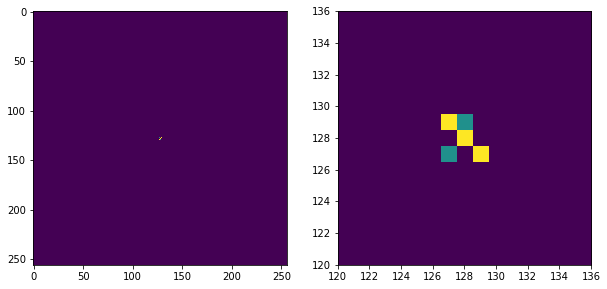

In [22]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

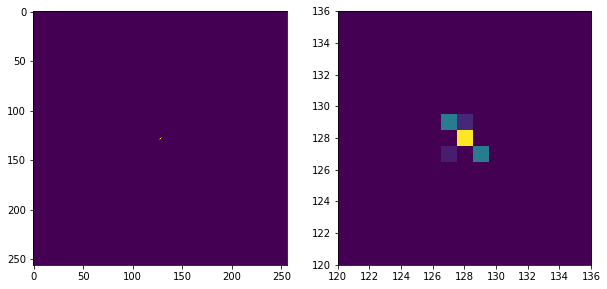

In [23]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [24]:
mainbuf = p.copy_mainbuf()

(664, 186, 11, 256, 8, 2)


' max/min/mean/rms/sum/S/N = 3.20e+01/0.00e+00/2.31e-01/4.98e-01/1.10e+04/64.3 peak at (0, 0)'

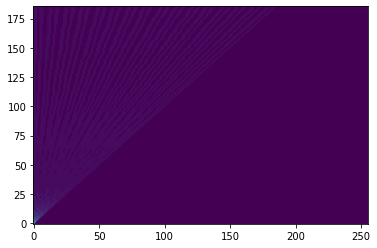

In [25]:
print(mainbuf.shape)
# look at the DM-time plan for UV 0
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
printstats(d)

(664, 8, 256)
(5312, 256)


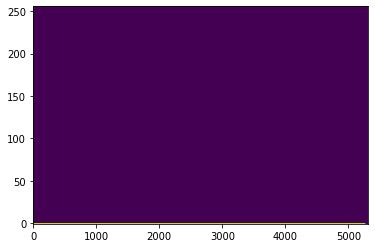

In [26]:
# look at DM=0 for all UVs
d = mainbuf[:,0,0,:,:,0].transpose([0,2,1])
print(d.shape)
d = d.reshape(d.shape[0]*d.shape[1], d.shape[2])
print(d.shape)

imshow(d.T, aspect='auto', origin='lower')

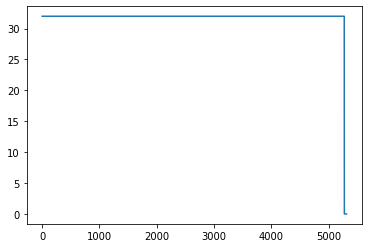

In [27]:
plot(d[:, 0])
 # Oh yeah, OK, this makes sense. It's 32 for all baselines because I made every UV = 1. IN practice, it won't be that neat.

# And what if I grid everything properly?

In [28]:
print(plan.baseline_shape) # nbl, nc, nt
values.input_scale = 1./16. # need this otherwise somewhere candidates overflow.

(190, 256, 256)


In [29]:
din = np.zeros(plan.baseline_shape, dtype=np.complex64)
din[:, :, 0] = 1 # making this 32 overflows the FDMT


In [30]:
import craft.craco
fast_baseline2uv = craft.craco.FastBaseline2Uv(plan, conjugate_lower_uvs=True)
uv_shape     = (plan.nuvrest, plan.nt, plan.ncin, plan.nuvwide)
uv_out  = np.zeros(uv_shape, dtype=np.complex64)
fast_baseline2uv(din, uv_out)

In [31]:
print(uv_out.shape)

(659, 256, 32, 8)


In [32]:
p.inbuf.nparr[:,:,:,:,0] = np.round(uv_out[:,:,:,:].real*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.nparr[:,:,:,:,1] = np.round(uv_out[:,:,:,:].imag*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
print(p.inbuf.nparr.mean())

0.001126232928679818


In [33]:
p.inbuf.copy_to_device()

In [34]:
p.run(0, values).wait()

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


In [35]:
mainbuf = p.copy_mainbuf()

(664, 186, 11, 256, 8, 2)


' max/min/mean/rms/sum/S/N = 6.40e+01/0.00e+00/4.62e-01/9.96e-01/2.20e+04/64.3 peak at (0, 0)'

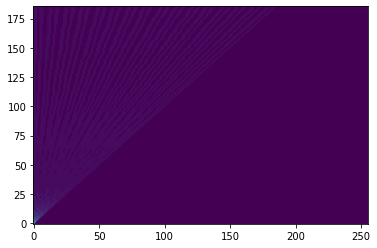

In [36]:
print(mainbuf.shape)
# look at the DM-time plan for UV 0
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
printstats(d)

(664, 8, 256)
(5312, 256)


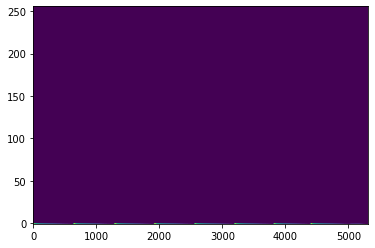

In [37]:
# look at DM=0 for all UVs
d = mainbuf[:,0,0,:,:,0].transpose([0,2,1])
print(d.shape)
d = d.reshape(d.shape[0]*d.shape[1], d.shape[2])
print(d.shape)

imshow(d.T, aspect='auto', origin='lower')

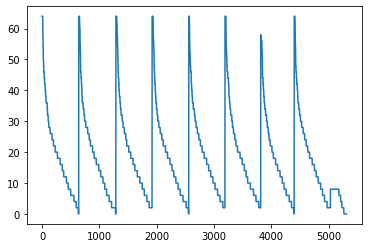

In [38]:
plot(d[:, 0])
# OK so this crazy shape is because of how we're inefficiently packing channels into UV points

In [39]:
cands = p.get_candidates()
print(len(cands))

2560


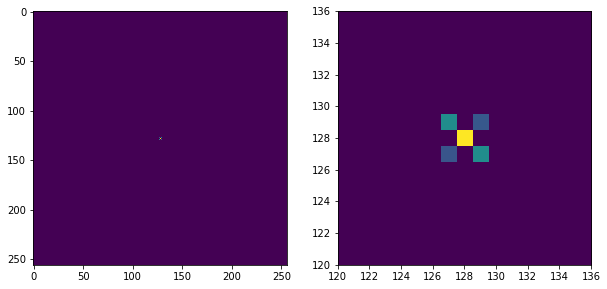

In [40]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [41]:
print_candidates(cands, 256, 0)

# SNR	upix	vpix	boxc_width	time	dm	iblk

47.4	128	128	0		0	0	0
13.0	129	129	1		1	0	0
23.3	127	129	0		0	0	0
23.3	129	127	0		0	0	0
12.5	127	127	0		0	0	0
47.4	128	128	0		0	1	0
13.0	129	129	1		1	1	0
23.3	127	129	0		0	1	0
23.3	129	127	0		0	1	0
12.5	127	127	0		0	1	0
47.4	128	128	0		0	2	0
13.0	129	129	1		1	2	0
23.3	127	129	0		0	2	0
23.3	129	127	0		0	2	0
12.5	127	127	0		0	2	0
47.4	128	128	0		0	3	0
13.0	129	129	1		1	3	0
23.3	127	129	0		0	3	0
23.3	129	127	0		0	3	0
12.5	127	127	0		0	3	0
47.4	128	128	0		0	4	0
13.0	129	129	1		1	4	0
23.3	127	129	0		0	4	0
23.3	129	127	0		0	4	0
12.5	127	127	0		0	4	0
47.4	128	128	0		0	5	0
13.0	129	129	1		1	5	0
23.3	127	129	0		0	5	0
23.3	129	127	0		0	5	0
12.5	127	127	0		0	5	0
47.4	128	128	0		0	6	0
13.0	129	129	1		1	6	0
23.3	127	129	0		0	6	0
23.3	129	127	0		0	6	0
12.5	127	127	0		0	6	0
47.4	128	128	0		0	7	0
13.0	129	129	1		1	7	0
23.3	127	129	0		0	7	0
23.3	129	127	0		0	7	0
12.5	127	127	0		0	7	0
47.4	128	128	0		0	8	0
13.0	129	129	1		1	8	0
23.3	127	129	0		0	8	0
23.3	129	127	

23.3	129	127	0		0	389	0
12.5	127	127	0		0	389	0
47.4	128	128	0		0	390	0
13.0	129	129	1		1	390	0
23.3	127	129	0		0	390	0
23.3	129	127	0		0	390	0
12.5	127	127	0		0	390	0
47.4	128	128	0		0	391	0
13.0	129	129	1		1	391	0
23.3	127	129	0		0	391	0
23.3	129	127	0		0	391	0
12.5	127	127	0		0	391	0
47.4	128	128	0		0	392	0
13.0	129	129	1		1	392	0
23.3	127	129	0		0	392	0
23.3	129	127	0		0	392	0
12.5	127	127	0		0	392	0
47.4	128	128	0		0	393	0
13.0	129	129	1		1	393	0
23.3	127	129	0		0	393	0
23.3	129	127	0		0	393	0
12.5	127	127	0		0	393	0
47.4	128	128	0		0	394	0
13.0	129	129	1		1	394	0
23.3	127	129	0		0	394	0
23.3	129	127	0		0	394	0
12.5	127	127	0		0	394	0
47.4	128	128	0		0	395	0
13.0	129	129	1		1	395	0
23.3	127	129	0		0	395	0
23.3	129	127	0		0	395	0
12.5	127	127	0		0	395	0
47.4	128	128	0		0	396	0
13.0	129	129	1		1	396	0
23.3	127	129	0		0	396	0
23.3	129	127	0		0	396	0
12.5	127	127	0		0	396	0
47.4	128	128	0		0	397	0
13.0	129	129	1		1	397	0
23.3	127	129	0		0	397	0
23.3	129	127	0		0	397	0
12.5	127	127	0		

# How about a DM pulse?

In [42]:
from craft import simfrb

In [43]:
dm = 5
toff = 100
tsamp = 1.7
frb = simfrb.mkfrb_fdmt(plan.fmin/1e9, plan.foff/1e9, plan.nf, tsamp, dm, toffset=toff, ntimes=plan.nt)

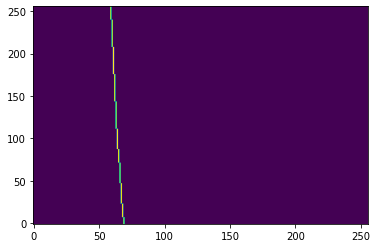

In [44]:
imshow(frb.T, aspect='auto', origin='lower')

In [45]:
din[:] = 0
print(din.shape, frb.shape)
din[:] = frb.T
fast_baseline2uv(din, uv_out)
assert din.sum() == uv_out.sum(), 'baseline2uv didnt conserve energy'

(190, 256, 256) (256, 256)


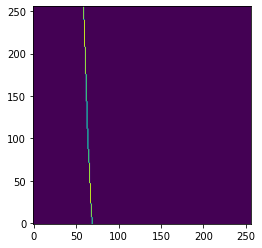

In [46]:
imshow(din[0,:,:].real, origin='lower')

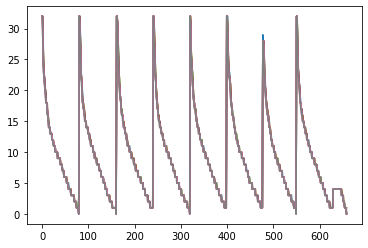

In [47]:
plot(uv_out.sum(axis=1).sum(axis=1).real)

(659, 256, 32, 8) (48640+0j) (48640+0j)


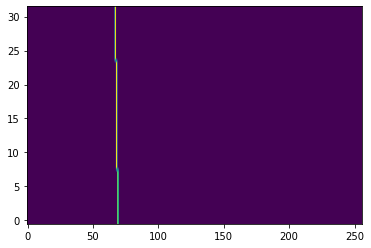

In [48]:
print(uv_out.shape, uv_out.sum(), din.sum())
imshow(uv_out[1,:,:,0].real.T, aspect='auto', origin='lower')

In [49]:
# This one seems to hang when together with the 3 cells below. Let's space it out.
p.clear_buffers(values)


INFO:root:Clearing mainbuf data NBLK=11
INFO:root:Mainbuf cleared. Clearing input
INFO:root:Input cleared. Running pipeline
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=1 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=2 nuv=5272 nparallel_uv=2636 nurest=65

In [50]:

p.inbuf.nparr[:,:,:,:,0] = np.round(uv_out[:,:,:,:].real*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.nparr[:,:,:,:,1] = np.round(uv_out[:,:,:,:].imag*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.copy_to_device()
values.run_fdmt = True
values.run_image = True
values.threshold = 10


In [51]:
p.run(0, values).wait()

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


In [52]:
print_candidates(cands, 256, 0)

# SNR	upix	vpix	boxc_width	time	dm	iblk

0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0	

0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0		0	0	0
0.0	128	128	0

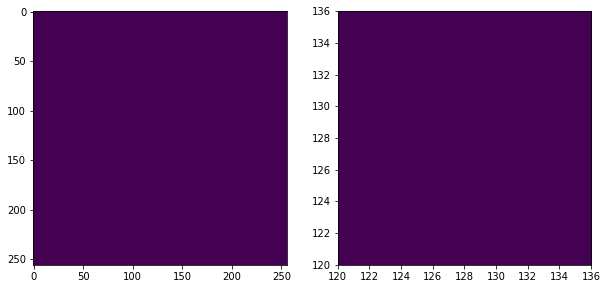

In [53]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

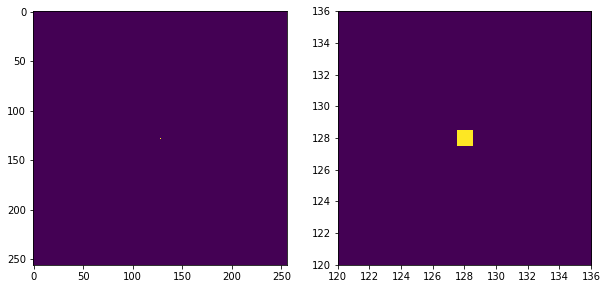

In [54]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [ ]:
mainbuf = p.copy_mainbuf()

In [ ]:
print(mainbuf.shape)
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
printstats(d)